In [1]:
1.77210981e+00 + 4.28683784e-02
#3
#[1.81497819e+00 3.62212395e-01 2.68804207e-05 ... 3.67416597e-05
# 3.01515762e-04 3.47999007e-03]

1.8149781883999998

0    21.36
1    21.85
2    22.34
3    22.84
4    23.33
5    23.82
Name: log_l, dtype: float64
0   -2.51
1   -2.53
2   -2.60
3   -2.89
4   -3.73
5   -5.08
Name: log_phi_sfg, dtype: float64


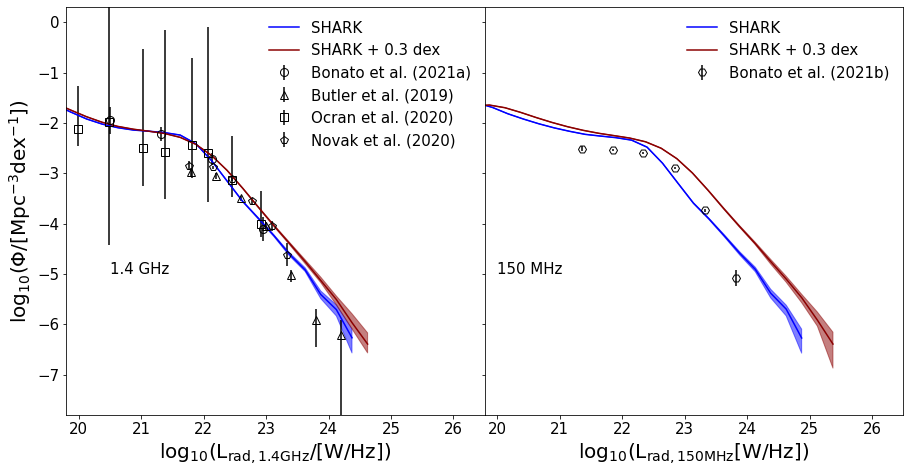

In [9]:
import functools
import numpy as np
from pylab import scatter
import pylab
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

import common
import utilities_statistics as us
import pandas as pd
import matplotlib as mpl
from collections import OrderedDict
from matplotlib.pyplot import cm
import time

import statistics as stat

df_150 = pd.read_csv('Complete_csv/150MHz_rad_lum_func_0_data.csv')
df_1d4 = pd.read_csv('Complete_csv/1d4GHz_rad_lum_func_0_data.csv')


###Getting the 1.4GHz data###
df2 = pd.read_csv("bonata_data_z0.csv")
    
bonatoy = df2.loc[(df2['ref'] == 'Bonato2020'),'log_phi']
bonatox = df2.loc[(df2['ref'] == 'Bonato2020'),'log_L_1.4']
bonatoerr_up = df2.loc[(df2['ref'] == 'Bonato2020'),'err_sup_phi']
bonatoerr_down = df2.loc[(df2['ref'] == 'Bonato2020'),'err_inf_phi']
    
butlery = df2.loc[(df2['ref'] == 'Butler2019'),'log_phi']
butlerx = df2.loc[(df2['ref'] == 'Butler2019'),'log_L_1.4']
butlererr_up = df2.loc[(df2['ref'] == 'Butler2019'),'err_sup_phi']
butlererr_down = df2.loc[(df2['ref'] == 'Butler2019'),'err_inf_phi']

ocrany = df2.loc[(df2['ref'] == 'Ocran2020'),'log_phi']
ocranx = df2.loc[(df2['ref'] == 'Ocran2020'),'log_L_1.4']
ocranerr_up = df2.loc[(df2['ref'] == 'Ocran2020'),'err_sup_phi']
ocranerr_down = df2.loc[(df2['ref'] == 'Ocran2020'),'err_inf_phi']
    
novaky = df2.loc[(df2['ref'] == 'Novak2017'),'log_phi']
novakx = df2.loc[(df2['ref'] == 'Novak2017'),'log_L_1.4']
novakerr_up = df2.loc[(df2['ref'] == 'Novak2017'),'err_sup_phi']
novakerr_down = df2.loc[(df2['ref'] == 'Novak2017'),'err_inf_phi']


xmf_lst = df_1d4.loc[((df_1d4['upp_noerr'] > 0)&(df_1d4['low_noerr'] > 0)),'xmf']
upp_lst = df_1d4.loc[((df_1d4['upp_noerr'] > 0)&(df_1d4['low_noerr'] > 0)),'upp_noerr']
low_lst = df_1d4.loc[((df_1d4['upp_noerr'] > 0)&(df_1d4['low_noerr'] > 0)),'low_noerr']
med_lst = df_1d4.loc[((df_1d4['upp_noerr'] > 0)&(df_1d4['low_noerr'] > 0)),'med_noerr']

upp_err = df_1d4['upp_err']
low_err = df_1d4['low_err']
med_err = df_1d4['med_err']

xmf_err = df_1d4.loc[((df_1d4['upp_err'] > 0)&(df_1d4['low_err'] > 0)),'xmf']
upp_err = df_1d4.loc[((df_1d4['upp_err'] > 0)&(df_1d4['low_err'] > 0)),'upp_err']
low_err = df_1d4.loc[((df_1d4['upp_err'] > 0)&(df_1d4['low_err'] > 0)),'low_err']
med_err = df_1d4.loc[((df_1d4['upp_err'] > 0)&(df_1d4['low_err'] > 0)),'med_err']

###Making the plots###
fig, ax = plt.subplots(1,2)

###1.4GHz###
ax[0].plot(xmf_lst,np.log10(med_lst),'blue',label = 'SHARK')
ax[0].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
ax[0].plot(xmf_err,np.log10(med_err),'darkred',label = 'SHARK + 0.3 dex')
ax[0].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)
    

ax[0].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="o",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Bonato et al. (2021a)',markersize='8')
ax[0].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Butler et al. (2019)',markersize='8')
ax[0].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Ocran et al. (2020)',markersize='8')
ax[0].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="p",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Novak et al. (2020)',markersize='8')
ax[0].set_xlabel("$\\rm log_{10}(L_{rad,1.4GHz}/[W/Hz])$",size=20)
ax[0].set_ylabel("$\\rm log_{10}(Φ/[Mpc^{-3}dex^{-1}])$",size=20)
ax[0].set_xlim(19.8,26.5)
ax[0].set_ylim(-7.8,0.3)



ax[0].text(20.5,-5,'1.4 GHz',fontsize = 15)
leg = ax[0].legend(frameon=False)
leg.get_frame().set_linewidth(0.0)

# ###Getting the 150MHz data###

LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")

LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] == '0.05 - 0.2')]



log_l = LOFAR_radlum_plt['log_l']
log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']




print(log_l)
print(log_phi_sfg)

log_phi_sfg = log_phi_sfg.astype(float)

tau = 0.99

xmf_lst = df_150.loc[((df_150['upp_noerr'] > 0)&(df_150['low_noerr'] > 0)),'xmf']*tau
upp_lst = df_150.loc[((df_150['upp_noerr'] > 0)&(df_150['low_noerr'] > 0)),'upp_noerr']*tau
low_lst = df_150.loc[((df_150['upp_noerr'] > 0)&(df_150['low_noerr'] > 0)),'low_noerr']*tau
med_lst = df_150.loc[((df_150['upp_noerr'] > 0)&(df_150['low_noerr'] > 0)),'med_noerr']*tau

xmf_err = df_150.loc[((df_150['upp_err'] > 0)&(df_150['low_err'] > 0)),'xmf']
upp_err = df_150.loc[((df_150['upp_err'] > 0)&(df_150['low_err'] > 0)),'upp_err']
low_err = df_150.loc[((df_150['upp_err'] > 0)&(df_150['low_err'] > 0)),'low_err']
med_err = df_150.loc[((df_150['upp_err'] > 0)&(df_150['low_err'] > 0)),'med_err']

ocranx = np.log10((10**(ocranx)*(150/1400)**(-0.01)))
butlerx = np.log10((10**(butlerx)*(150/1400)**(-0.01))) 
novakx = np.log10((10**(novakx)*(150/1400)**(-0.73)))
#plt.savefig("plots/rad_lum_func_z0.pdf",format='pdf')
df_tau = pd.read_csv('Complete_csv/150MHz_rad_lum_func_0_data_tau.csv')

xmf_tau = df_tau.loc[((df_tau['upp_noerr'] > 0)&(df_tau['low_noerr'] > 0)),'xmf']
upp_tau = df_tau.loc[((df_tau['upp_noerr'] > 0)&(df_tau['low_noerr'] > 0)),'upp_noerr'] 
low_tau = df_tau.loc[((df_tau['upp_noerr'] > 0)&(df_tau['low_noerr'] > 0)),'low_noerr']
med_tau = df_tau.loc[((df_tau['upp_noerr'] > 0)&(df_tau['low_noerr'] > 0)),'med_noerr']

xmf_terr = df_tau.loc[((df_tau['upp_err'] > 0)&(df_tau['low_err'] > 0)),'xmf']#
upp_terr = df_tau.loc[((df_tau['upp_err'] > 0)&(df_tau['low_err'] > 0)),'upp_err'] 
low_terr = df_tau.loc[((df_tau['upp_err'] > 0)&(df_tau['low_err'] > 0)),'low_err']
med_terr = df_tau.loc[((df_tau['upp_err'] > 0)&(df_tau['low_err'] > 0)),'med_err']


ax[1].plot(xmf_lst,np.log10(med_lst),'blue',label = 'SHARK')
ax[1].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
ax[1].plot(xmf_err,np.log10(med_err),'darkred',label = 'SHARK + 0.3 dex')
ax[1].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)


ax[1].errorbar(log_l,log_phi_sfg,yerr = log_phi_sfg_err,fmt="H",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Bonato et al. (2021b)',markersize='8')    
# #ax[1].scatter(ocranx,ocrany)

ax[1].set_xlabel("$\\rm log_{10}(L_{rad,150MHz}[W/Hz])$",size=20)
ax[1].set_xlim(19.8,26.5)
ax[1].set_ylim(-7.8,0.3)
ax[1].tick_params(labelleft=False) 
ax[1].text(20,-5,'150 MHz',fontsize = 15)
leg = ax[1].legend(frameon=False)
leg.get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(15,7.5)
plt.savefig("plots/final/rad_lum_func_z0_1d4_only.pdf")


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


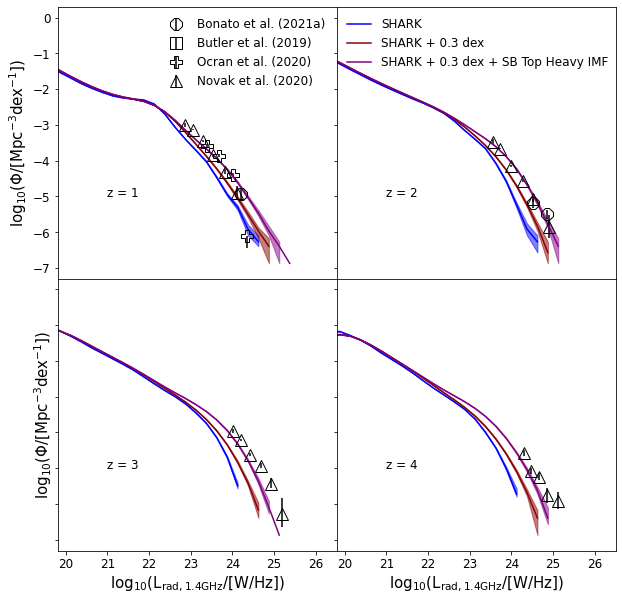

In [30]:
df_1d4 = pd.read_csv('Complete_csv/1d4GHz_rad_lum_func_z_data.csv')
df_1d4_imf = pd.read_csv('1d4GHz_rad_lum_func_z_data_alpha_ccsn.csv')
zlist = [0.909822023685613, 2.00391410007239, 3.0191633709527,3.95972701662501]
plt.rcParams.update({'font.size': 12})
q = 0
   
fig, ax = plt.subplots(2,2)
for z in zlist:
        
    g = q//2
    h = q%2

    bon_data = 'bonata_data_z' + str(round(z)) + '.csv'
    df2 = pd.read_csv(bon_data)
    try:
        bonatoy = df2.loc[(df2['ref'] == 'Bonato2020'),'log_phi']
        bonatox = df2.loc[(df2['ref'] == 'Bonato2020'),'log_L_1.4']
        bonatoerr_up = df2.loc[(df2['ref'] == 'Bonato2020'),'err_sup_phi']
        bonatoerr_down = df2.loc[(df2['ref'] == 'Bonato2020'),'err_inf_phi']
    except:
        bonatoy = np.NaN
        bonatox = np.NaN
        bonatoerr_up = np.NaN
        bonatoerr_down = np.NaN
        
    try:
        butlery = df2.loc[(df2['ref'] == 'Butler2019'),'log_phi']
        butlerx = df2.loc[(df2['ref'] == 'Butler2019'),'log_L_1.4']
        butlererr_up = df2.loc[(df2['ref'] == 'Butler2019'),'err_sup_phi']
        butlererr_down = df2.loc[(df2['ref'] == 'Butler2019'),'err_inf_phi']
    except:
        butlery = np.NaN
        butlerx = np.NaN
        butlererr_up = np.NaN
        butlererr_down = np.NaN
        
    try:
        ocrany = df2.loc[(df2['ref'] == 'Ocran2020'),'log_phi']
        ocranx = df2.loc[(df2['ref'] == 'Ocran2020'),'log_L_1.4']
        ocranerr_up = df2.loc[(df2['ref'] == 'Ocran2020'),'err_sup_phi']
        ocranerr_down = df2.loc[(df2['ref'] == 'Ocran2020'),'err_inf_phi']
    except:
        ocrany = np.NaN
        ocranx = np.NaN
        ocranerr_up = np.NaN
        ocranerr_down = np.NaN
        
    try:
        novaky = df2.loc[(df2['ref'] == 'Novak2017'),'log_phi']
        novakx = df2.loc[(df2['ref'] == 'Novak2017'),'log_L_1.4']
        novakerr_up = df2.loc[(df2['ref'] == 'Novak2017'),'err_sup_phi']
        novakerr_down = df2.loc[(df2['ref'] == 'Novak2017'),'err_inf_phi']
    except:
        novaky = np.NaN
        novakx = np.NaN
        novakerr_up = np.NaN
        novakerr_down = np.NaN
    
    upp_lab = 'upp_noerr_' + str(round(z))
    low_lab = 'low_noerr_' + str(round(z))
    med_lab = 'med_noerr_' + str(round(z))
    
    df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]
    
    
    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]
        
    upp_err = 'upp_err_' + str(round(z))
    low_err = 'low_err_' + str(round(z))
    med_err = 'med_err_' + str(round(z))

    df_err = df_1d4[['xmf',upp_err,low_err,med_err]] [(df_1d4[upp_err] > 0)&(df_1d4[low_err] > 0) ]
    
    xmf_err = df_err['xmf']
    upp_err = df_err[upp_err]
    low_err = df_err[low_err]
    med_err = df_err[med_err]
    

    
    
    
    if q == 1:
        ax[g,h].plot(xmf_lst,np.log10(med_lst),'blue',label = 'SHARK')
        ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
        ax[g,h].plot(xmf_err,np.log10(med_err),'darkred',label = 'SHARK + 0.3 dex')
        ax[g,h].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)
    else:
        ax[g,h].plot(xmf_lst,np.log10(med_lst),'blue')
        ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
        ax[g,h].plot(xmf_err,np.log10(med_err),'darkred')
        ax[g,h].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)        
        
    if q ==0:
        ax[g,h].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Bonato et al. (2021a)',markersize=12)
        ax[g,h].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Butler et al. (2019)',markersize=12)
        ax[g,h].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Ocran et al. (2020)',markersize=12)
        ax[g,h].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Novak et al. (2020)',markersize=12)
    else:
        ax[g,h].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[g,h].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[g,h].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[g,h].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
      
    z_label = 'z = '+ str(round(z))
        
    ax[g,h].set_xlabel("$\\rm log_{10}(L_{rad,1.4GHz}/[W/Hz])$",size=15)
    ax[g,0].set_ylabel("$\\rm log_{10}(Φ/[Mpc^{-3} dex^{-1}])$",size=15)
 #   ax[1,h].tick_params(bottom = True, top = True)
 #   ax[0,h].tick_params(labelbottom=False) 
    if q>0:
        ax[g,h].tick_params(labelleft=False)
    ax[g,h].text(21,-5,z_label,fontsize = 12) 

    ax[g,h].set_xlim(19.8,26.5)
    ax[g,h].set_ylim(-7.3,0.3)
   # leg = ax[0].legend(frameon=False,loc='upper right')
   # leg.get_frame().set_linewidth(0.0)
    q += 1

leg = ax[0,0].legend(frameon=False,loc='upper right',fontsize = 12)    
    
ccsn_lst = np.array([0.021537, 0.011148])
idx_lst = np.array([0.5, 1.3])


q = 0
from matplotlib import cm   
import matplotlib
LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
import matplotlib.pylab as pl


q = 0
LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
alpha_ccsn = ccsn_lst[0]
for z in zlist:
  #  LOFAR_z = LOFAR_zlst[q]        
    g = q//2
    h = q%2

    #LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] == LOFAR_z)]
   # LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
    #log_l = LOFAR_radlum_plt['log_l']
    #log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
    #log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']

    
    ind = np.where(ccsn_lst == alpha_ccsn)
    idx = idx_lst[ind]

    upp_lab = 'upp_err'+str(alpha_ccsn)+'z='+str(z)
    low_lab = 'low_err'+str(alpha_ccsn)+'z='+str(z)
    med_lab = 'med_err'+str(alpha_ccsn)+'z='+str(z)
        
    upp_lab_noerr = 'upp_noerr' +str(alpha_ccsn)+'z='+str(z)
    low_lab_noerr = 'low_noerr' +str(alpha_ccsn)+'z='+str(z)
    med_lab_noerr = 'med_noerr' +str(alpha_ccsn)+'z='+str(z)
    
        
        
        
    df_temp = df_1d4_imf[['xmf',upp_lab,low_lab ,med_lab,upp_lab_noerr ,low_lab_noerr ,med_lab_noerr ]]



    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]

    lab = 'idx = -' + str(idx[0])
      #  ax[g,h].plot(xmf_lst,np.log10(med_lst),color = colour,label = lab)
    ax[g,h].plot(xmf_lst,np.log10(med_lst),color='purple',label = 'SHARK + 0.3 dex + SB Top Heavy IMF')
    ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),alpha = 0.5,color = 'purple')
   #     df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]

    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab_noerr]
        # low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab_noerr]   
        #ax[q].plot(xmf_lst,np.log10(med_lst),color='red')
        
    q += 1
leg = ax[0,1].legend(frameon=False,loc='upper left',fontsize = 12)
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(10,10)
plt.savefig("plots/final/rad_lum_func_1d4_z_1x4_shark_err_imf2.pdf")

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


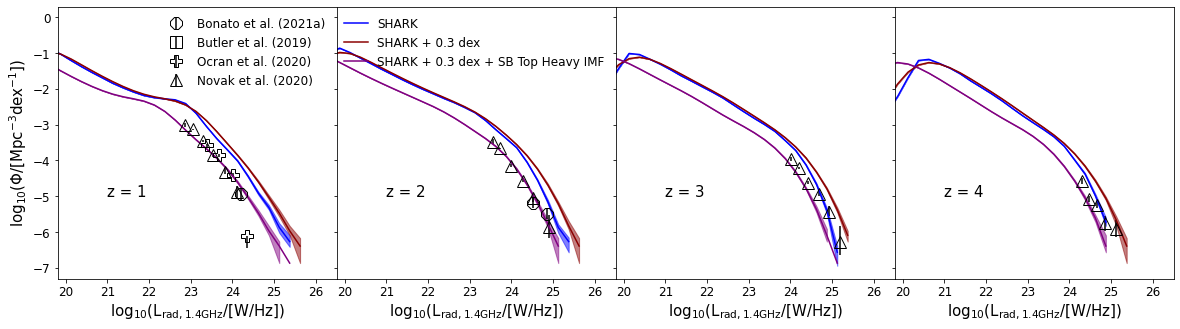

In [18]:
df_1d4 = pd.read_csv('Complete_csv/150MHz_rad_lum_func_z_data.csv')
df_tau = pd.read_csv('Complete_csv/150MHz_rad_lum_func_z_data_tau.csv')
df_ccsn = pd.read_csv('1d4GHz_rad_lum_func_z_data_alpha_ccsn_150.csv')
zlist = [0.909822023685613, 2.00391410007239, 3.0191633709527,3.95972701662501]

q = 0
#'blue','red','orange','magenta','teal','cyan','olive','yellow','grey','white']   
fig, ax = plt.subplots(1,4)
for z in zlist:
        
    g = q//2
    h = q%2

    bon_data = 'bonata_data_z' + str(round(z)) + '.csv'
    df2 = pd.read_csv(bon_data)
    try:
        bonatoy = df2.loc[(df2['ref'] == 'Bonato2020'),'log_phi']
        bonatox = df2.loc[(df2['ref'] == 'Bonato2020'),'log_L_1.4']
        bonatoerr_up = df2.loc[(df2['ref'] == 'Bonato2020'),'err_sup_phi']
        bonatoerr_down = df2.loc[(df2['ref'] == 'Bonato2020'),'err_inf_phi']
    except:
        bonatoy = np.NaN
        bonatox = np.NaN
        bonatoerr_up = np.NaN
        bonatoerr_down = np.NaN
        
    try:
        butlery = df2.loc[(df2['ref'] == 'Butler2019'),'log_phi']
        butlerx = df2.loc[(df2['ref'] == 'Butler2019'),'log_L_1.4']
        butlererr_up = df2.loc[(df2['ref'] == 'Butler2019'),'err_sup_phi']
        butlererr_down = df2.loc[(df2['ref'] == 'Butler2019'),'err_inf_phi']
    except:
        butlery = np.NaN
        butlerx = np.NaN
        butlererr_up = np.NaN
        butlererr_down = np.NaN
        
    try:
        ocrany = df2.loc[(df2['ref'] == 'Ocran2020'),'log_phi']
        ocranx = df2.loc[(df2['ref'] == 'Ocran2020'),'log_L_1.4']
        ocranerr_up = df2.loc[(df2['ref'] == 'Ocran2020'),'err_sup_phi']
        ocranerr_down = df2.loc[(df2['ref'] == 'Ocran2020'),'err_inf_phi']
    except:
        ocrany = np.NaN
        ocranx = np.NaN
        ocranerr_up = np.NaN
        ocranerr_down = np.NaN
        
    try:
        novaky = df2.loc[(df2['ref'] == 'Novak2017'),'log_phi']
        novakx = df2.loc[(df2['ref'] == 'Novak2017'),'log_L_1.4']
        novakerr_up = df2.loc[(df2['ref'] == 'Novak2017'),'err_sup_phi']
        novakerr_down = df2.loc[(df2['ref'] == 'Novak2017'),'err_inf_phi']
    except:
        novaky = np.NaN
        novakx = np.NaN
        novakerr_up = np.NaN
        novakerr_down = np.NaN
    
    upp_lab = 'upp_noerr_' + str(round(z))
    low_lab = 'low_noerr_' + str(round(z))
    med_lab = 'med_noerr_' + str(round(z))
    
    df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]
    
    
    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]
        
    upp_err = 'upp_err_' + str(round(z))
    low_err = 'low_err_' + str(round(z))
    med_err = 'med_err_' + str(round(z))

    df_err = df_1d4[['xmf',upp_err,low_err,med_err]] [(df_1d4[upp_err] > 0)&(df_1d4[low_err] > 0) ]
    
    xmf_err = df_err['xmf']
    upp_err = df_err[upp_err]
    low_err = df_err[low_err]
    med_err = df_err[med_err]
    

    
    
    
    if q == 1:
        ax[q].plot(xmf_lst,np.log10(med_lst),'blue',label = 'SHARK')
        ax[q].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
        ax[q].plot(xmf_err,np.log10(med_err),'darkred',label = 'SHARK + 0.3 dex')
        ax[q].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)
    else:
        ax[q].plot(xmf_lst,np.log10(med_lst),'blue')
        ax[q].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
        ax[q].plot(xmf_err,np.log10(med_err),'darkred')
        ax[q].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)        
        
    if q ==0:
        ax[q].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Bonato et al. (2021a)',markersize=12)
        ax[q].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Butler et al. (2019)',markersize=12)
        ax[q].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Ocran et al. (2020)',markersize=12)
        ax[q].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Novak et al. (2020)',markersize=12)
    else:
        ax[q].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[q].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[q].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[q].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
      
    z_label = 'z = '+ str(round(z))
        
    ax[q].set_xlabel("$\\rm log_{10}(L_{rad,1.4GHz}/[W/Hz])$",size=15)
    ax[0].set_ylabel("$\\rm log_{10}(Φ/[Mpc^{-3} dex^{-1}])$",size=15)
 #   ax[1,h].tick_params(bottom = True, top = True)
 #   ax[0,h].tick_params(labelbottom=False) 
    if q>0:
        ax[q].tick_params(labelleft=False)
    ax[q].text(21,-5,z_label,fontsize = 15) 

    ax[q].set_xlim(19.8,26.5)
    ax[q].set_ylim(-7.3,0.3)
   # leg = ax[0].legend(frameon=False,loc='upper right')
   # leg.get_frame().set_linewidth(0.0)
    q += 1

leg = ax[0].legend(frameon=False,loc='upper right',fontsize =12)    
    
ccsn_lst = np.array([0.021537, 0.011148])
idx_lst = np.array([0.5, 1.3])


q = 0
from matplotlib import cm   
import matplotlib
LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
import matplotlib.pylab as pl


q = 0
LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
alpha_ccsn = ccsn_lst[0]
for z in zlist:
  #  LOFAR_z = LOFAR_zlst[q]        
    g = q//2
    h = q%2

    #LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] == LOFAR_z)]
   # LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
    #log_l = LOFAR_radlum_plt['log_l']
    #log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
    #log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']

    
    ind = np.where(ccsn_lst == alpha_ccsn)
    idx = idx_lst[ind]

    upp_lab = 'upp_err'+str(alpha_ccsn)+'z='+str(z)
    low_lab = 'low_err'+str(alpha_ccsn)+'z='+str(z)
    med_lab = 'med_err'+str(alpha_ccsn)+'z='+str(z)
        
    upp_lab_noerr = 'upp_noerr' +str(alpha_ccsn)+'z='+str(z)
    low_lab_noerr = 'low_noerr' +str(alpha_ccsn)+'z='+str(z)
    med_lab_noerr = 'med_noerr' +str(alpha_ccsn)+'z='+str(z)
    
        
        
        
    df_temp = df_1d4_imf[['xmf',upp_lab,low_lab ,med_lab,upp_lab_noerr ,low_lab_noerr ,med_lab_noerr ]]



    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]

    lab = 'idx = -' + str(idx[0])
      #  ax[g,h].plot(xmf_lst,np.log10(med_lst),color = colour,label = lab)
    ax[q].plot(xmf_lst,np.log10(med_lst),color='purple',label = 'SHARK + 0.3 dex + SB Top Heavy IMF')
    ax[q].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),alpha = 0.5,color = 'purple')
   #     df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]

    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab_noerr]
        # low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab_noerr]   
        #ax[q].plot(xmf_lst,np.log10(med_lst),color='red')
        
    q += 1
leg = ax[1].legend(frameon=False,loc='upper right',fontsize = 12)
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(20,5)

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encoun

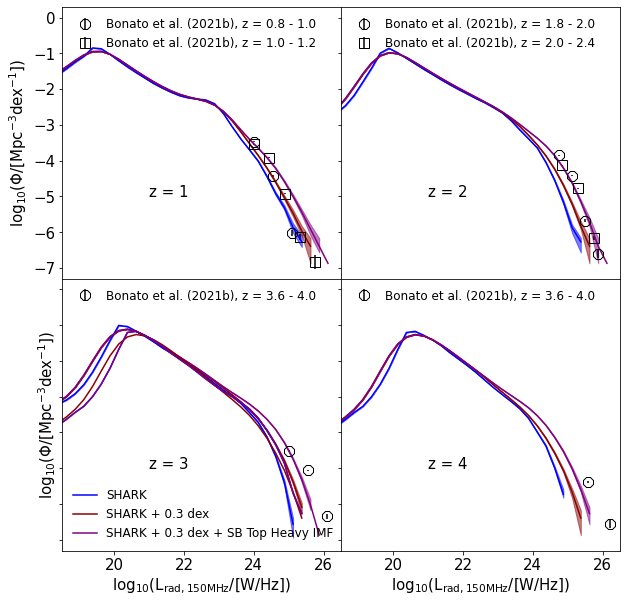

In [14]:
df_1d4 = pd.read_csv('Complete_csv/150MHz_rad_lum_func_z_data.csv')
df_tau = pd.read_csv('Complete_csv/150MHz_rad_lum_func_z_data_tau.csv')
df_1d4_imf = pd.read_csv('1d4GHz_rad_lum_func_z_data_alpha_ccsn_150.csv')
zlist = [0.909822023685613, 2.00391410007239, 3.0191633709527,3.95972701662501]

q = 0
   
fig, ax = plt.subplots(2,2)
LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")

LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
for z in zlist:
    LOFAR_z = LOFAR_zlst[q]        
    g = q//2
    h = q%2

    LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] == LOFAR_z)]
   # LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
    log_l = LOFAR_radlum_plt['log_l']
    log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
    log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']
    
    upp_lab = 'upp_noerr_' + str(round(z))
    low_lab = 'low_noerr_' + str(round(z))
    med_lab = 'med_noerr_' + str(round(z))
    
    df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]
    
    
    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]
        
    upp_err = 'upp_err_' + str(round(z))
    low_err = 'low_err_' + str(round(z))
    med_err = 'med_err_' + str(round(z))
    
    xmf_terr = df_tau.loc[((df_tau[upp_err] > 0)&(df_tau[low_err] > 0)),'xmf']
    upp_terr = df_tau.loc[((df_tau[upp_err] > 0)&(df_tau[low_err] > 0)),upp_err]
    low_terr = df_tau.loc[((df_tau[upp_err] > 0)&(df_tau[low_err] > 0)),low_err]
    med_terr = df_tau.loc[((df_tau[upp_err] > 0)&(df_tau[low_err] > 0)),med_err]
    
    df_err = df_1d4[['xmf',upp_err,low_err,med_err]] [(df_1d4[upp_err] > 0)&(df_1d4[low_err] > 0) ]
    
    xmf_err = df_err['xmf']
    upp_err = df_err[upp_err]
    low_err = df_err[low_err]
    med_err = df_err[med_err]



    xmf_tau = df_tau.loc[((df_tau[upp_lab] > 0)&(df_tau[low_lab] > 0)),'xmf']
    upp_tau = df_tau.loc[((df_tau[upp_lab] > 0)&(df_tau[low_lab] > 0)),upp_lab]
    low_tau = df_tau.loc[((df_tau[upp_lab] > 0)&(df_tau[low_lab] > 0)),low_lab]
    med_tau = df_tau.loc[((df_tau[upp_lab] > 0)&(df_tau[low_lab] > 0)),med_lab]

    
    
    
    ax[g,h].plot(xmf_lst,np.log10(med_lst),'blue')
    ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
    ax[g,h].plot(xmf_err,np.log10(med_err),'darkred')
    ax[g,h].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)
    
 #  ax[g,h].plot(xmf_tau,np.log10(med_tau),'darkgreen',label = 'SHARK - tau')
 #   ax[g,h].fill_between(xmf_tau,np.log10(low_tau),np.log10(upp_tau),color = 'darkgreen',alpha = 0.5)
 #   ax[g,h].plot(xmf_terr,np.log10(med_terr),'orange',label = 'SHARK + 0.3 dex + tau')
 #   ax[g,h].fill_between(xmf_terr,np.log10(low_terr),np.log10(upp_terr),color = 'orange',alpha = 0.5)
    
  #  leg = ax[1,1].legend(frameon=False,loc='upper right')
  #  leg.get_frame().set_linewidth(0.0)
    
    label = 'Bonato et al. (2021b), z = ' + str(LOFAR_z)

    err  = ax[g,h].errorbar(log_l, log_phi_sfg, yerr=log_phi_sfg_err,fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = label,markersize='10')
    if z == 2.00391410007239:
        
        LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] ==  '2.0 - 2.4')]
        LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
        log_l = LOFAR_radlum_plt['log_l']
        log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
        log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']
        
        label = 'Bonato et al. (2021b), z = 2.0 - 2.4'
        
        ax[g,h].errorbar(log_l, log_phi_sfg, yerr=log_phi_sfg_err,fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = label,markersize='10')

    if z == 0.909822023685613:
        
        LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] ==  '1.0 - 1.2')]
        LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
        log_l = LOFAR_radlum_plt['log_l']
        log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
        log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']
        
        label = 'Bonato et al. (2021b), z = 1.0 - 1.2'
        
        ax[g,h].errorbar(log_l, log_phi_sfg, yerr=log_phi_sfg_err,fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = label,markersize='10')        
        
        
    z_label = 'z = '+ str(round(z))


    if q>0:
        ax[g,h].tick_params(labelleft=False)
    ax[g,h].text(21,-5,z_label,fontsize = 15) 
   # ax[q].text(20,-5,z_label,fontsize = 15) 
    ax[g,h].set_xlim(18.5,26.5)
    ax[g,h].set_ylim(-7.3,0.3)
    leg = ax[g,h].legend(frameon=False,loc='upper left',fontsize = 12)
    leg.get_frame().set_linewidth(0.0)
    ax[g,h].set_xlabel("$\\rm log_{10}(L_{rad,150MHz}/[W/Hz])$",size=15)
    ax[g,0].set_ylabel("$\\rm log_{10}(Φ/[Mpc^{-3} dex^{-1}])$",size=15 )
    q += 1
    
    
ccsn_lst = np.array([0.021537, 0.011148])
idx_lst = np.array([0.5, 1.3])


q = 0
from matplotlib import cm   
import matplotlib
#fig, ax = plt.subplots(2,2)
LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
import matplotlib.pylab as pl

n = 20
colors = pl.cm.jet(np.linspace(0,1,8))
#colormap possible values = viridis, jet, spectral


LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
q = 0
LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
alpha_ccsn = ccsn_lst[0]
for z in zlist:
  #  LOFAR_z = LOFAR_zlst[q]        
    g = q//2
    h = q%2

    #LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] == LOFAR_z)]
   # LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
    #log_l = LOFAR_radlum_plt['log_l']
    #log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
    #log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']

    
    ind = np.where(ccsn_lst == alpha_ccsn)
    idx = idx_lst[ind]

    upp_lab = 'upp_err'+str(alpha_ccsn)+'z='+str(z)
    low_lab = 'low_err'+str(alpha_ccsn)+'z='+str(z)
    med_lab = 'med_err'+str(alpha_ccsn)+'z='+str(z)
        
    upp_lab_noerr = 'upp_noerr' +str(alpha_ccsn)+'z='+str(z)
    low_lab_noerr = 'low_noerr' +str(alpha_ccsn)+'z='+str(z)
    med_lab_noerr = 'med_noerr' +str(alpha_ccsn)+'z='+str(z)
    
        
        
        
    df_temp = df_1d4_imf[['xmf',upp_lab,low_lab ,med_lab,upp_lab_noerr ,low_lab_noerr ,med_lab_noerr ]]



    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]

    lab = 'idx = -' + str(idx[0])
      #  ax[g,h].plot(xmf_lst,np.log10(med_lst),color = colour,label = lab)
    ax[g,h].plot(xmf_lst,np.log10(med_lst),color='purple',label = 'SHARK + 0.3 dex + SB Top Heavy IMF')
    ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),alpha = 0.5,color = 'purple')
   #     df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]

    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab_noerr]
        # low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab_noerr]   
        #ax[q].plot(xmf_lst,np.log10(med_lst),color='red')
        
    q += 1
s1, = ax[1,0].plot(xmf_lst,np.log10(med_lst),'blue',label = 'SHARK')
#ax[1,1].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
s2, = ax[1,0].plot(xmf_err,np.log10(med_err),'darkred',label = 'SHARK + 0.3 dex')
s3, = ax[1,0].plot(xmf_lst,np.log10(med_lst),color='purple',label = 'SHARK + 0.3 dex + SB Top Heavy IMF')
legend1 = ax[1,0].legend(handles=[s1,s2,s3], loc='lower left',frameon=False,fontsize = 12)
ax[1,0].add_artist(legend1)

ax[1,0].legend(handles=[err], loc='upper left',frameon=False,fontsize = 12)

plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(10,10)

plt.savefig("plots/final/rad_lum_func_150MHz_1x4_ccsnsne.pdf")

35.281048138063696
35.219342894721244
35.339619493461186


<Figure size 432x288 with 0 Axes>

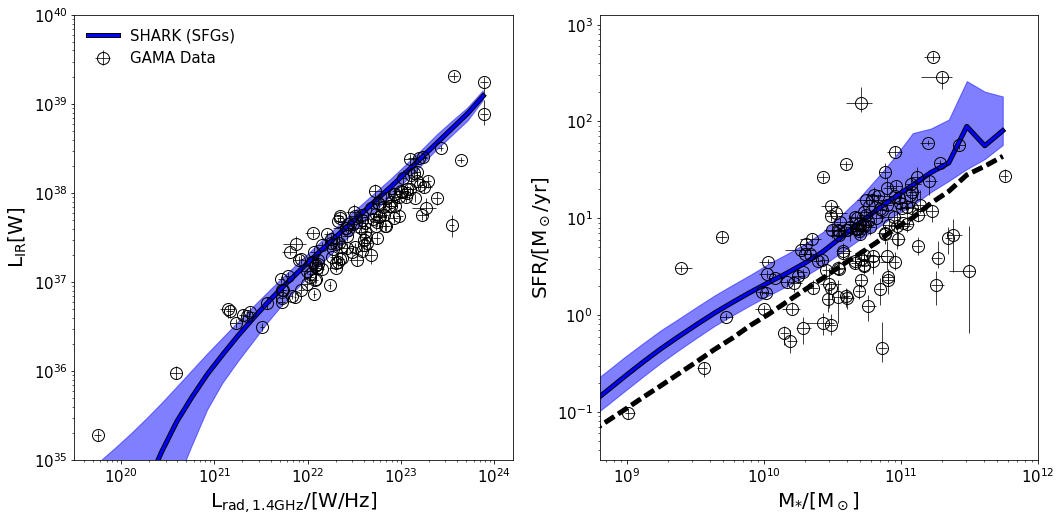

In [16]:
GAMA_df = pd.read_csv('Complete_csv/GAMA_data_SHARK_1.csv')
Lsun = 3.828 * 10**26 #W
gd = pd.read_csv('Documents/Masters/Masters_Thesis/GAMA_data.csv') #GAMA Data
gd['qir'] = (np.log10(gd['DustLum_50']*Lsun/3.75*10**12) - np.log10(gd['radioLum2']))*10**(-1)
plt.rcParams.update({'font.size': 15})


gd['qir_err'] = (1/np.log(10)) * ((gd['DustLum_84'] - gd['DustLum_16'])/gd['DustLum_50'] + gd['radioLum2_err']/gd['radioLum2']) * (gd['radioLum2']/((gd['DustLum_50']*Lsun)/3.75*10**12))
qir_gama = gd['qir']
qir_err = gd['qir_err']
m = gd['StellarMass_50']
sfr_gama = gd['SFR_50']
radlum = gd['radioLum2']
firlum = gd['DustLum_50']*Lsun
radlum_err = gd['radioLum2_err']
firlum_err = ((abs(firlum - gd['DustLum_16']*Lsun)),(abs(firlum - gd['DustLum_84']*Lsun)))
plt.clf()

m_err = (gd['StellarMass_50']-gd['StellarMass_16'],gd['StellarMass_84']-gd['StellarMass_50'])
sfr_err = (gd['SFR_50']-gd['SFR_16'],gd['SFR_84']-gd['SFR_50'])
    


mid_rad = GAMA_df['mid_rad']
med_fir = GAMA_df['med_fir']
low_fir = GAMA_df['low_fir']
upp_fir = GAMA_df['upp_fir']   
mid_mst = GAMA_df['mid_mst']
med_sfr = GAMA_df['med_sfr']
low_sfr = GAMA_df['low_sfr']   
upp_sfr = GAMA_df['upp_sfr']

low_sfr_a = GAMA_df['low_sfr_a']
low_mst_a = GAMA_df['mid_mst_a']
fig, ax = plt.subplots(1,2)
vmin = 4
vmax = 30


    
    
    #ax[0,0].hexbin(rad_bress,fir_bress,mincnt = 1, xscale='log',yscale='log',cmap='rainbow', gridsize = 30,vmin= vmin, vmax = vmax)


ax[0].errorbar(radlum,firlum, xerr = radlum_err,yerr = firlum_err,fmt="o",markerfacecolor='none', markeredgecolor='black',label = 'GAMA Data',ecolor='black',elinewidth = 0.75,markersize = 12)

ax[0].plot(mid_rad,med_fir,'blue',linewidth = 3,label = 'SHARK (SFGs)',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[0].fill_between(mid_rad,low_fir,upp_fir,color = 'blue',alpha = 0.5)
ax[0].set_xlabel('$\\rm L_{rad,1.4GHz}/[W/Hz]$',fontsize = 20)
ax[0].set_ylabel('$\\rm L_{IR} [W]$',fontsize = 20)
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].set_ylim(1e35,1e40)
ax[0].set_xlim(10**(19.5),10**(24.2))


    
    


ax[1].errorbar(m,sfr_gama, xerr =m_err,yerr = sfr_err,fmt="o",label = 'GAMA Data',markerfacecolor='none', markeredgecolor='black',ecolor = 'black',elinewidth = 0.75,markersize = 12)
  
ax[1].plot(mid_mst,med_sfr,'blue',linewidth = 3,label = 'SHARK (SFGs)',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].plot(low_mst_a,low_sfr_a,'black',linestyle = 'dashed',linewidth = 3,label = 'SHARK - SFG Minimum',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].fill_between(mid_mst,low_sfr,upp_sfr,color = 'blue',alpha = 0.5)
ax[1].set_xlabel("$\\rm M_{*}/[M_\odot]$",fontsize = 20)
ax[1].set_ylabel("$\\rm SFR/[M_\odot/yr]$",fontsize = 20)
ax[1].set_xscale('log')
ax[1].set_yscale('log')
ax[1].set_ylim(10**(-1.5),10**(3.1))
ax[1].set_xlim(10**(8.8),10**(12))
leg = ax[0].legend(frameon=False,loc='upper left')
leg.get_frame().set_linewidth(0.0)
fig.set_size_inches(15,7.5)
plt.tight_layout()
plt.savefig("plots/final/GAMA_plots.pdf")
print(np.log10(498972038.200255*Lsun))
print(np.log10(432883433.48628800*Lsun))
print(np.log10(571015062.4188560*Lsun))

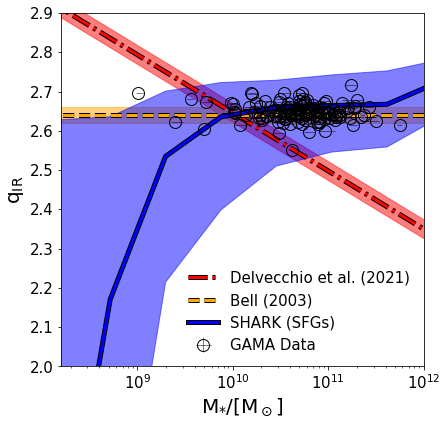

In [35]:

    
    
plt.rcParams.update({'font.size': 15})
#    delv_qir = 2.586 + (-0.124)*(np.log10(mst) - 10) #Eqn from Delvecchio et al. 2021 from fig. 14
import matplotlib.patheffects as pe
  
    
    
GAMA_df = pd.read_csv('Complete_csv/GAMA_data_all.csv')   


fig, ax = plt.subplots(1,1)

qir_err = gd['qir_err']


mid_mst = GAMA_df['mid_mst']
med_qir = GAMA_df['med_qir']
low_qir = GAMA_df['low_qir']
upp_qir = GAMA_df['upp_qir']

delv_mid = 2.586 + (-0.124)*(np.log10(mid_mst)-10)
delv_up = (2.586+0.011) + (-0.124)*(np.log10(mid_mst)-10)
delv_low = (2.586-0.011) + (-0.124)*(np.log10(mid_mst)-10)

delv_mid = (2.646) - (np.log10(mid_mst)-10)*(0.148)
delv_up = (2.646+0.024) - (np.log10(mid_mst)-10)*(0.148)
delv_low = (2.646-0.024) - (np.log10(mid_mst)-10)*(0.148)
bell = np.zeros(len(mid_mst))
bell_upp = np.zeros(len(mid_mst))
bell_low = np.zeros(len(mid_mst))
bell.fill(2.64)
bell_upp.fill(2.66)
bell_low.fill(2.62)



ax.plot(mid_mst,delv_mid,'red',label = 'Delvecchio et al. (2021)',linestyle = 'dashdot',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(mid_mst,delv_low,delv_up,color = 'red', alpha = 0.5)


ax.plot(mid_mst,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(mid_mst,bell_low,bell_upp,color = 'orange', alpha = 0.5)



ax.plot(mid_mst,med_qir,'blue',linewidth = 3,label = 'SHARK (SFGs)',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(mid_mst,low_qir,upp_qir,color = 'blue',alpha = 0.5)

ax.errorbar(m,qir_gama, xerr = m_err,yerr = qir_err,fmt="o",label = 'GAMA Data',markerfacecolor='None', markeredgecolor='black',ecolor = 'black',elinewidth = 0.5,markersize = 12)
ax.set_xscale('log')
ax.set_xlim(10**(8.2),10**(12))
ax.set_ylim(2,2.9)
ax.set_xlabel("$\\rm M_{*}/[M_\odot]$",fontsize = 20)
ax.set_ylabel("$\\rm q_{IR}$",fontsize = 20)
leg = ax.legend(frameon=False,loc='lower right')
leg.get_frame().set_linewidth(0.0)
fig.set_size_inches(6.5,6.5)
plt.savefig("plots/final/GAMA_qir.pdf")



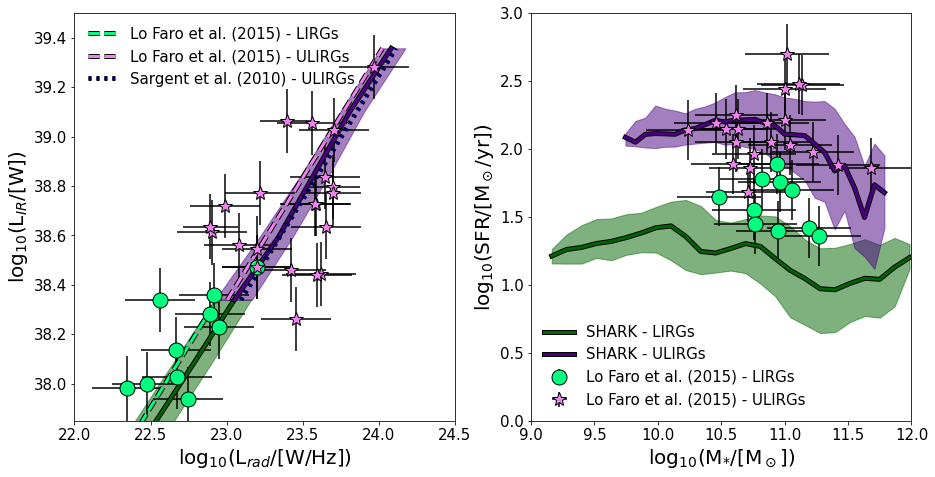

In [47]:
import functools
import numpy as np
from pylab import scatter
import pylab
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
import matplotlib.patheffects as pe
import common
import utilities_statistics as us
import pandas as pd
import matplotlib as mpl
from collections import OrderedDict
from matplotlib.pyplot import cm
import time

import statistics as stat

Lsun = 3.828 * 10**26 #W

lf_shark = pd.read_csv('Lightcone/lightcone_lo_faro_1.csv')

#print(lf_shark)
lf_shark.replace(0, np.nan, inplace=True)
df_lf = pd.read_csv('french_paper_2_pg16.2.csv')
    
df_lf['LIR/W'] = df_lf['L_IR'] * Lsun

#print(df_lf['LIR'])

df_lf['qir'] = np.log10((df_lf['LIR/W']/(3.75*10**12))/df_lf['L1.4'])
    
df_lf['L1.4_err'] = 0.13 + df_lf['qir_err'] #approximate error of L_1.4
    
    ### Reading in LIRG data from Lo Faro et al. ###
    
LIRG_lf = df_lf[['SFR_k','M_hyperz','LIR/W','L1.4','qir','L1.4_err','qir_err']] [(df_lf['z'] < 1.5) ]
    
sfr_L = LIRG_lf['SFR_k']
mst_L = LIRG_lf['M_hyperz']
lir_L = np.log10(LIRG_lf['LIR/W'])
rad_L = np.log10(LIRG_lf['L1.4'])
qir_L = LIRG_lf['qir']
Lrad_err_L = LIRG_lf['L1.4_err']
qir_err_L = LIRG_lf['qir_err']
    
    ###Reading in ULIRG from Lo Faro et al.###
    
ULIRG_lf = df_lf[['SFR_k','M_hyperz','LIR/W','L1.4','qir','L1.4_err','qir_err']] [(df_lf['z'] > 1.5) ]
    
sfr_U = ULIRG_lf['SFR_k']
mst_U = ULIRG_lf['M_hyperz']
lir_U = np.log10(ULIRG_lf['LIR/W'])
rad_U = np.log10(ULIRG_lf['L1.4'])
qir_U = ULIRG_lf['qir']
Lrad_err_U = ULIRG_lf['L1.4_err']
qir_err_U = ULIRG_lf['qir_err']


fig, ax = plt.subplots(1,2)
 
med_rad_L = lf_shark['med_rad_l']    
mid_fir_L = lf_shark['med_fir_l'] 
low_rad_L = lf_shark['low_rad_l']    
upp_rad_L = lf_shark['upp_rad_l'] 

med_rad_U = lf_shark['med_rad_u']    
mid_fir_U = lf_shark['med_fir_u'] 
low_rad_U = lf_shark['low_rad_u']    
upp_rad_U = lf_shark['upp_rad_u'] 

med_rad_a = lf_shark['med_rad_a']    
mid_fir_a = lf_shark['med_fir_a'] 
low_rad_a = lf_shark['low_rad_a']    
upp_rad_a = lf_shark['upp_rad_a']


lirg_df = lf_shark[['med_rad_a','med_fir_a','low_rad_a','upp_rad_a']] [(lf_shark['med_fir_a'] < np.log10(1e12*Lsun)) ]
ulirg_df = lf_shark[['med_rad_a','med_fir_a','low_rad_a','upp_rad_a']] [(lf_shark['med_fir_a'] > np.log10(1e12*Lsun)) ]


med_rad_L = np.array(lirg_df['med_rad_a'])   
mid_fir_L = np.array(lirg_df['med_fir_a']) 
low_rad_L = np.array(lirg_df['low_rad_a'])    
upp_rad_L = np.array(lirg_df['upp_rad_a']) 

med_rad_U = np.array(ulirg_df['med_rad_a'])    
mid_fir_U = np.array(ulirg_df['med_fir_a'])
low_rad_U = np.array(ulirg_df['low_rad_a'])   
upp_rad_U = np.array(ulirg_df['upp_rad_a']) 

med_rad_U = np.append(med_rad_L[-1],med_rad_U)
mid_fir_U = np.append(mid_fir_L[-1],mid_fir_U)
upp_rad_U = np.append(upp_rad_L[-1],upp_rad_U)
low_rad_U = np.append(low_rad_L[-1],low_rad_U)



lo_faro_lirg_rad_med = np.log10(10**(mid_fir_L)/(3.75*1e12)) - 2.83
lo_faro_lirg_rad_low = np.log10(10**(mid_fir_L)/(3.75*1e12)) - 2.93
lo_faro_lirg_rad_upp = np.log10(10**(mid_fir_L)/(3.75*1e12)) - 2.73

lo_faro_ulirg_rad_med = np.log10(10**(mid_fir_U)/(3.75*1e12)) - 2.76
lo_faro_ulirg_rad_upp = np.log10(10**(mid_fir_U)/(3.75*1e12)) - 2.86
lo_faro_ulirg_rad_low = np.log10(10**(mid_fir_U)/(3.75*1e12)) - 2.66

sargent_ulirg_rad_med = np.log10(10**(mid_fir_U)/(3.75*1e12)) - 2.672
sargent_ulirg_rad_upp = np.log10(10**(mid_fir_U)/(3.75*1e12)) - 2.793
sargent_ulirg_rad_low = np.log10(10**(mid_fir_U)/(3.75*1e12)) - 2.551

    
ax[0].plot(med_rad_L,mid_fir_L,'darkgreen',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[0].fill_betweenx(mid_fir_L,low_rad_L,upp_rad_L,color = 'darkgreen',alpha = 0.5)

ax[0].plot(med_rad_U,mid_fir_U,'indigo',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[0].fill_betweenx(mid_fir_U,low_rad_U,upp_rad_U,color = 'indigo',alpha = 0.5)

#ax[0].plot(med_rad_a,mid_fir_a,'blue',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_betweenx(mid_fir_a,low_rad_a,upp_rad_a,color = 'blue',alpha = 0.5)

ax[0].plot(lo_faro_lirg_rad_med,mid_fir_L,'springgreen',linewidth = 3,linestyle = 'dashed',label = 'Lo Faro et al. (2015) - LIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_betweenx(mid_fir_U,lo_faro_lirg_rad_low,lo_faro_lirg_rad_upp,color = 'springgreen',alpha = 0.25)

ax[0].plot(lo_faro_ulirg_rad_med,mid_fir_U,'violet',linewidth = 3,linestyle = 'dashed',label = 'Lo Faro et al. (2015) - ULIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_betweenx(mid_fir_U,lo_faro_ulirg_rad_low,lo_faro_ulirg_rad_upp,color = 'violet',alpha = 0.25)

ax[0].plot(sargent_ulirg_rad_med,mid_fir_U,'navy',linewidth = 3,linestyle = 'dotted',label = 'Sargent et al. (2010) - ULIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])    
#ax[0].fill_betweenx(mid_fir_U,sargent_ulirg_rad_low,sargent_ulirg_rad_upp,color = 'navy',alpha = 0.25)

ax[0].errorbar(rad_L,lir_L, xerr = Lrad_err_L,yerr = 0.13,fmt="o",markerfacecolor='springgreen', markeredgecolor='black',ecolor='black', markersize=15)
ax[0].errorbar(rad_U,lir_U, xerr = Lrad_err_U,yerr = 0.13,fmt="*",markerfacecolor='violet', markeredgecolor='black',ecolor='black', markersize=15)
ax[0].set_xlim(22,24.5)
ax[0].set_ylim(37.85,39.50)    
ax[0].set_xlabel('$\\rm log_{10}$(L$_{rad}$/[W/Hz])',fontsize = 20)
ax[0].set_ylabel('$\\rm log_{10}$(L$_{IR}$/[W])',fontsize = 20)
                                         



mid_mst_L = lf_shark['med_mst_L']
med_sfr_L = lf_shark['med_sfr_L']
low_sfr_L = lf_shark['low_sfr_L']
upp_sfr_L = lf_shark['upp_sfr_L']

mid_mst_U = lf_shark['med_mst_U']
med_sfr_U = lf_shark['med_sfr_U']
low_sfr_U = lf_shark['low_sfr_U']
upp_sfr_U = lf_shark['upp_sfr_U']


    
ax[1].plot(mid_mst_L,med_sfr_L,'darkgreen',label = 'SHARK - LIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].fill_between(mid_mst_L,low_sfr_L,upp_sfr_L,color = 'darkgreen',alpha = 0.5)

ax[1].plot(mid_mst_U,med_sfr_U,'indigo',label = 'SHARK - ULIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].fill_between(mid_mst_U,low_sfr_U,upp_sfr_U,color = 'indigo',alpha = 0.5)
ax[1].errorbar(mst_L,sfr_L, xerr = 0.33,yerr = 0.22,fmt="o",markerfacecolor='springgreen', markeredgecolor='black',ecolor='black', markersize=15,label = 'Lo Faro et al. (2015) - LIRGs',)
ax[1].errorbar(mst_U,sfr_U, xerr = 0.33,yerr = 0.22,fmt="*",markerfacecolor='violet', markeredgecolor='black',ecolor='black', markersize=15,label = 'Lo Faro et al. (2015) - ULIRGs',)
ax[1].set_xlabel("$\\rm log_{10}(M_{*}/[M_\odot]$)",fontsize = 20)
ax[1].set_ylabel("$\\rm log_{10}(SFR/[M_\odot/yr])$",fontsize = 20)
ax[1].set_xlim(9,12)
ax[1].set_ylim(0,3)
leg = ax[0].legend(frameon=False)
leg.get_frame().set_linewidth(0.0)

leg = ax[1].legend(frameon=False,loc='lower left')
leg.get_frame().set_linewidth(0.0)
fig.set_size_inches(15,7.5)
plt.savefig("plots/final/lo_faro_plts.pdf")

3.828e+26


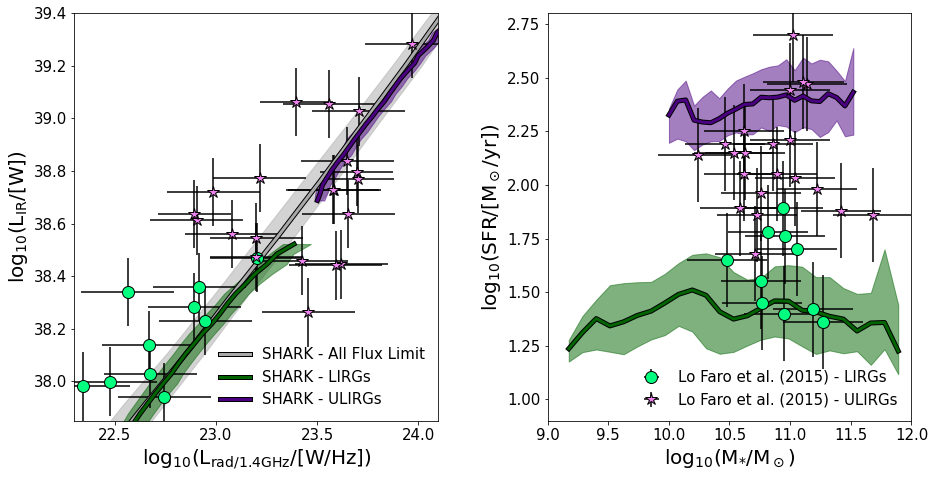

In [12]:
lf_shark = pd.read_csv('lightcone_lo_faro_30.csv')
lf_shark.replace(0, np.nan, inplace=True)
Lsun = 3.828 * 10**26 #W
df_lf = pd.read_csv('french_paper_2_pg16.2.csv')
print(Lsun)
df_lf['LIR/W'] = df_lf['L_IR'] * Lsun

#print(df_lf['LIR'])

df_lf['qir'] = np.log10((df_lf['LIR/W']/(3.75*10**12))/df_lf['L1.4'])
    
df_lf['L1.4_err'] = 0.13 + df_lf['qir_err'] #approximate error of L_1.4
    
    ### Reading in LIRG data from Lo Faro et al. ###
    
LIRG_lf = df_lf[['SFR_k','M_hyperz','LIR/W','L1.4','qir','L1.4_err','qir_err']] [(df_lf['z'] < 1.5) ]
    
sfr_L = LIRG_lf['SFR_k']
mst_L = LIRG_lf['M_hyperz']
lir_L = np.log10(LIRG_lf['LIR/W'])
rad_L = np.log10(LIRG_lf['L1.4'])
qir_L = LIRG_lf['qir']
Lrad_err_L = LIRG_lf['L1.4_err']
qir_err_L = LIRG_lf['qir_err']
    
    ###Reading in ULIRG from Lo Faro et al.###
    
ULIRG_lf = df_lf[['SFR_k','M_hyperz','LIR/W','L1.4','qir','L1.4_err','qir_err']] [(df_lf['z'] > 1.5) ]
    
sfr_U = ULIRG_lf['SFR_k']
mst_U = ULIRG_lf['M_hyperz']
lir_U = np.log10(ULIRG_lf['LIR/W'])
rad_U = np.log10(ULIRG_lf['L1.4'])
qir_U = ULIRG_lf['qir']
Lrad_err_U = ULIRG_lf['L1.4_err']
qir_err_U = ULIRG_lf['qir_err']


fig, ax = plt.subplots(1,2)
 
med_rad_L = lf_shark['med_rad_l']    
med_fir_L = lf_shark['med_fir_l'] 
low_rad_L = lf_shark['low_rad_l']    
upp_rad_L = lf_shark['upp_rad_l'] 

med_rad_U = lf_shark['med_rad_u']    
med_fir_U = lf_shark['med_fir_u'] 
low_rad_U = lf_shark['low_rad_u']    
upp_rad_U = lf_shark['upp_rad_u'] 

 
med_rad_a = lf_shark['med_rad_a']    
med_fir_a = lf_shark['med_fir_a'] 
low_rad_a = lf_shark['low_rad_a']    
upp_rad_a = lf_shark['upp_rad_a']
#df_temp = lf_shark[['xmf',upp_lab,low_lab ,med_lab,upp_lab_noerr ,low_lab_noerr ,med_lab_noerr ]]
df_temp = lf_shark[['med_rad_a','med_fir_a']]
df2.loc[(df2['ref'] == 'Bonato2020'),'log_phi']

lirg_cut = np.log10(10**(12)*Lsun)

med_rad_l = df_temp.loc[(df_temp['med_fir_a']<lirg_cut),'med_rad_a']
med_fir_l = df_temp.loc[(df_temp['med_fir_a']<lirg_cut),'med_fir_a']
med_rad_u = df_temp.loc[(df_temp['med_fir_a']>lirg_cut),'med_rad_a']
med_fir_u = df_temp.loc[(df_temp['med_fir_a']>lirg_cut),'med_fir_a']

#print(med_rad_l)
#print(med_fir_l)
lo_faro_lirg_rad_med = np.log10(10**(med_fir_L)/(3.75*1e12)) - 2.83
lo_faro_lirg_rad_low = np.log10(10**(med_fir_L)/(3.75*1e12)) - 2.93
lo_faro_lirg_rad_upp = np.log10(10**(med_fir_L)/(3.75*1e12)) - 2.73

lo_faro_ulirg_rad_med = np.log10(10**(med_fir_U)/(3.75*1e12)) - 2.76
lo_faro_ulirg_rad_upp = np.log10(10**(med_fir_U)/(3.75*1e12)) - 2.86
lo_faro_ulirg_rad_low = np.log10(10**(med_fir_U)/(3.75*1e12)) - 2.66

sargent_ulirg_rad_med = np.log10(10**(med_fir_U)/(3.75*1e12)) - 2.672
sargent_ulirg_rad_upp = np.log10(10**(med_fir_U)/(3.75*1e12)) - 2.793
sargent_ulirg_rad_low = np.log10(10**(med_fir_U)/(3.75*1e12)) - 2.551
#ax[0].plot(sargent_ulirg_rad_med,mid_fir_U,'violet',linewidth = 3,linestyle = 'dotted',label = 'Sargent et al. (2010) - ULIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])    
#ax[0].fill_betweenx(mid_fir_U,sargent_ulirg_rad_low,sargent_ulirg_rad_upp,color = 'violet',alpha = 0.25)
ax[0].plot(med_rad_a,med_fir_a,'darkgrey',label = 'SHARK - All Flux Limit',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])    
ax[0].fill_betweenx(med_fir_a,low_rad_a,upp_rad_a,color = 'darkgrey',alpha = 0.5)
ax[0].plot(med_rad_L,med_fir_L,'darkgreen',label = 'SHARK - LIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[0].fill_betweenx(med_fir_L,low_rad_L,upp_rad_L,color = 'darkgreen',alpha = 0.5)

ax[0].plot(med_rad_U,med_fir_U,'indigo',label = 'SHARK - ULIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[0].fill_betweenx(med_fir_U,low_rad_U,upp_rad_U,color = 'indigo',alpha = 0.5)

#ax[0].plot(med_rad_a,mid_fir_a,'red',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_betweenx(mid_fir_a,low_rad_a,upp_rad_a,color = 'blue',alpha = 0.5)


#ax[0].plot(lo_faro_lirg_rad_med,mid_fir_L,'springgreen',linewidth = 3,linestyle = 'dashed',label = 'Lo Faro et al. (2015) - LIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_betweenx(mid_fir_U,lo_faro_lirg_rad_low,lo_faro_lirg_rad_upp,color = 'springgreen',alpha = 0.25)

#ax[0].plot(lo_faro_ulirg_rad_med,mid_fir_U,'violet',linewidth = 3,linestyle = 'dashed',label = 'Lo Faro et al. (2015) - ULIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_betweenx(mid_fir_U,lo_faro_ulirg_rad_low,lo_faro_ulirg_rad_upp,color = 'violet',alpha = 0.25)

#ax[0].plot(sargent_ulirg_rad_med,mid_fir_U,'violet',linewidth = 3,linestyle = 'dotted',label = 'Sargent et al. (2010) - ULIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])    
#ax[0].fill_betweenx(mid_fir_U,sargent_ulirg_rad_low,sargent_ulirg_rad_upp,color = 'violet',alpha = 0.25)

ax[0].errorbar(rad_L,lir_L, xerr = Lrad_err_L,yerr = 0.13,fmt="o",markerfacecolor='springgreen', markeredgecolor='black',ecolor='black', markersize=12)
ax[0].errorbar(rad_U,lir_U, xerr = Lrad_err_U,yerr = 0.13,fmt="*",markerfacecolor='violet', markeredgecolor='black',ecolor='black', markersize=12)
#ax[0].set_xlim(22.3,24.1)
#ax[0].set_ylim(37.85,39.6)    
ax[0].set_xlabel('$\\rm log_{10}(L_{rad/1.4GHz}/[W/Hz])$',fontsize = 20)
ax[0].set_ylabel('$\\rm log_{10}(L_{IR}/[W])$',fontsize = 20)
ax[0].set_xticks(np.arange(22, 24.1, 0.5))                                         

lf_shark = pd.read_csv('lightcone_lo_faro_30.csv')

mid_mst_L = lf_shark['med_mst_L']
med_sfr_L = lf_shark['med_sfr_L']
low_sfr_L = lf_shark['low_sfr_L']
upp_sfr_L = lf_shark['upp_sfr_L']

mid_mst_U = lf_shark['med_mst_U']
med_sfr_U = lf_shark['med_sfr_U']
low_sfr_U = lf_shark['low_sfr_U']
upp_sfr_U = lf_shark['upp_sfr_U']


    
ax[1].plot(mid_mst_L,med_sfr_L,'darkgreen',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].fill_between(mid_mst_L,low_sfr_L,upp_sfr_L,color = 'darkgreen',alpha = 0.5)

ax[1].plot(mid_mst_U,med_sfr_U,'indigo',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].fill_between(mid_mst_U,low_sfr_U,upp_sfr_U,color = 'indigo',alpha = 0.5)
ax[1].errorbar(mst_L,sfr_L, xerr = 0.33,yerr = 0.22,fmt="o",markerfacecolor='springgreen', markeredgecolor='black',ecolor='black', markersize=12,label = 'Lo Faro et al. (2015) - LIRGs',)
ax[1].errorbar(mst_U,sfr_U, xerr = 0.33,yerr = 0.22,fmt="*",markerfacecolor='violet', markeredgecolor='black',ecolor='black', markersize=12,label = 'Lo Faro et al. (2015) - ULIRGs',)
#ax[1].plot([0,0],[1,1],'springgreen',linewidth = 3,linestyle = 'dashed',label = 'Lo Faro et al. (2015) - LIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[1].fill_betweenx(mid_fir_U,lo_faro_lirg_rad_low,lo_faro_lirg_rad_upp,color = 'springgreen',alpha = 0.25)

#ax[1].plot([0,0],[1,1],mid_fir_U,'violet',linewidth = 3,linestyle = 'dashed',label = 'Lo Faro et al. (2015) - ULIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])

#ax[1].plot(med_rad_a,med_fir_a,'darkgrey',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],label ='SHARK - All Flux Limit')  

ax[1].set_xlabel("$\\rm log_{10}(M_{*}/M_\odot)$",fontsize = 20)
ax[1].set_ylabel("$\\rm log_{10}(SFR/[M_\odot/yr])$",fontsize = 20)
ax[1].set_xlim(9,12)
ax[1].set_ylim(0.9,2.8)

ax[0].set_xlim(22.3,24.1)
ax[0].set_ylim(37.85,39.4) 

leg = ax[0].legend(frameon=False,fontsize = 15,loc = 'lower right')
leg.get_frame().set_linewidth(0.0)

#leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False,fontsize = 15)
leg = ax[1].legend(frameon=False,fontsize = 15,loc = 'lower right')
leg.get_frame().set_linewidth(0.0)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0)
fig.set_size_inches(15,7.5)
plt.savefig("plots/final/lo_faro_plts_1.pdf", bbox_extra_artists=(leg,), bbox_inches='tight')

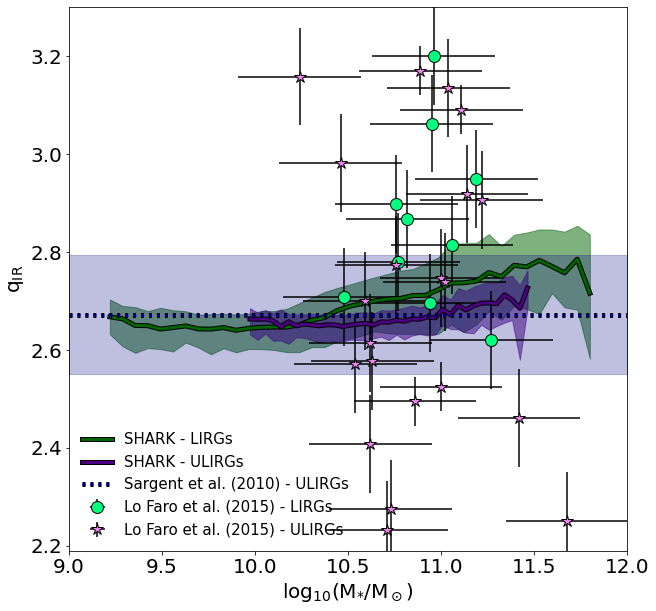

In [13]:
lf_shark = pd.read_csv('lightcone_lo_faro.csv')
#lf_shark.replace(0, np.nan, inplace=True)
plt.rcParams.update({'font.size': 20})
###Creating qir mstar plots###
lin_mst = np.linspace(9,12,2) 
lirg_lf_mid = np.full(len(lin_mst),2.83)
lirg_lf_low = np.full(len(lin_mst),2.73)
lirg_lf_upp = np.full(len(lin_mst),2.93)

ulirg_lf_mid = np.full(len(lin_mst),2.76)
ulirg_lf_low = np.full(len(lin_mst),2.66)
ulirg_lf_upp = np.full(len(lin_mst),2.86)

ulirg_sar_mid = np.full(len(lin_mst),2.672)
ulirg_sar_low = np.full(len(lin_mst),2.793)
ulirg_sar_upp = np.full(len(lin_mst),2.551)
    
mid_m_L = lf_shark['med_q_mst_l'] 
med_qir_L = lf_shark['med_qir_l'] 
low_qir_L = lf_shark['low_qir_l']
upp_qir_L = lf_shark['upp_qir_l']
mid_m_U = lf_shark['med_q_mst_u']    
med_qir_U = lf_shark['med_qir_u']  
low_qir_U = lf_shark['low_qir_u']
upp_qir_U = lf_shark['upp_qir_u']
mid_m_a = lf_shark['med_q_mst_a']   
med_qir_a = lf_shark['med_qir_a']  
fig, ax = plt.subplots(1)    

  #  c1 = ax.hexbin(mst_SL,qir_SL,mincnt = 1,cmap='Blues', gridsize = 30,alpha = 0.75,extent = (10,12, 2, 3.2),vmin = vmin,vmax = vmax)
  #  c2 = ax.hexbin(mst_SU,qir_SU,mincnt = 1,cmap='Reds', gridsize = 30,alpha = 0.75,extent = (10,12, 2, 3.2),vmin = vmin,vmax = vmax
#ax.plot(mid_m_a,med_qir_a,'blue',label = 'SHARK - LIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()]) 
ax.plot(mid_m_L,med_qir_L,'darkgreen',label = 'SHARK - LIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()]) 
ax.fill_between(mid_m_L,low_qir_L,upp_qir_L,color = 'darkgreen',alpha = 0.5)
ax.plot(mid_m_U,med_qir_U,'indigo',label = 'SHARK - ULIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(mid_m_U,low_qir_U,upp_qir_U,color = 'indigo',alpha = 0.5)
#ax.plot(lin_mst,lirg_lf_mid,label = 'Lo Faro et al. (2015) - LIRGs',color = 'springgreen',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax.fill_between(lin_mst,lirg_lf_low,lirg_lf_upp,color = 'springgreen',alpha = 0.25)
#ax.plot(lin_mst,ulirg_lf_mid,label = 'Lo Faro et al. (2015) - ULIRGs',color = 'violet',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax.fill_between(lin_mst,ulirg_lf_low,ulirg_lf_upp,color = 'violet',alpha = 0.25)
ax.plot(lin_mst,ulirg_sar_mid,label = 'Sargent et al. (2010) - ULIRGs',color = 'navy',linestyle = 'dotted',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(lin_mst,ulirg_sar_low,ulirg_sar_upp,color = 'navy',alpha = 0.25)
ax.errorbar(mst_L,qir_L, xerr = 0.33,yerr = qir_err_L ,fmt="o",markerfacecolor='springgreen', markeredgecolor='black',label = 'Lo Faro et al. (2015) - LIRGs',ecolor='black', markersize=12)
ax.errorbar(mst_U,qir_U, xerr = 0.33,yerr = qir_err_U ,fmt="*",markerfacecolor='violet', markeredgecolor='black',label = 'Lo Faro et al. (2015) - ULIRGs',ecolor='black', markersize=12) 
ax.set_xlabel("$\\rm log_{10}(M_{*}/M_\odot$)",fontsize = 20)
ax.set_ylabel("$\\rm q_{IR}$",fontsize = 20)
ax.set_xlim(9,12)
ax.set_ylim(2.19,3.3)
  #  cb1 = plt.colorbar(c1,pad=0,fraction=0.335)
  #  cb2 = plt.colorbar(c2,pad=0,fraction=0.075)
  #  cb2.set_ticks([])
  #  cb1.set_label('Number Count')
leg = ax.legend(frameon=False,fontsize = '15')
leg.get_frame().set_linewidth(0.0)
fig.set_size_inches(10,10)
plt.savefig("plots/final/lo_faro_qir.pdf")

In [14]:
lf_shark = pd.read_csv('Lightcone/lightcone_lo_faro.csv')
lf_shark.replace(0, np.nan, inplace=True)
df_lf = pd.read_csv('french_paper_2_pg16.2.csv')
    
df_lf['LIR/W'] = df_lf['L_IR'] * Lsun

print(df_lf['LIR'])

df_lf['qir'] = np.log10((df_lf['LIR/W']/(3.75*10**12))/df_lf['L1.4'])
    
df_lf['L1.4_err'] = 0.13 + df_lf['qir_err'] #approximate error of L_1.4
    
    ### Reading in LIRG data from Lo Faro et al. ###
    
LIRG_lf = df_lf[['SFR_k','M_hyperz','LIR/W','L1.4','qir','L1.4_err','qir_err']] [(df_lf['z'] < 1.5) ]
    
sfr_L = LIRG_lf['SFR_k']
mst_L = LIRG_lf['M_hyperz']
lir_L = np.log10(LIRG_lf['LIR/W'])
rad_L = np.log10(LIRG_lf['L1.4'])
qir_L = LIRG_lf['qir']
Lrad_err_L = LIRG_lf['L1.4_err']
qir_err_L = LIRG_lf['qir_err']
    
    ###Reading in ULIRG from Lo Faro et al.###
    
ULIRG_lf = df_lf[['SFR_k','M_hyperz','LIR/W','L1.4','qir','L1.4_err','qir_err']] [(df_lf['z'] > 1.5) ]
    
sfr_U = ULIRG_lf['SFR_k']
mst_U = ULIRG_lf['M_hyperz']
lir_U = np.log10(ULIRG_lf['LIR/W'])
rad_U = np.log10(ULIRG_lf['L1.4'])
qir_U = ULIRG_lf['qir']
Lrad_err_U = ULIRG_lf['L1.4_err']
qir_err_U = ULIRG_lf['qir_err']

 
med_rad_L = lf_shark['med_rad_l']    
mid_fir_L = lf_shark['med_fir_l'] 
low_rad_L = lf_shark['low_rad_l']    
upp_rad_L = lf_shark['upp_rad_l'] 

med_rad_U = lf_shark['med_rad_u']    
mid_fir_U = lf_shark['med_fir_u'] 
low_rad_U = lf_shark['low_rad_u']    
upp_rad_U = lf_shark['upp_rad_u'] 

qir_l = np.log10(10**(mid_fir_L)/3.75e12) - med_rad_L
qir_u = np.log10(10**(mid_fir_U)/3.75e12) - med_rad_U
mid_m_L = lf_shark['med_q_mst_l'] 
mid_m_U = lf_shark['med_q_mst_u']    


plt.plot(mid_m_L,qir_l)
plt.plot(mid_m_U,qir_u)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'Lightcone/lightcone_lo_faro.csv'

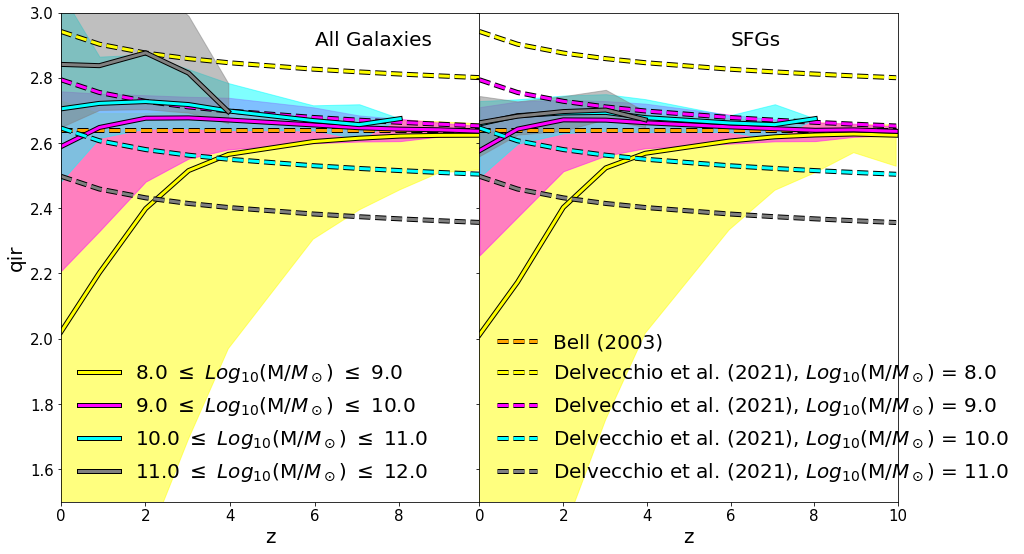

In [15]:
qm_df = pd.read_csv('Complete_csv/qir_z_mstar_lines.csv')

zlist = np.array([0, 0.909822023685613, 2.00391410007239, 3.0191633709527, 3.95972701662501, 5.96592270612165, 7.05756323172746, 8.0235605165086, 8.94312532315157, 9.95650268434316])
mlst = [1e8,1e9,1e10,1e11,1e12]
fig, ax = plt.subplots(1,2)
colours = ['yellow','magenta','cyan','grey','yellow','grey','white']
bell = np.zeros(len(zlist))
bell_upp = np.zeros(len(zlist))
bell_low = np.zeros(len(zlist))
bell.fill(2.64)
bell_upp.fill(2.66)
bell_low.fill(2.62)

delhaize_med = 2.88*(1+zlist)**(-0.19)
delhaize_low = (2.88 - 0.03)*(1+zlist)**(-0.19+0.01)
delhaize_upp = (2.88 + 0.03)*(1+zlist)**(-0.19-0.01)
ax[0].plot(zlist,bell,'orange',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax[1].plot(zlist,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
def delvecchio(M,z):
    qir_med = 2.646*(1+z)**(-0.023) - (0.148)*(np.log10(M) - 10)
    qir_upp = (2.646+0.024) *(1+z)**(-0.023+0.008) - (0.148-0.013)*(np.log10(M) - 10)    
    qir_low = (2.646-0.024) *(1+z)**(-0.023-0.008) - (0.148+0.013)*(np.log10(M) - 10)
    
    return qir_med, qir_upp, qir_low

for m in range(len(mlst)-1):
    
    m1 = mlst[m]
    m2 = mlst[m+1]
                
    qir_all_med_lab = 'qir_all_med_m1_' + str(m1)
    qir_all_low_lab = 'qir_all_low_m1_' + str(m1)
    qir_all_upp_lab = 'qir_all_upp_m1_' + str(m1) 

    qir_sfg_med_lab = 'qir_sfg_med_z_' + str(m1) 
    qir_sfg_low_lab = 'qir_sfg_low_z_' + str(m1) 
    qir_sfg_upp_lab = 'qir_sfg_upp_z_' + str(m1)

    qir_all_med = qm_df[qir_all_med_lab]
    qir_all_low = qm_df[qir_all_low_lab]
    qir_all_upp = qm_df[qir_all_upp_lab]

    qir_sfg_med = qm_df[qir_sfg_med_lab]
    qir_sfg_low = qm_df[qir_sfg_low_lab]
    qir_sfg_upp = qm_df[qir_sfg_upp_lab]   
        ###plotting the different mass bins###
    label = str(np.log10(m1)) + " $\leq$ $Log_{10}$(M/$M_\odot$) $\leq$ " + str(np.log10(m2))
    
    delv_med,delv_low,delv_upp = delvecchio(m1,zlist)

    delv_lab = 'Delvecchio et al. (2021), $Log_{10}$(M/$M_\odot$) = ' + str(np.log10(m1))
    ax[0].plot(zlist,delv_med,color = colours[m],linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[1].plot(zlist,delv_med,color = colours[m],linestyle = 'dashed',linewidth = 3,label = delv_lab,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])        

    ax[0].plot(zlist,qir_all_med,color = colours[m],linewidth = 3,label = label,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        
    ax[0].fill_between(zlist,qir_all_low,qir_all_upp,color = colours[m],alpha = 0.5)       
    ax[1].plot(zlist,qir_sfg_med,color = colours[m],linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[1].fill_between(zlist,qir_sfg_upp,qir_sfg_low,color = colours[m],alpha = 0.5)
  
    



#ax[0].plot(zlist,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_between(zlist,bell_low,bell_upp,color = 'orange', alpha = 0.5)

#ax[0].plot(zlist,delhaize_med,'purple',label = 'Delhaize (2018)',linewidth = 2,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_between(zlist,delhaize_low,delhaize_upp,color = 'purple', alpha = 0.5)

#ax[1].plot(zlist,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[1].fill_between(zlist,bell_low,bell_upp,color = 'orange', alpha = 0.5)
#ax[1].plot(zlist,delhaize_med,'purple',label = 'Delhaize (2018)',linewidth = 2,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[1].fill_between(zlist,delhaize_low,delhaize_upp,color = 'purple', alpha = 0.5)

ax[0].text(6,2.9,'All Galaxies')
ax[1].text(6,2.9,'SFGs')    
    
ax[0].set_xlabel("z",fontsize = 20)
ax[1].set_xlabel("z",fontsize = 20)
ax[0].set_ylabel("qir",fontsize = 20)
    
ax[0].set_xlim(0,9.9)
ax[0].set_ylim(1.5,3)
ax[1].set_xlim(0,10)
ax[1].set_ylim(1.5,3)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15) 
ax[1].tick_params(labelleft=False)
leg = ax[0].legend(frameon = False)
leg.get_frame().set_linewidth(0.0)
leg = ax[1].legend(frameon = False)
leg.get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(15,9)
plt.savefig("plots/final/qir_z_mstar.pdf")


No handles with labels found to put in legend.


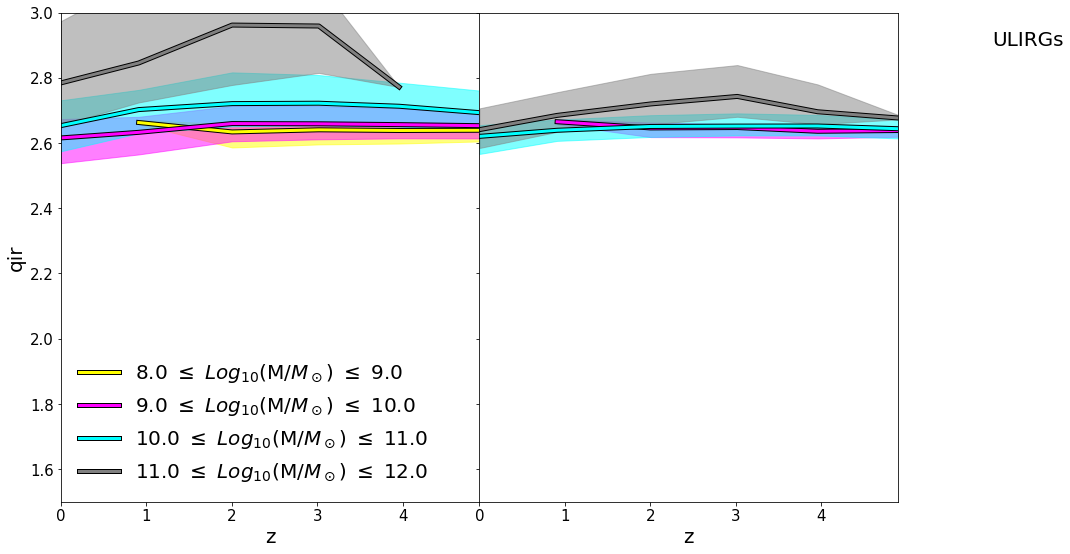

In [16]:
qm_df = pd.read_csv('Complete_csv/qir_z_mstar_ulirgs.csv')

zlist = np.array([0, 0.909822023685613, 2.00391410007239, 3.0191633709527, 3.95972701662501,5.02220991014863, 5.96592270612165, 7.05756323172746, 8.0235605165086, 8.94312532315157, 9.95650268434316])
#zlist = np.array([0, 0.194738848008908, 0.909822023685613, 2.00391410007239, 3.0191633709527, 3.95972701662501,5.02220991014863])

mlst = [1e8,1e9,1e10,1e11,1e12]
fig, ax = plt.subplots(1,2)
colours = ['yellow','magenta','cyan','grey','yellow','grey','white']
lin_mst = np.linspace(9,12,2) 
lirg_lf_mid = np.full(len(lin_mst),2.83)
lirg_lf_low = np.full(len(lin_mst),2.73)
lirg_lf_upp = np.full(len(lin_mst),2.93)

ulirg_lf_mid = np.full(len(lin_mst),2.76)
ulirg_lf_low = np.full(len(lin_mst),2.66)
ulirg_lf_upp = np.full(len(lin_mst),2.86)

ulirg_sar_mid = np.full(len(lin_mst),2.672)
ulirg_sar_low = np.full(len(lin_mst),2.793)
ulirg_sar_upp = np.full(len(lin_mst),2.551)

delhaize_med = 2.88*(1+zlist)**(-0.19)
delhaize_low = (2.88 - 0.03)*(1+zlist)**(-0.19+0.01)
delhaize_upp = (2.88 + 0.03)*(1+zlist)**(-0.19-0.01)
#ax[0].plot(zlist,bell,'orange',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[1].plot(zlist,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
def delvecchio(M,z):
    qir_med = 2.646*(1+z)**(-0.023) - (0.148)*(np.log10(M) - 10)
    qir_upp = (2.646+0.024) *(1+z)**(-0.023+0.008) - (0.148-0.013)*(np.log10(M) - 10)    
    qir_low = (2.646-0.024) *(1+z)**(-0.023-0.008) - (0.148+0.013)*(np.log10(M) - 10)
    
    return qir_med, qir_upp, qir_low

for m in range(len(mlst)-1):
    
    m1 = mlst[m]
    m2 = mlst[m+1]
                
    qir_all_med_lab = 'qir_lirg_med_m1_' + str(m1)
    qir_all_low_lab = 'qir_lirg_low_m1_' + str(m1)
    qir_all_upp_lab = 'qir_lirg_upp_m1_' + str(m1) 

    qir_sfg_med_lab = 'qir_ulirg_med_z_' + str(m1) 
    qir_sfg_low_lab = 'qir_ulirg_low_z_' + str(m1) 
    qir_sfg_upp_lab = 'qir_ulirg_upp_z_' + str(m1)

    qir_all_med = qm_df[qir_all_med_lab]
    qir_all_low = qm_df[qir_all_low_lab]
    qir_all_upp = qm_df[qir_all_upp_lab]

    qir_sfg_med = qm_df[qir_sfg_med_lab]
    qir_sfg_low = qm_df[qir_sfg_low_lab]
    qir_sfg_upp = qm_df[qir_sfg_upp_lab]   
        ###plotting the different mass bins###
    label = str(np.log10(m1)) + " $\leq$ $Log_{10}$(M/$M_\odot$) $\leq$ " + str(np.log10(m2))        

    ax[0].plot(zlist,qir_all_med,color = colours[m],linewidth = 3,label = label,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        
    ax[0].fill_between(zlist,qir_all_low,qir_all_upp,color = colours[m],alpha = 0.5)       
    ax[1].plot(zlist,qir_sfg_med,color = colours[m],linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[1].fill_between(zlist,qir_sfg_upp,qir_sfg_low,color = colours[m],alpha = 0.5)
  
    



#ax[0].plot(zlist,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_between(zlist,bell_low,bell_upp,color = 'orange', alpha = 0.5)

#ax[0].plot(zlist,delhaize_med,'purple',label = 'Delhaize (2018)',linewidth = 2,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[0].fill_between(zlist,delhaize_low,delhaize_upp,color = 'purple', alpha = 0.5)

#ax[1].plot(zlist,bell,'orange',label = 'Bell (2003)',linewidth = 3,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[1].fill_between(zlist,bell_low,bell_upp,color = 'orange', alpha = 0.5)
#ax[1].plot(zlist,delhaize_med,'purple',label = 'Delhaize (2018)',linewidth = 2,linestyle = 'dashed',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
#ax[1].fill_between(zlist,delhaize_low,delhaize_upp,color = 'purple', alpha = 0.5)

ax[0].text(6,2.9,'LIRGs')
ax[1].text(6,2.9,'ULIRGs')    
    
ax[0].set_xlabel("z",fontsize = 20)
ax[1].set_xlabel("z",fontsize = 20)
ax[0].set_ylabel("qir",fontsize = 20)
    
ax[0].set_xlim(0,4.9)
ax[0].set_ylim(1.5,3)
ax[1].set_xlim(0,4.9)
ax[1].set_ylim(1.5,3)
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15) 
ax[1].tick_params(labelleft=False)
leg = ax[0].legend(frameon = False)
leg.get_frame().set_linewidth(0.0)
leg = ax[1].legend(frameon = False)
leg.get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(15,9)
#plt.savefig("plots/final/qir_z_mstar.pdf")



No handles with labels found to put in legend.
No handles with labels found to put in legend.


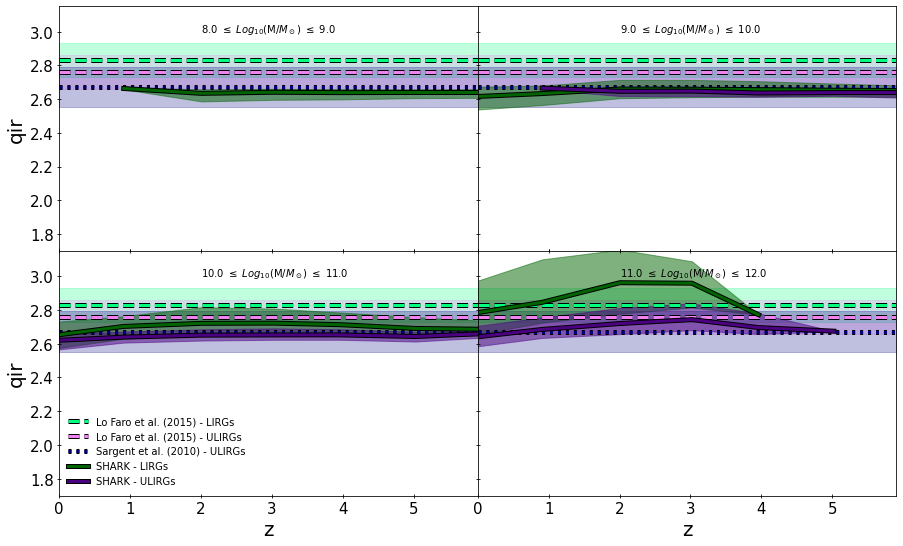

In [173]:
qm_df = pd.read_csv('Complete_csv/qir_z_mstar_ulirgs.csv')

zlist = np.array([0, 0.909822023685613, 2.00391410007239, 3.0191633709527, 3.95972701662501,5.02220991014863, 5.96592270612165, 7.05756323172746, 8.0235605165086, 8.94312532315157, 9.95650268434316])
mlst = [1e8,1e9,1e10,1e11,1e12]
zlst1 = np.linspace(0,1.9)
zlst2 = np.linspace(2,12)
colours = ['yellow','magenta','cyan','grey','yellow','grey','white']
lin_mst = np.linspace(0,6,2) 
lirg_lf_mid = np.full(len(lin_mst),2.83)
lirg_lf_low = np.full(len(lin_mst),2.73)
lirg_lf_upp = np.full(len(lin_mst),2.93)

ulirg_lf_mid = np.full(len(lin_mst),2.76)
ulirg_lf_low = np.full(len(lin_mst),2.66)
ulirg_lf_upp = np.full(len(lin_mst),2.86)

ulirg_sar_mid = np.full(len(lin_mst),2.672)
ulirg_sar_low = np.full(len(lin_mst),2.793)
ulirg_sar_upp = np.full(len(lin_mst),2.551)
zlst3 = np.linspace(0,3.9)
zlst4 = np.linspace(4,12)
fig, ax = plt.subplots(2,2)
q = 0
for m in range(len(mlst)-1):
    m1 = mlst[m]
    m2 = mlst[m+1]
    
    g = q//2
    h = q%2
    
    
    qir_all_med_lab = 'qir_lirg_med_m1_' + str(m1)
    qir_all_low_lab = 'qir_lirg_low_m1_' + str(m1)
    qir_all_upp_lab = 'qir_lirg_upp_m1_' + str(m1) 

    qir_sfg_med_lab = 'qir_ulirg_med_z_' + str(m1) 
    qir_sfg_low_lab = 'qir_ulirg_low_z_' + str(m1) 
    qir_sfg_upp_lab = 'qir_ulirg_upp_z_' + str(m1)

    qir_all_med = qm_df[qir_all_med_lab]
    qir_all_low = qm_df[qir_all_low_lab]
    qir_all_upp = qm_df[qir_all_upp_lab]

    qir_sfg_med = qm_df[qir_sfg_med_lab]
    qir_sfg_low = qm_df[qir_sfg_low_lab]
    qir_sfg_upp = qm_df[qir_sfg_upp_lab]
    
    label = str(np.log10(m1)) + " $\leq$ $Log_{10}$(M/$M_\odot$) $\leq$ " + str(np.log10(m2))
    
    delv_med,delv_low,delv_upp = delvecchio(m1,zlist)
    delv_med1,delv_low1,delv_upp1 = delvecchio(m1,zlst3)
    delv_med2,delv_low2,delv_upp2 = delvecchio(m1,zlst4)
    ax[g,h].plot(lin_mst,lirg_lf_mid,label = 'Lo Faro et al. (2015) - LIRGs',color = 'springgreen',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(lin_mst,lirg_lf_low,lirg_lf_upp,color = 'springgreen',alpha = 0.25)
    ax[g,h].plot(lin_mst,ulirg_lf_mid,label = 'Lo Faro et al. (2015) - ULIRGs',color = 'violet',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(lin_mst,ulirg_lf_low,ulirg_lf_upp,color = 'violet',alpha = 0.25)
    ax[g,h].plot(lin_mst,ulirg_sar_mid,label = 'Sargent et al. (2010) - ULIRGs',color = 'navy',linestyle = 'dotted',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(lin_mst,ulirg_sar_low,ulirg_sar_upp,color = 'navy',alpha = 0.25)    
    
    delv_lab = 'Delvecchio et al. (2021), $Log_{10}$(M/$M_\odot$) = ' + str(np.log10(m1))

    ax[g,h].plot(zlist,qir_all_med,color = 'darkgreen',linewidth = 3,label = 'SHARK - LIRGs',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        
    ax[g,h].fill_between(zlist,qir_all_low,qir_all_upp,color = 'darkgreen',alpha = 0.5)       
    ax[g,h].plot(zlist,qir_sfg_med,color = 'indigo',label = 'SHARK - ULIRGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(zlist,qir_sfg_upp,qir_sfg_low,color = 'indigo',alpha = 0.5)

    q += 1
    ax[1,h].set_xlabel("z",fontsize = 20)
    ax[g,0].set_ylabel("qir",fontsize = 20)
    ax[g,h].text(2.,3.0,label)
    ax[g,h].set_xlim(0,5.9)
    ax[g,h].set_ylim(1.7,3.15)
    ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
    ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
    ax[0,h].tick_params(top = False)
    ax[0,h].tick_params(labelsize=15)
    ax[g,1].tick_params(labelsize=15) 
    ax[g,1].tick_params(labelleft=False)
    ax[0,h].tick_params(labelbottom=False)
    leg = ax[1,0].legend(frameon = False,loc = 'lower left')
    leg.get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(15,9)
plt.savefig("plots/final/lo_faro_qir_z_mstar.pdf")

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


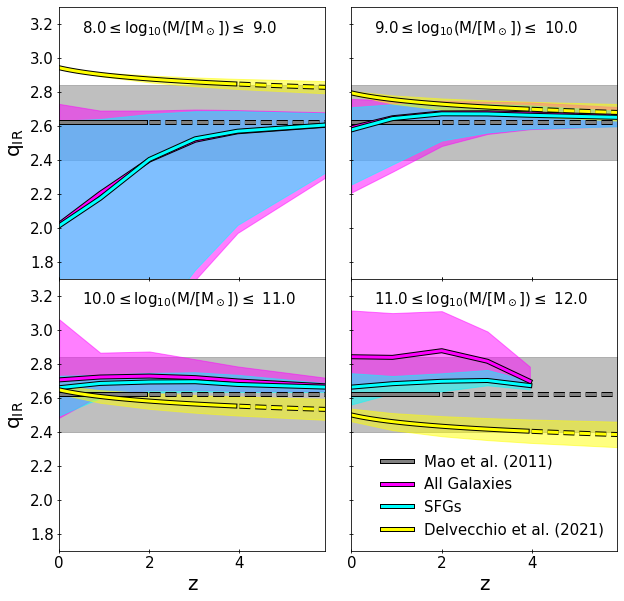

In [77]:
qm_df = pd.read_csv('Complete_csv/qir_z_mstar_lines.csv')

zlist = np.array([0, 0.909822023685613, 2.00391410007239, 3.0191633709527, 3.95972701662501, 5.96592270612165, 7.05756323172746, 8.0235605165086, 8.94312532315157, 9.95650268434316])
mlst = [1e8,1e9,1e10,1e11,1e12]
zlst1 = np.linspace(0,1.9)
zlst2 = np.linspace(2,12)
colours = ['yellow','magenta','cyan','grey','yellow','grey','white']
mao_med = np.zeros(len(zlst1))
mao_upp = np.zeros(len(zlist))
mao_low = np.zeros(len(zlist))
mao_med.fill(2.62)
mao_upp.fill(2.84)
mao_low.fill(2.40)

delhaize_med = 2.88*(1+zlist)**(-0.19)
delhaize_low = (2.88 - 0.03)*(1+zlist)**(-0.19+0.01)
delhaize_upp = (2.88 + 0.03)*(1+zlist)**(-0.19-0.01)
zlst3 = np.linspace(0,3.9)
zlst4 = np.linspace(4,12)
fig, ax = plt.subplots(2,2)
q = 0
for m in range(len(mlst)-1):
    m1 = mlst[m]
    m2 = mlst[m+1]
    
    g = q//2
    h = q%2
    
    
    qir_all_med_lab = 'qir_all_med_m1_' + str(m1)
    qir_all_low_lab = 'qir_all_low_m1_' + str(m1)
    qir_all_upp_lab = 'qir_all_upp_m1_' + str(m1) 

    qir_sfg_med_lab = 'qir_sfg_med_z_' + str(m1) 
    qir_sfg_low_lab = 'qir_sfg_low_z_' + str(m1) 
    qir_sfg_upp_lab = 'qir_sfg_upp_z_' + str(m1)

    qir_all_med = qm_df[qir_all_med_lab]
    qir_all_low = qm_df[qir_all_low_lab]
    qir_all_upp = qm_df[qir_all_upp_lab]

    qir_sfg_med = qm_df[qir_sfg_med_lab]
    qir_sfg_low = qm_df[qir_sfg_low_lab]
    qir_sfg_upp = qm_df[qir_sfg_upp_lab]
    
    label = str(np.log10(m1)) + "$ \\rm \leq log_{10}(M/[M_\odot]) \leq$ " + str(np.log10(m2))
    
    delv_med,delv_low,delv_upp = delvecchio(m1,zlist)
    delv_med1,delv_low1,delv_upp1 = delvecchio(m1,zlst3)
    delv_med2,delv_low2,delv_upp2 = delvecchio(m1,zlst4)
    
    
    delv_lab = 'Delvecchio et al. (2021), $Log_{10}$(M/$M_\odot$) = ' + str(np.log10(m1))
    ax[g,h].plot(zlst1,mao_med,color = 'grey',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],label = 'Mao et al. (2011)')
    ax[g,h].plot(zlst2,mao_med,color = 'grey',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])    
    ax[g,h].fill_between(zlist,mao_low,mao_upp,color = 'grey',alpha = 0.5)        

    ax[g,h].plot(zlist,qir_all_med,color = 'magenta',linewidth = 3,label = 'All Galaxies',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        
    ax[g,h].fill_between(zlist,qir_all_low,qir_all_upp,color = 'magenta',alpha = 0.5)       
    ax[g,h].plot(zlist,qir_sfg_med,color = 'cyan',label = 'SFGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(zlist,qir_sfg_upp,qir_sfg_low,color = 'cyan',alpha = 0.5)
    ax[g,h].plot(zlst3,delv_med1,color = 'yellow',label = 'Delvecchio et al. (2021)',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].plot(zlst4,delv_med2,color = 'yellow',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(zlist,delv_low,delv_upp,color = 'yellow',alpha = 0.5)
    q += 1
    ax[1,h].set_xlabel("z",fontsize = 20)
    ax[g,0].set_ylabel("$\\rm q_{IR}$",fontsize = 20)
    ax[g,h].text(0.5,3.15,label)
    ax[g,h].set_xlim(0,5.9)
    ax[g,h].set_ylim(1.7,3.3)
    ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
    ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
    ax[0,h].tick_params(top = False)
    ax[0,h].tick_params(labelsize=15)
    ax[g,1].tick_params(labelsize=15) 
    ax[g,1].tick_params(labelleft=False)
    ax[0,h].tick_params(labelbottom=False)
    leg = ax[1,1].legend(frameon = False,loc = 'lower right')
    leg.get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0.1, hspace=0)
fig.set_size_inches(10,10)
plt.savefig("plots/final/qir_z_mstar.pdf")


0      8.0
1      8.0
2      8.0
3      8.0
4      8.0
      ... 
145    0.0
146    0.0
147    0.0
148    0.0
149    0.0
Name: z, Length: 150, dtype: float64
0 0
1 0
0 1
1 1


/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


0 2
1 2
0 3
1 3


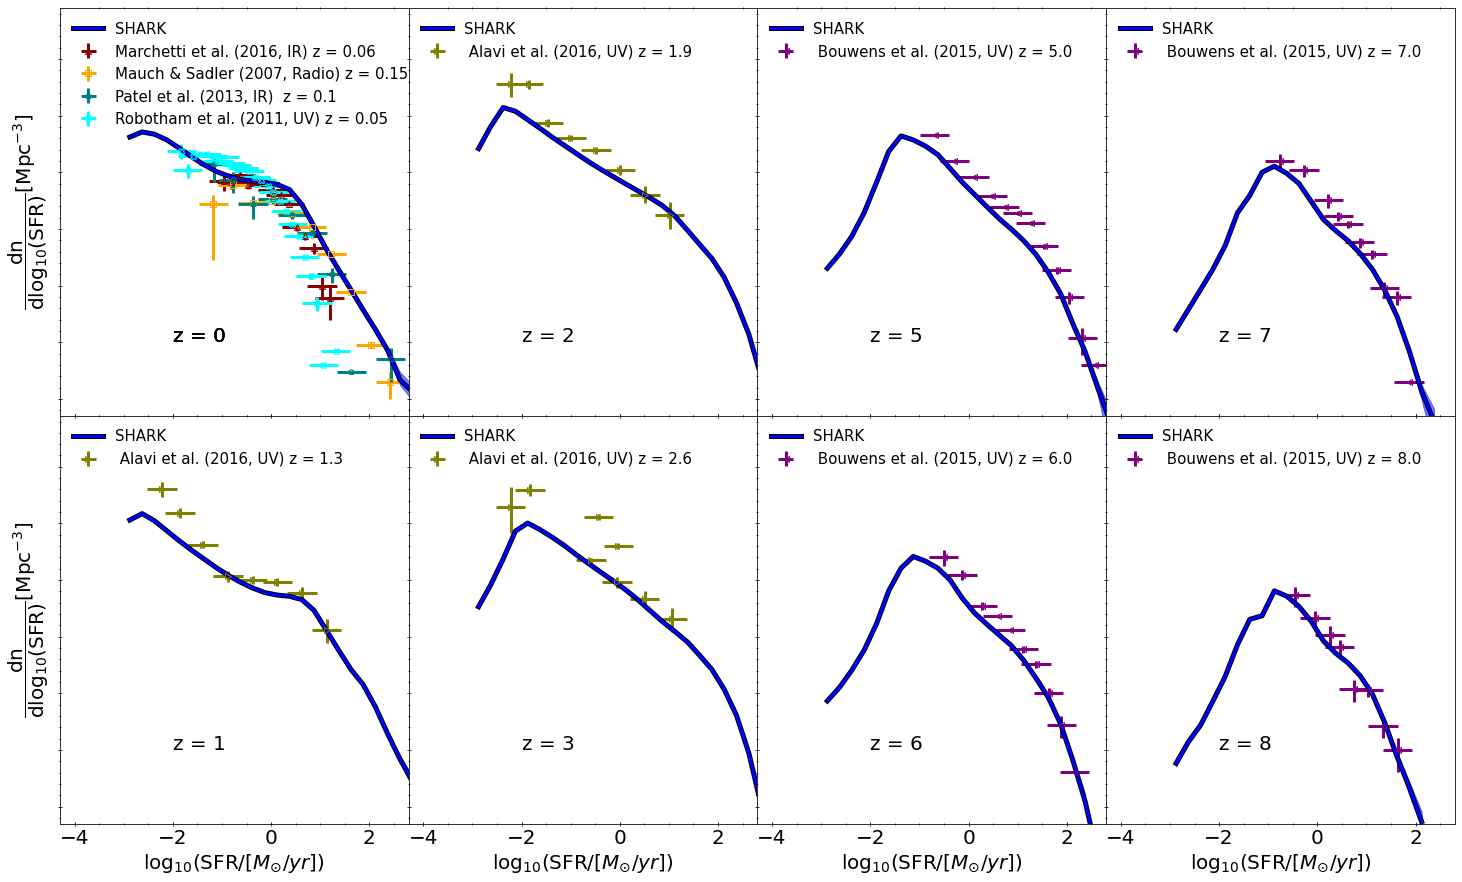

In [13]:
plt.rcParams.update({'font.size': 15})
shark_df = pd.read_csv('Complete_csv/sfr_func_SHARK.csv')
sf_df = pd.read_csv('SFR_function2.csv')

sf_df['Z'] = sf_df['Z'].replace(0.375,np.nan)
sf_df['Z'] = sf_df['Z'].replace(0.3,np.nan)
sf_df['Z'] = sf_df['Z'].replace(0.4,np.nan)
sf_df['z'] = round(sf_df['Z'])
print(sf_df['z'])
sf_df['source_2'] = sf_df['source'] + ' z = ' + sf_df['Z'].astype(str)

zlst = [0,1,2,3,5,6,7,8]
fig, ax = plt.subplots(2,4)
fmt_lst = ['o','^','s','P','p','X','D','>','<','v']
col_lst = ['darkblue','darkred','orange','magenta','teal','cyan','grey','olive','purple','purple']
source_lst = np.sort(np.unique(sf_df['source'])) #source list
source_lst2 = np.sort(np.unique(sf_df['source_2'])) #source list
q = 0
mlow = 8
mupp = 12
dm = 0.25
mbins = np.arange(mlow, mupp, dm)
xmf = mbins + dm/2.0 #setting up the bins   
    
for z in zlst:
    g = q%2
    h = q//2
    
    print(g,h)


    bin_lab = 'sbins_'+str(round(z))
    med_lab = 'med_sfr'+str(round(z))        
    low_lab = 'low_sfr'+str(round(z))
    upp_lab = 'upp_sfr'+str(round(z))
        
    sbins = shark_df[bin_lab]
    med_sfr = shark_df[med_lab]
    low_sfr = shark_df[low_lab]
    upp_sfr = shark_df[upp_lab]
    xmf = sbins + dm/2.0 #setting up the bins
   # if q == 1:
    ax[g,h].plot(xmf,med_sfr,color = 'blue',label = 'SHARK',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],linewidth = 3)
   # else:
   #     ax[g,h].plot(xmf,med_sfr,color = 'blue')        
    ax[g,h].fill_between(xmf,low_sfr,upp_sfr,color = 'blue',alpha = 0.5)


    sf_df2 = sf_df[['SFR','SFRF','SFR_err_upp','SFR_err_low','source_2','source']] [((sf_df['z'] == z))]
    k = 0
    
    sou_lst = np.sort(np.unique(sf_df2['source'])) #source list
    sou_lst2 = np.sort(np.unique(sf_df2['source_2'])) #source list
    for source, source2 in zip(sou_lst,sou_lst2):
        idx = np.where(source_lst == source)[0][0]

        sf_df3 = sf_df2[['SFR','SFRF','SFR_err_upp','SFR_err_low']] [((sf_df2['source_2'] == source2))]

        sfr = np.log10(sf_df3['SFR'])
        sfr_err = 0.3

        sfrf = np.log10(sf_df3['SFRF']*10**(-2))
        sfrf_err_upp = np.log10(sf_df3['SFRF']*10**(-2) + sf_df3['SFR_err_upp']*10**(-2)) - sfrf
        sfrf_err_low = sfrf - np.log10(sf_df3['SFRF']*10**(-2) - sf_df3['SFR_err_low']*10**(-2))

        sfrf_err = [sfrf_err_low,sfrf_err_upp]
        fmt = fmt_lst[idx]
        col = col_lst[idx]
        label = source2
        tit = 'z = ' + str(z)

        ax[g,h].errorbar(sfr,sfrf,xerr = sfr_err,yerr=sfrf_err, markerfacecolor='none',fmt=fmt, markeredgecolor=col,label = label,elinewidth=3,ecolor = col)
        ax[g,h].set_xlim(-4.3,2.8)
        ax[g,h].set_ylim(-6.3,0.9)
        ax[g,h].set_xlabel('$\\rm log_{10}$(SFR/[$M_{\odot}/yr])$',size = 20)
        ax[g,0].set_ylabel('$\\rm \dfrac{dn}{dlog_{10}(SFR)}[Mpc^{-3}]$',size = 20)

        ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=20)
        ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
        ax[0,h].tick_params(labelbottom=False, top = True,labelsize=20) 
        ax[0,h].tick_params(top = False)
        ax[g,h].tick_params(labelleft=False)
        ax[0,h].tick_params(labelleft=False)
        ax[g,h].minorticks_on()
        ax[g,h].text(-2,-5,tit,fontsize = 20)
        leg = ax[g,h].legend(frameon = False,fontsize = 15,loc = 'upper left')
        leg.get_frame().set_linewidth(0.0)
        k+= 1
    q += 1

plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(25,15)
plt.margins(x=0,y = 0)
plt.savefig("plots/final/sfr_function.pdf",pad_inches=0)



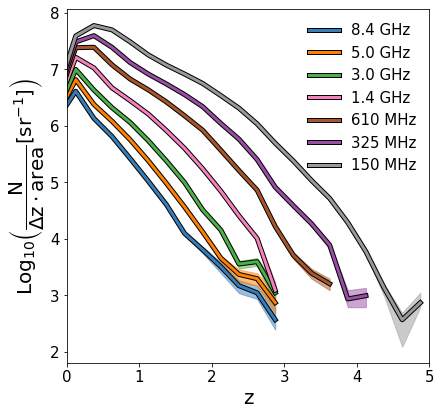

In [38]:
nc_df = pd.read_csv('Complete_csv/lightcone_number_count_data_SHARK.csv')

freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz   

lab_lst = ['8.4 GHz','5.0 GHz','3.0 GHz', '1.4 GHz', '610 MHz', '325 MHz', '150 MHz']
n = 100
zlow = -0.25
zupp = 5
dz = 0.25
nbins = 10
zbins = np.arange(zlow,zupp, dz)
zbins = zbins + dz/2
fig, ax = plt.subplots(1,1)
q = 0

colours = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']
for nu in freq_labels:
    result_lst = []
    s12_lst = []
    xlab = 'S/mJy ' + str(nu)
    save_name = 'Plots/redshift_lightcone' + str(nu) +'.pdf'
    label = lab_lst[q]

        
    zbins_lab = 'zbins_' + nu
    zlow_lab = 'zlow_' + nu
    zupp_lab = 'zupp_' + nu        
    zmed_lab = 'zmed_' + nu        
        
    zbins = nc_df[zbins_lab]
    zlow = nc_df[zlow_lab]
    zupp = nc_df[zupp_lab]
    zmed = nc_df[zmed_lab]     
    ax.set_xlim(0,5) 
    ax.plot(zbins,zmed,color = colours[q] ,linewidth = 3,label = label,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax.fill_between(zbins,zlow,zupp,color = colours[q],alpha = 0.5)
    q+=1

        
ax.set_ylabel(r'$\rm Log_{10}\left(\dfrac{N}{\Delta z \cdot area}[sr^{-1}]\right)$',fontsize = 20)
ax.set_xlabel("z",fontsize = 20)
leg = ax.legend(frameon = False,fontsize = 15)
leg.get_frame().set_linewidth(0.0)
fig.set_size_inches(6.5,6.5)
plt.savefig('plots/final/lightcone_z.pdf')
plt.show()

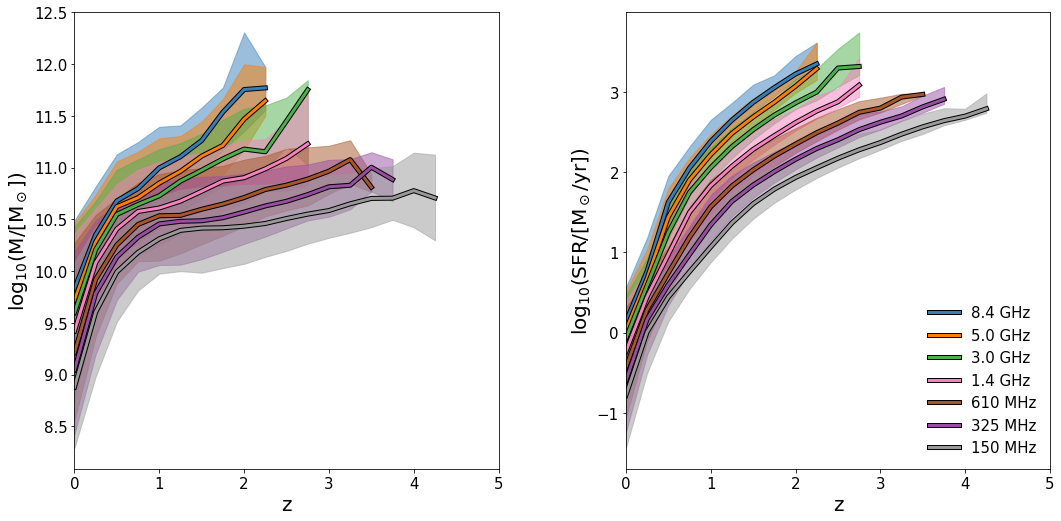

In [50]:
    ms_df = pd.read_csv('Complete_csv/lightcone_mstar_sfr_data_SHARK.csv')
    freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz   

    lab_lst = ['8.4 GHz','5.0 GHz','3.0 GHz', '1.4 GHz', '610 MHz', '325 MHz', '150 MHz']
    fig, ax = plt.subplots(1,2)
    q = 0
    colours = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999', '#e41a1c', '#dede00']

    for nu in freq_labels:

        zmf_lab = 'zmf_' + nu
        mst_med_lab = 'mst_med' + nu
        mst_low_lab = 'mst_low' + nu
        mst_upp_lab = 'mst_upp' + nu               

        sfr_med_lab = 'sfr_med' + nu
        sfr_low_lab = 'sfr_low' + nu
        sfr_upp_lab = 'sfr_upp' + nu      
        
        zmf = ms_df[zmf_lab]

        mstar_med = ms_df[mst_med_lab]
        mstar_low = ms_df[mst_low_lab]
        mstar_upp = ms_df[mst_upp_lab]

        sfr_med = ms_df[sfr_med_lab]
        sfr_low = ms_df[sfr_low_lab]
        sfr_upp = ms_df[sfr_upp_lab]
        label = lab_lst[q]
        

        ax[0].plot(zmf,mstar_med,color = colours[q] ,linewidth = 3,label = label,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[0].fill_between(zmf,mstar_low,mstar_upp,color = colours[q],alpha = 0.5)
        ax[1].plot(zmf,sfr_med,color = colours[q] ,linewidth = 3,label = label,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[1].fill_between(zmf,sfr_low,sfr_upp,color = colours[q],alpha = 0.5)
        ax[0].set_xlim(0,5)
        ax[1].set_xlim(0,5)
        q +=1
   # ax[1].tick_params(bottom = True, top = True)
   # ax[0].tick_params(labelbottom=False) 
    #plt.subplots_adjust(wspace=0, hspace=0)
    ax[0].set_ylabel('$\\rm log_{10}(M/[M_\odot])$',fontsize = 20)
    ax[1].set_ylabel('$\\rm log_{10}(SFR/[M_\odot/yr])$',fontsize = 20)
    ax[1].set_xlabel("z",fontsize = 20)
    ax[0].set_xlabel("z",fontsize = 20)
    leg = ax[1].legend(frameon = False,fontsize = 15)
    leg.get_frame().set_linewidth(0.0)
    fig.set_size_inches(15,7.5)
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.3, hspace=0)
    fig.set_size_inches(15,7.5)
    plt.savefig("plots/final/lightcone_mst_sfr.pdf")
    plt.show()        

In [1]:
    lab_dict = {'LoTSS_DR2':'Hardcastle et al. (2021) - LOFAR','Mandal_LOTSS_2021':'Mandal et al. (2021) - LOFAR', 'Williams_LOFAR_2016':'Williams et al. (2016) - LOFAR', 'Hurley_MWA_2017':'Hurley-Walker et al (2016) - MWA', 'Franzen_MWA_2016':'Franzen et al. (2016) - MWA','Oort_1988':'Oort, Steemers & Windhorst (1988) - WSRT', 'Riseley_GMRT_2016':'Risely et al. (2016) - GMRT', 'Sirothia_GMRT_2009':'Sirothia et al. (2009) - GMRT', 'Mazumder_GMRT_2020':'Mazumder et al. (2020) - GMRT','Moss_GMRT_2009':'Moss et al. (2007) - GMRT', 'Ocran_GMRT_2020':'Ocran et al. (2020) - GMRT', 'Hale_ASKAP_2021':'Hale et al. (2021) - ASKAP', 'Garn_GMRT_2008':'Garn et al. (2008) - GMRT', 'Ibar_GMRT_2009':'Ibar et al. (2009) - GMRT', 'Bondi_GMRT_2006':'Bondi et al. (2007) - GMRT','DEEP2_Matthews_2021':'Matthews et al. (2021) - MeerKat', 'Formalont_2006':'Formalont et al. (2006) - VLA', 'Biggs_2006':'Biggs & Ivison (2006) - VLA', 'Seymour_2008':'Seymour et al. (2008) - VLA', 'NVSS_Condon_1998':'Condon et al. (1998) - VLA', 'Hopkins-Primary':'Hopkins et al. (2003) - ATCA (Primary)', 'Hopkins-Deep':'Hopkins et al. (2003) - ATCA (Deep)', 'Prandoni_2000':'Prandoni et al. (2000) - ATCA', 'Windhorst_2003_14':'Windhorst (2003) - Multiple', 'Huynh_2005':'Huynh et al. (2005) - ATCA','Gordon_VLA_2021':'Gordon et al. (2021) - VLA', '2014_Vernstrom_3GHz':'Vernstrom et al. (2014) - VLA', 'Butler_ATCA_2017':'Butler et al. (2018) - ATCA', 'Van_Der_Vlugt_VLA_2021':'van der Vlugt et al. (2021) - VLA', 'Vernstrom_VLA_2016':'Vernstrom et al. (2016) - VLA','Huynh_ATCA_2015':'Huynh et al. (2015) - VLA', 'Windhorst_2003_8GHz':'Windhorst (2003) - Multiple','Windhorst_2003_5GHz':'Windhorst (2003) - Multiple'}
    lc_df = pd.read_csv('lightcone_data.csv')
    xmf = lc_df['xmf']
    freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz
    freq_lst2 = [8400,5000,3000,1400,610,325,150]
    dfn = pd.read_csv('v2_master_file_+vernstrom.csv')
    dfn = dfn.replace(to_replace='Average_U/C', value='LoTSS_DR2', regex=True)

    label = dfn['dataset']
    for key in lab_dict:
        dfn = dfn.replace(to_replace=key, value=lab_dict[key], regex=True)
    
    
    k = 0
    fig, ax = plt.subplots(2,4)
    for i in range(len(freq_labels)):
        
        h = k//2
        g = k%2
        nu = freq_labels[i]
        result_lst = []
        s12_lst = []
        xlab = 's/mJy ' + str(nu)
        
        med_str = nu + "_med_bres"
        upp_str = nu + "_upp_bres"
        low_str = nu + "_low_bres"

        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[g,h].plot(xmf,number_c_med,color = 'blue',label = 'SHARK - Bressan',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'blue',alpha = 0.5)

        med_str = nu + "_med_dale"
        upp_str = nu + "_upp_dale"
        low_str = nu + "_low_dale"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[g,h].plot(xmf,number_c_med,color = 'red',label = 'SHARK - Dale',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'blue',alpha = 0.5)
        
        
        freq = freq_lst2[i]
        
        
        dfn2 = dfn[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)','dataset']] [((dfn['frequency(MHz)'] == str(freq))&(dfn['Good_Point']==0))] 
        lablst = np.sort(np.unique(dfn2['dataset']))
        q = 0
        for label in lablst:
            fmt = fmt_lst[q]
            col = col_lst[q]
            dfn3 = dfn2[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)']] [(dfn2['dataset'] == label)] 
            N = dfn3['log(N)']
            S = np.log10(dfn3['S(mJy)'])

            N_err_upp = dfn3['up_lim_log(N)'] - N
            N_err_low = N - dfn3['low_lim_log(N)']
            N_err = (N_err_low,N_err_upp)

            ax[g,h].errorbar(S, N, yerr=N_err, fmt=fmt,markerfacecolor=col, markeredgecolor='black',label = label,elinewidth=3,ecolor = 'black')
            q+= 1

        
        tit = str(freq) + 'MHz'
        
       # plt.yscale("log")
        #plt.xscale("log")
        ax[g,h].text(2,15,tit)
        ax[g,h].set_xlim(-6.3,5.3)
        ax[g,h].set_ylim(-4,19)
        ax[g,h].set_xlabel('$Log_{10}$ (S/mJy)',size = 15)
        ax[g,0].set_ylabel(r'$Log_{10}\left(\dfrac{N}{\Delta S \cdot area}\right) [Jy^{-1} sr^{-1}]$ ',size = 15)
        ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
        ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
        ax[0,h].tick_params(labelbottom=False, top = True,labelsize=15) 
        ax[0,h].tick_params(top = False)
        ax[g,1].tick_params(labelleft=False)
        ax[g,h].minorticks_on()
        leg = ax[g,h].legend(loc='lower left',frameon = False,fontsize = 12)
        leg.get_frame().set_linewidth(0.0)
        k +=1

        
    for axs in ax.flat:
        ## check if something was plotted 
        if not bool(axs.has_data()):
            fig.delaxes(axs) ## delete if nothing is plotted in the axes obj    
    
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.set_size_inches(20, 20)
    plt.savefig('Plots/lightcone_plots.pdf')
    plt.show()

NameError: name 'pd' is not defined

0 0


/var/folders/09/_3cq3cqx13q541n438rng7cr0000gn/T/ipykernel_76945/896573855.py:58: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  c = ax[g,h].hexbin(mst,qir,C = parm, vmin = vmin, vmax = vmax,cmap = cmap,gridsize = 30,norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=4, base=10))


TypeError: 'method' object is not subscriptable

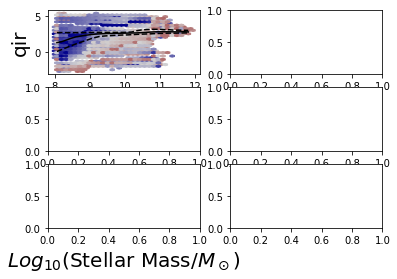

In [164]:
    df_line = pd.read_csv('Complete_csv/qir_mst_line.csv')
    hex_df = pd.read_csv('Complete_csv/qir_mst_hex.csv')
    fig, ax = plt.subplots(3,2)
    import matplotlib.colors as colors
    q = 0
    ###Reads in the data from the dataframe

    
    ###Creates the median lines

    
    mid_m = df_line['mid_mst'] 
    med_qir = df_line['med_qir']
    low_qir = df_line['low_qir']
    high_qir = df_line['upp_qir']
    
    mst = hex_df['mst_hex']
    qir = hex_df['qir_hex']
    num_cnt = hex_df['non_hex']
    tef = hex_df['tef_hex']
    hmr = hex_df['hmr_hex']
    gsd = hex_df['gsd_hex']
    sfr = np.log10(hex_df['sfr_hex'])
    sfd = hex_df['sfd_hex']
    
    parm_lst = [num_cnt,tef,hmr,gsd,sfr,sfd]
    clab_lst = ['Log$_{10}$(N)','Log$_{10}(T_{eff}/[K])$','Log$_{10}(r_{0.5mass}/[Mpc])$','Log$_{10}(\Sigma_{gas}/[M_\odot/M^{2}$])','Log$_{10}$(SFR/[$M_{\odot} yr^{-1}$])','Log$_{10}(\Sigma_{SFR}/[M_{\odot}yr^{-1}kpc^{-2}]])$']
    vmin_lst = [1,30,-3.5,12,-5,-8]
    vmax_lst = [1e4,50,-2.5,15,1,3]
    cmap1 = colors.LinearSegmentedColormap.from_list("", ["darkred","lightgrey","darkblue"])
    cmap2 = colors.LinearSegmentedColormap.from_list("", ["salmon","lightgrey","cornflowerblue"])
    cmap3 = colors.LinearSegmentedColormap.from_list("", ["green","lightgrey","darkmagenta"])
    cmap4 = colors.LinearSegmentedColormap.from_list("", ["lawngreen","lightgrey","violet"])
    cmap5 = colors.LinearSegmentedColormap.from_list("", ["maroon","lightgrey","olive"])
    cmap6 = colors.LinearSegmentedColormap.from_list("", ["orangered","lightgrey","cyan"])
    cmap_lst = [cmap1,cmap2,cmap3,cmap4,cmap5,cmap6]
    idx = np.where(mst < 1e100)
    
    mst = np.array(mst)[idx]
    qir = np.array(qir)[idx]

    for q in range(6):
        
        h = q//3
        g = q%3
        
        print(h,g)
        parm = np.array(parm_lst[q])
        parm = parm[idx]
        clab = clab_lst[q]
        cmap = cmap_lst[q]
        vmin = vmin_lst[q]
        vmax = vmax_lst[q]
        


        
        c = ax[g,h].hexbin(mst,qir,C = parm, vmin = vmin, vmax = vmax,cmap = cmap,gridsize = 30,norm=colors.SymLogNorm(linthresh=0.03, linscale=0.03, vmin=0, vmax=4, base=10))
        ax[g,h].plot(mid_m,med_qir,'black')
        ax[g,h].plot(mid_m,low_qir,'black',linestyle='dashed')   
        ax[g,h].plot(mid_m,high_qir,'black',linestyle='dashed')
        ax[2,h].set_xlabel("$Log_{10}$(Stellar Mass/$M_\odot$)",fontsize = 20)
        ax[g,0].set_ylabel('qir',fontsize = 20)
        ax[g,h].set_ylim[0,3.5]
        ax[g,h].set_xlim[8,12]
        cb = fig.colorbar(c,ax=ax[g,h])
        cb.set_label(clab,fontsize = 20)
        
        
        
    #plt.subplots_adjust(wspace=0, hspace=0)
    fig.set_size_inches(15,12)

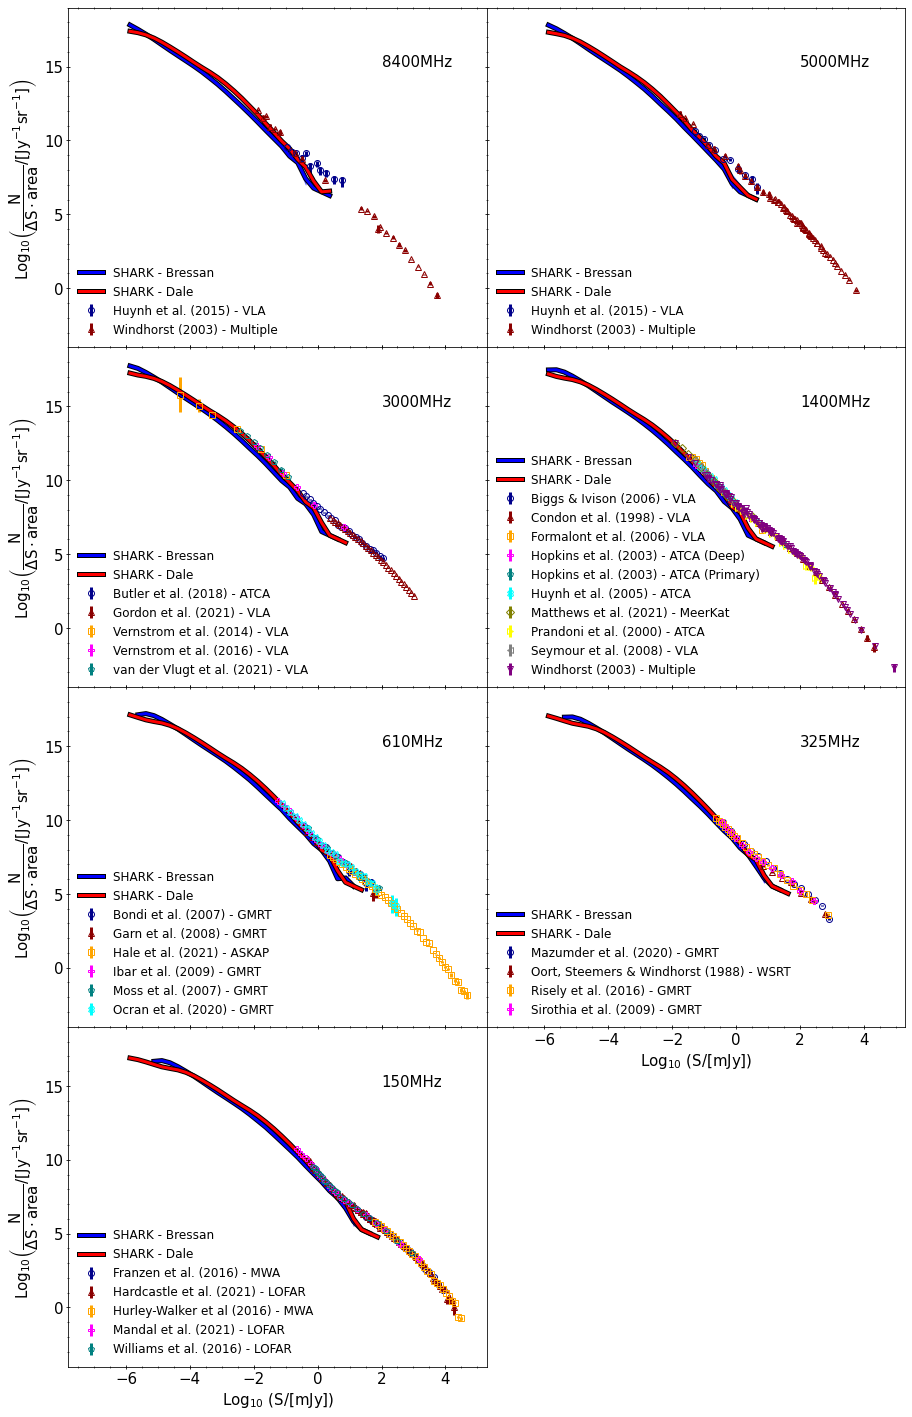

In [85]:
lab_dict = {'LoTSS_DR2':'Hardcastle et al. (2021) - LOFAR','Mandal_LOTSS_2021':'Mandal et al. (2021) - LOFAR', 'Williams_LOFAR_2016':'Williams et al. (2016) - LOFAR', 'Hurley_MWA_2017':'Hurley-Walker et al (2016) - MWA', 'Franzen_MWA_2016':'Franzen et al. (2016) - MWA','Oort_1988':'Oort, Steemers & Windhorst (1988) - WSRT', 'Riseley_GMRT_2016':'Risely et al. (2016) - GMRT', 'Sirothia_GMRT_2009':'Sirothia et al. (2009) - GMRT', 'Mazumder_GMRT_2020':'Mazumder et al. (2020) - GMRT','Moss_GMRT_2009':'Moss et al. (2007) - GMRT', 'Ocran_GMRT_2020':'Ocran et al. (2020) - GMRT', 'Hale_ASKAP_2021':'Hale et al. (2021) - ASKAP', 'Garn_GMRT_2008':'Garn et al. (2008) - GMRT', 'Ibar_GMRT_2009':'Ibar et al. (2009) - GMRT', 'Bondi_GMRT_2006':'Bondi et al. (2007) - GMRT','DEEP2_Matthews_2021':'Matthews et al. (2021) - MeerKat', 'Formalont_2006':'Formalont et al. (2006) - VLA', 'Biggs_2006':'Biggs & Ivison (2006) - VLA', 'Seymour_2008':'Seymour et al. (2008) - VLA', 'NVSS_Condon_1998':'Condon et al. (1998) - VLA', 'Hopkins-Primary':'Hopkins et al. (2003) - ATCA (Primary)', 'Hopkins-Deep':'Hopkins et al. (2003) - ATCA (Deep)', 'Prandoni_2000':'Prandoni et al. (2000) - ATCA', 'Windhorst_2003_14':'Windhorst (2003) - Multiple', 'Huynh_2005':'Huynh et al. (2005) - ATCA','Gordon_VLA_2021':'Gordon et al. (2021) - VLA', '2014_Vernstrom_3GHz':'Vernstrom et al. (2014) - VLA', 'Butler_ATCA_2017':'Butler et al. (2018) - ATCA', 'Van_Der_Vlugt_VLA_2021':'van der Vlugt et al. (2021) - VLA', 'Vernstrom_VLA_2016':'Vernstrom et al. (2016) - VLA','Huynh_ATCA_2015':'Huynh et al. (2015) - VLA', 'Windhorst_2003_8GHz':'Windhorst (2003) - Multiple','Windhorst_2003_5GHz':'Windhorst (2003) - Multiple'}


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
sf_df = pd.read_csv('Documents/Masters/Masters_Thesis/SFR_function2.csv')
sf_df['z'] = round(sf_df['Z'])
sf_df['source_2'] = sf_df['source'] + ' z = ' + sf_df['Z'].astype(str)

zlst = [0,1,2,3,4,5,6,7,8]
fmt_lst = ['o','^','s','P','p','X','D','>','<','v']
col_lst = ['darkblue','darkred','orange','magenta','teal','cyan','olive','yellow','grey','purple']
source_lst = np.sort(np.unique(sf_df['source'])) #source list
source_lst2 = np.sort(np.unique(sf_df['source_2'])) #source list
q = 0

lc_df = pd.read_csv('Lightcone/lightcone_data.csv')
freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz


xmf = lc_df['xmf']

    
    
freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz
freq_lst2 = [8400,5000,3000,1400,610,325,150]
dfn = pd.read_csv('v2_master_file_+vernstrom.csv')
dfn = dfn.replace(to_replace='Average_U/C', value='LoTSS_DR2', regex=True)

label = dfn['dataset']
for key in lab_dict:
    dfn = dfn.replace(to_replace=key, value=lab_dict[key], regex=True)

k = 0
fig, ax = plt.subplots(4,2)
for i in range(len(freq_labels)):
        
    g = k//2
    h = k%2
    nu = freq_labels[i]
    xlab = 's/mJy ' + str(nu)
    freq = nu
    bres_med_lab = freq+'_med_bres'
    bres_upp_lab = freq+'_upp_bres'
    bres_low_lab = freq+'_low_bres'    
    
    dale_med_lab = freq+'_med_dale'
    dale_upp_lab = freq+'_upp_dale'
    dale_low_lab = freq+'_low_dale' 
    
    xmf = lc_df['xmf']
    bres_med = lc_df[bres_med_lab]
    bres_upp = lc_df[bres_upp_lab]
    bres_low = lc_df[bres_low_lab]    
    
    dale_med = lc_df[dale_med_lab]
    dale_upp = lc_df[dale_upp_lab]
    dale_low = lc_df[dale_low_lab]  
    ax[g,h].plot(xmf,bres_med,color = 'blue',label = 'SHARK - Bressan',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(xmf,bres_low,bres_upp,color = 'blue',alpha = 0.5)    

    ax[g,h].plot(xmf,dale_med,color = 'red',label = 'SHARK - Dale',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(xmf,dale_low,dale_upp,color = 'blue',alpha = 0.5)     

        
    freq = freq_lst2[i]
        
        
    dfn2 = dfn[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)','dataset']] [((dfn['frequency(MHz)'] == str(freq))&(dfn['Good_Point']==0))] 
    lablst = np.sort(np.unique(dfn2['dataset']))
    q = 0
    for label in lablst:
        fmt = fmt_lst[q]
        col = col_lst[q]
        dfn3 = dfn2[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)']] [(dfn2['dataset'] == label)] 
        N = dfn3['log(N)']
        S = np.log10(dfn3['S(mJy)'])

        N_err_upp = dfn3['up_lim_log(N)'] - N
        N_err_low = N - dfn3['low_lim_log(N)']
        N_err = (N_err_low,N_err_upp)

        ax[g,h].errorbar(S, N, yerr=N_err, fmt=fmt,markerfacecolor='none', markeredgecolor=col,label = label,elinewidth=3,ecolor = col)
        q+= 1

        
    tit = str(freq) + 'MHz'
        
       # plt.yscale("log")
        #plt.xscale("log")
    ax[g,h].text(2,15,tit,fontsize = 15)
    ax[g,h].set_xlim(-7.8,5.3)
    ax[g,h].set_ylim(-4,19)
    ax[g,h].set_xlabel('$\\rm Log_{10}$ (S/[mJy])',size = 15)
    ax[g,0].set_ylabel(r'$\rm Log_{10}\left(\dfrac{N}{\Delta S \cdot area}/[Jy^{-1} sr^{-1}] \right)$ ',size = 15)
    ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
    ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
    ax[0,h].tick_params(labelbottom=False, top = True,labelsize=15) 
    ax[0,h].tick_params(top = False)
    ax[g,h].tick_params(labelleft=False)
    ax[g,0].tick_params(labelleft=True)
    ax[g,h].minorticks_on()
    leg = ax[g,h].legend(loc='lower left',frameon = False,fontsize = 12)
    leg.get_frame().set_linewidth(0.0)
    k +=1

        
for axs in ax.flat:
        ## check if something was plotted 
    if not bool(axs.has_data()):
        fig.delaxes(axs) ## delete if nothing is plotted in the axes obj    
        
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(15,25)
plt.margins(x=0,y = 0)
plt.savefig('Plots/final/lightcone.pdf')
plt.show()
#,linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()]

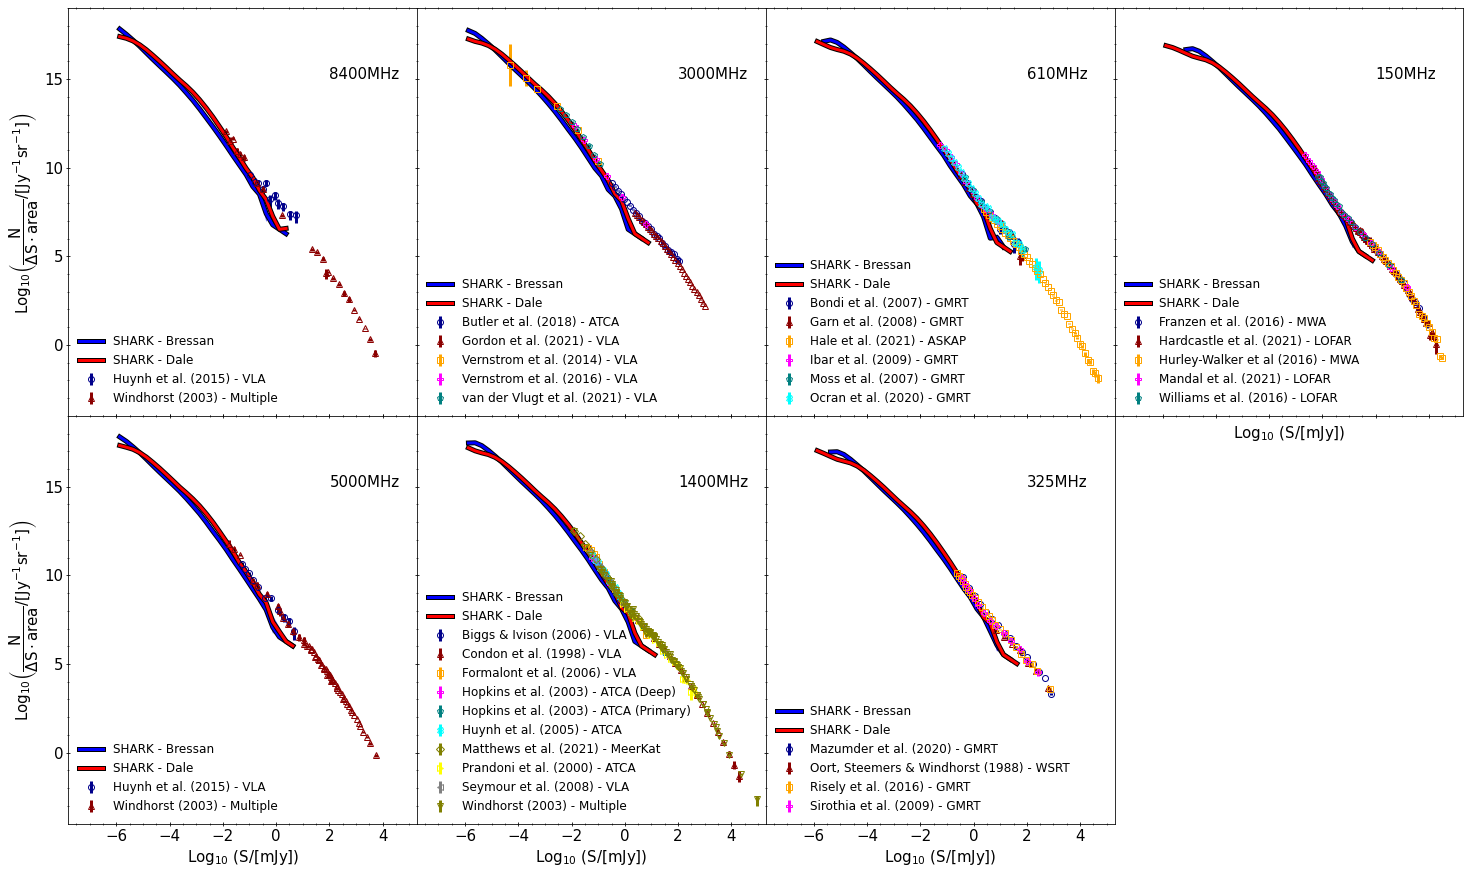

In [40]:
lab_dict = {'LoTSS_DR2':'Hardcastle et al. (2021) - LOFAR','Mandal_LOTSS_2021':'Mandal et al. (2021) - LOFAR', 'Williams_LOFAR_2016':'Williams et al. (2016) - LOFAR', 'Hurley_MWA_2017':'Hurley-Walker et al (2016) - MWA', 'Franzen_MWA_2016':'Franzen et al. (2016) - MWA','Oort_1988':'Oort, Steemers & Windhorst (1988) - WSRT', 'Riseley_GMRT_2016':'Risely et al. (2016) - GMRT', 'Sirothia_GMRT_2009':'Sirothia et al. (2009) - GMRT', 'Mazumder_GMRT_2020':'Mazumder et al. (2020) - GMRT','Moss_GMRT_2009':'Moss et al. (2007) - GMRT', 'Ocran_GMRT_2020':'Ocran et al. (2020) - GMRT', 'Hale_ASKAP_2021':'Hale et al. (2021) - ASKAP', 'Garn_GMRT_2008':'Garn et al. (2008) - GMRT', 'Ibar_GMRT_2009':'Ibar et al. (2009) - GMRT', 'Bondi_GMRT_2006':'Bondi et al. (2007) - GMRT','DEEP2_Matthews_2021':'Matthews et al. (2021) - MeerKat', 'Formalont_2006':'Formalont et al. (2006) - VLA', 'Biggs_2006':'Biggs & Ivison (2006) - VLA', 'Seymour_2008':'Seymour et al. (2008) - VLA', 'NVSS_Condon_1998':'Condon et al. (1998) - VLA', 'Hopkins-Primary':'Hopkins et al. (2003) - ATCA (Primary)', 'Hopkins-Deep':'Hopkins et al. (2003) - ATCA (Deep)', 'Prandoni_2000':'Prandoni et al. (2000) - ATCA', 'Windhorst_2003_14':'Windhorst (2003) - Multiple', 'Huynh_2005':'Huynh et al. (2005) - ATCA','Gordon_VLA_2021':'Gordon et al. (2021) - VLA', '2014_Vernstrom_3GHz':'Vernstrom et al. (2014) - VLA', 'Butler_ATCA_2017':'Butler et al. (2018) - ATCA', 'Van_Der_Vlugt_VLA_2021':'van der Vlugt et al. (2021) - VLA', 'Vernstrom_VLA_2016':'Vernstrom et al. (2016) - VLA','Huynh_ATCA_2015':'Huynh et al. (2015) - VLA', 'Windhorst_2003_8GHz':'Windhorst (2003) - Multiple','Windhorst_2003_5GHz':'Windhorst (2003) - Multiple'}


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
sf_df = pd.read_csv('Documents/Masters/Masters_Thesis/SFR_function2.csv')
sf_df['z'] = round(sf_df['Z'])
sf_df['source_2'] = sf_df['source'] + ' z = ' + sf_df['Z'].astype(str)

zlst = [0,1,2,3,4,5,6,7,8]
fmt_lst = ['o','^','s','P','p','X','D','>','<','v']
col_lst = ['darkblue','darkred','orange','magenta','teal','cyan','olive','yellow','grey','olive']
source_lst = np.sort(np.unique(sf_df['source'])) #source list
source_lst2 = np.sort(np.unique(sf_df['source_2'])) #source list
q = 0

lc_df = pd.read_csv('Lightcone/lightcone_data.csv')
freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz


xmf = lc_df['xmf']

    
    
freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz
freq_lst2 = [8400,5000,3000,1400,610,325,150]
dfn = pd.read_csv('v2_master_file_+vernstrom.csv')
dfn = dfn.replace(to_replace='Average_U/C', value='LoTSS_DR2', regex=True)

label = dfn['dataset']
for key in lab_dict:
    dfn = dfn.replace(to_replace=key, value=lab_dict[key], regex=True)

k = 0
fig, ax = plt.subplots(2,4)
for i in range(len(freq_labels)):
        
    h = k//2
    g = k%2
    nu = freq_labels[i]
    xlab = 's/mJy ' + str(nu)
    freq = nu
    bres_med_lab = freq+'_med_bres'
    bres_upp_lab = freq+'_upp_bres'
    bres_low_lab = freq+'_low_bres'    
    
    dale_med_lab = freq+'_med_dale'
    dale_upp_lab = freq+'_upp_dale'
    dale_low_lab = freq+'_low_dale' 
    
    xmf = lc_df['xmf']
    bres_med = lc_df[bres_med_lab]
    bres_upp = lc_df[bres_upp_lab]
    bres_low = lc_df[bres_low_lab]    
    
    dale_med = lc_df[dale_med_lab]
    dale_upp = lc_df[dale_upp_lab]
    dale_low = lc_df[dale_low_lab]  
    ax[g,h].plot(xmf,bres_med,color = 'blue',label = 'SHARK - Bressan',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(xmf,bres_low,bres_upp,color = 'blue',alpha = 0.5)    

    ax[g,h].plot(xmf,dale_med,color = 'red',label = 'SHARK - Dale',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[g,h].fill_between(xmf,dale_low,dale_upp,color = 'blue',alpha = 0.5)     

        
    freq = freq_lst2[i]
        
        
    dfn2 = dfn[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)','dataset']] [((dfn['frequency(MHz)'] == str(freq))&(dfn['Good_Point']==0))] 
    lablst = np.sort(np.unique(dfn2['dataset']))
    q = 0
    for label in lablst:
        fmt = fmt_lst[q]
        col = col_lst[q]
        dfn3 = dfn2[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)']] [(dfn2['dataset'] == label)] 
        N = dfn3['log(N)']
        S = np.log10(dfn3['S(mJy)'])

        N_err_upp = dfn3['up_lim_log(N)'] - N
        N_err_low = N - dfn3['low_lim_log(N)']
        N_err = (N_err_low,N_err_upp)

        ax[g,h].errorbar(S, N, yerr=N_err, fmt=fmt,markerfacecolor='none', markeredgecolor=col,label = label,elinewidth=3,ecolor = col)
        q+= 1

        
    tit = str(freq) + 'MHz'
        
       # plt.yscale("log")
        #plt.xscale("log")
    ax[g,h].text(2,15,tit,fontsize = 15)
    ax[g,h].set_xlim(-7.8,5.3)
    ax[g,h].set_ylim(-4,19)
    ax[g,h].set_xlabel('$\\rm Log_{10}$ (S/[mJy])',size = 15)
    ax[g,0].set_ylabel(r'$\rm Log_{10}\left(\dfrac{N}{\Delta S \cdot area}/[Jy^{-1} sr^{-1}] \right)$ ',size = 15)
    ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
    ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
    ax[0,h].tick_params(labelbottom=False, top = True,labelsize=15) 
    ax[0,h].tick_params(top = False)
    ax[g,h].tick_params(labelleft=False)
    ax[g,0].tick_params(labelleft=True)
    ax[g,h].minorticks_on()
    leg = ax[g,h].legend(loc='lower left',frameon = False,fontsize = 12)
    leg.get_frame().set_linewidth(0.0)
    k +=1

        
for axs in ax.flat:
        ## check if something was plotted 
    if not bool(axs.has_data()):
        fig.delaxes(axs) ## delete if nothing is plotted in the axes obj    
        
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(25,15)
plt.margins(x=0,y = 0)
plt.savefig('Plots/final/lightcone_land.pdf',bbox_inches='tight')
plt.show()

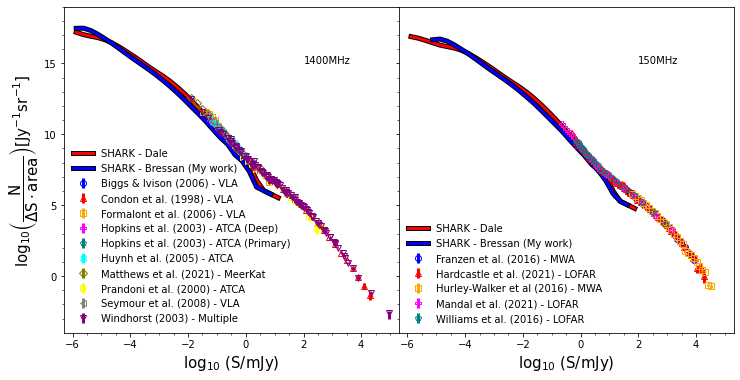

In [59]:
lab_dict = {'LoTSS_DR2':'Hardcastle et al. (2021) - LOFAR','Mandal_LOTSS_2021':'Mandal et al. (2021) - LOFAR', 'Williams_LOFAR_2016':'Williams et al. (2016) - LOFAR', 'Hurley_MWA_2017':'Hurley-Walker et al (2016) - MWA', 'Franzen_MWA_2016':'Franzen et al. (2016) - MWA','Oort_1988':'Oort, Steemers & Windhorst (1988) - WSRT', 'Riseley_GMRT_2016':'Risely et al. (2016) - GMRT', 'Sirothia_GMRT_2009':'Sirothia et al. (2009) - GMRT', 'Mazumder_GMRT_2020':'Mazumder et al. (2020) - GMRT','Moss_GMRT_2009':'Moss et al. (2007) - GMRT', 'Ocran_GMRT_2020':'Ocran et al. (2020) - GMRT', 'Hale_ASKAP_2021':'Hale et al. (2021) - ASKAP', 'Garn_GMRT_2008':'Garn et al. (2008) - GMRT', 'Ibar_GMRT_2009':'Ibar et al. (2009) - GMRT', 'Bondi_GMRT_2006':'Bondi et al. (2007) - GMRT','DEEP2_Matthews_2021':'Matthews et al. (2021) - MeerKat', 'Formalont_2006':'Formalont et al. (2006) - VLA', 'Biggs_2006':'Biggs & Ivison (2006) - VLA', 'Seymour_2008':'Seymour et al. (2008) - VLA', 'NVSS_Condon_1998':'Condon et al. (1998) - VLA', 'Hopkins-Primary':'Hopkins et al. (2003) - ATCA (Primary)', 'Hopkins-Deep':'Hopkins et al. (2003) - ATCA (Deep)', 'Prandoni_2000':'Prandoni et al. (2000) - ATCA', 'Windhorst_2003_14':'Windhorst (2003) - Multiple', 'Huynh_2005':'Huynh et al. (2005) - ATCA','Gordon_VLA_2021':'Gordon et al. (2021) - VLA', '2014_Vernstrom_3GHz':'Vernstrom et al. (2014) - VLA', 'Butler_ATCA_2017':'Butler et al. (2018) - ATCA', 'Van_Der_Vlugt_VLA_2021':'van der Vlugt et al. (2021) - VLA', 'Vernstrom_VLA_2016':'Vernstrom et al. (2016) - VLA','Huynh_ATCA_2015':'Huynh et al. (2015) - VLA', 'Windhorst_2003_8GHz':'Windhorst (2003) - Multiple','Windhorst_2003_5GHz':'Windhorst (2003) - Multiple'}


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
sf_df = pd.read_csv('Documents/Masters/Masters_Thesis/SFR_function2.csv')
sf_df['z'] = round(sf_df['Z'])
sf_df['source_2'] = sf_df['source'] + ' z = ' + sf_df['Z'].astype(str)

zlst = [0,1,2,3,4,5,6,7,8]
fmt_lst = ['o','^','s','P','p','X','D','>','<','v']
col_lst = ['blue','red','orange','magenta','teal','cyan','olive','yellow','grey','purple']
source_lst = np.sort(np.unique(sf_df['source'])) #source list
source_lst2 = np.sort(np.unique(sf_df['source_2'])) #source list
q = 0

lc_df = pd.read_csv('Lightcone/lightcone_data.csv')
freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz


xmf = lc_df['xmf']

    
    
freq_labels = ('flux_1p4GHz','flux_150MHz') #GHz
freq_lst2 = [1400,150]
dfn = pd.read_csv('v2_master_file_+vernstrom.csv')
dfn = dfn.replace(to_replace='Average_U/C', value='LoTSS_DR2', regex=True)

label = dfn['dataset']
for key in lab_dict:
    dfn = dfn.replace(to_replace=key, value=lab_dict[key], regex=True)

k = 0
fig, ax = plt.subplots(1,2)
for i in range(len(freq_labels)):
        
    g = k//2
    h = k%2
    nu = freq_labels[i]
    xlab = 's/mJy ' + str(nu)
    freq = nu
    bres_med_lab = freq+'_med_bres'
    bres_upp_lab = freq+'_upp_bres'
    bres_low_lab = freq+'_low_bres'    
    
    dale_med_lab = freq+'_med_dale'
    dale_upp_lab = freq+'_upp_dale'
    dale_low_lab = freq+'_low_dale' 
    
    xmf = lc_df['xmf']
    bres_med = lc_df[bres_med_lab]
    bres_upp = lc_df[bres_upp_lab]
    bres_low = lc_df[bres_low_lab]    
    
    dale_med = lc_df[dale_med_lab]
    dale_upp = lc_df[dale_upp_lab]
    dale_low = lc_df[dale_low_lab]  
 #   ax[k].plot(xmf,bres_med,color = 'blue',label = 'SHARK - Bressan (My work)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
 #   ax[k].fill_between(xmf,bres_low,bres_upp,color = 'blue',alpha = 0.5)    

    ax[k].plot(xmf,dale_med,color = 'red',label = 'SHARK - Dale',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[k].fill_between(xmf,dale_low,dale_upp,color = 'blue',alpha = 0.5)     
    ax[k].plot(xmf,bres_med,color = 'blue',label = 'SHARK - Bressan (My work)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax[k].fill_between(xmf,bres_low,bres_upp,color = 'blue',alpha = 0.5)    

        
    freq = freq_lst2[i]
        
        
    dfn2 = dfn[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)','dataset']] [((dfn['frequency(MHz)'] == str(freq))&(dfn['Good_Point']==0))] 
    lablst = np.sort(np.unique(dfn2['dataset']))
    q = 0
    for label in lablst:
        fmt = fmt_lst[q]
        col = col_lst[q]
        dfn3 = dfn2[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)']] [(dfn2['dataset'] == label)] 
        N = dfn3['log(N)']
        S = np.log10(dfn3['S(mJy)'])

        N_err_upp = dfn3['up_lim_log(N)'] - N
        N_err_low = N - dfn3['low_lim_log(N)']
        N_err = (N_err_low,N_err_upp)

        ax[k].errorbar(S, N, yerr=N_err, fmt=fmt,markerfacecolor='none', markeredgecolor=col,label = label,elinewidth=3,ecolor = col)
        q+= 1

        
    tit = str(freq) + 'MHz'
        
       # plt.yscale("log")
        #plt.xscale("log")
    ax[k].text(2,15,tit)
    ax[k].set_xlim(-6.3,5.3)
    ax[k].set_ylim(-4,19)
    ax[k].set_xlabel(r'$\rm log_{10}$ (S/mJy)',size = 15)
    ax[0].set_ylabel(r'$\rm log_{10}\left(\dfrac{N}{\Delta S \cdot area}\right) [Jy^{-1} sr^{-1}]$ ',size = 15)
    #ax[k].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
    #ax[k].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
    #ax[0].tick_params(labelbottom=False, top = True,labelsize=15) 
    #ax[0].tick_params(top = False)
    ax[1].tick_params(labelleft=False)
    ax[k].minorticks_on()
    leg = ax[k].legend(loc='lower left',frameon = False)
    leg.get_frame().set_linewidth(0.0)
    k +=1

        
for axs in ax.flat:
        ## check if something was plotted 
    if not bool(axs.has_data()):
        fig.delaxes(axs) ## delete if nothing is plotted in the axes obj    
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(12,6)
plt.savefig('Plots/final/lightcone_2.pdf')
plt.show()


In [ ]:
zlst1 = np.linspace(0,2)
zlst2 = np.linspace(2,8)
zlst2

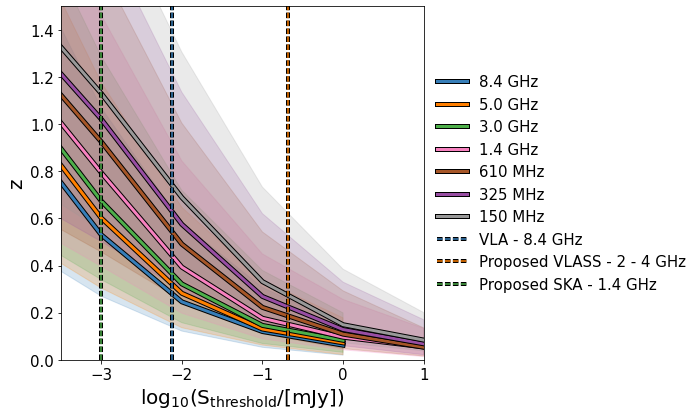

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
plt.rcParams.update({'font.size': 15})
df = pd.read_csv('Complete_csv/lightcone_med_z.csv')

freq_labels = ['flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz'] #GHz
colours = ['#377eb8', '#ff7f00', '#4daf4a','#f781bf', '#a65628', '#984ea3','#999999']
fig, ax = plt.subplots(1,1)
s_lst = df['s_lst']
lab_lst = ['8.4 GHz','5.0 GHz','3.0 GHz', '1.4 GHz', '610 MHz', '325 MHz', '150 MHz']
q = 0

#req_labels.reverse()
#olours.reverse()

for freq in freq_labels:
    
    med = 'z_med_' + freq
    upp = 'z_upp_' + freq
    low = 'z_low_' + freq
    
    z_med = df[med]
    z_low = df[low]
    z_upp = df[upp]
    
    colour = colours[q]
    lab = lab_lst[q]

    ax.plot(s_lst,z_med,color = colour,linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],label = lab)
    ax.fill_between(s_lst,z_low,z_upp,alpha = 0.2,color = colour)
    
    ax.set_xlim(-3.5,1)
    ax.set_ylim(0,1.5)

    q += 1
ax.axvline(x = np.log10(7.5e-3), linestyle = 'dashed', label = 'VLA - 8.4 GHz',color = '#377eb8',path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
ax.axvline(x = np.log10(0.21), linestyle = 'dashed', label = 'Proposed VLASS - 2 - 4 GHz',color = '#ff7f00',path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])    
ax.axvline(x = -3, linestyle = 'dashed', label = 'Proposed SKA - 1.4 GHz',color = '#4daf4a',path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])

#ax.axvline(x = np.log10(0.21), linestyle = 'dashed', label = 'Proposed VLASS - 2 - 4 GHz',color = '#ff7f00',path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])
#ax.axvline(x = np.log10(0.2), linestyle = 'dashed', label = 'ASKAP EMU - 887.5 MHz',color = '#a65628',path_effects=[pe.Stroke(linewidth=4, foreground='black'), pe.Normal()])

leg = ax.legend(frameon = False,loc='center left', bbox_to_anchor=(1, 0.5),fontsize = 15)
leg.get_frame().set_linewidth(0.0)
    
ax.set_xlabel('$\\rm log_{10} (S_{threshold}/[mJy])$',size = 20)
ax.set_ylabel('z',size = 20)
fig.set_size_inches(6.5,6.5)    
plt.savefig('Plots/final/lightcone_med_z.pdf', bbox_extra_artists=(leg,), bbox_inches='tight')


In [72]:
nu = 0.15

nu_self = 0.200 #200 Mhz
alpha = 0.8

tau = (nu/nu_self)**((-alpha - 5)/2)

print(np.e**(-tau))
print((1 - np.e**(-tau))/tau)

0.09994346564447944
0.39079360930894247


In [159]:
git clone https://github.com/pratiman-91/colormaps.git
cd colormaps
python setup.py install

SyntaxError: invalid syntax (3168463460.py, line 1)

In [161]:
import cmocean
cmocean.plots.plot_lightness()

AttributeError: module 'cmocean' has no attribute 'plots'

In [162]:
pip install cmocean

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


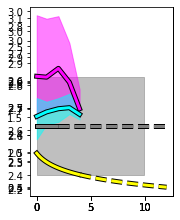

In [172]:
     #  fig = plt.figure(figsize=(11,3.7))
     #  xleg = xmin + 0.1 * (xmax - xmin)
     #  yleg = ymax - 0.35 * (ymax - ymin)
     #  xleg2 = xmin + 0.15 * (xmax - xmin)
     #  yleg2 = ymax + 0.05 * (ymax - ymin)
   
      # meds_errors = np.zeros(shape = (4, 3, len(xv2)))
      # for i,subplot in enumerate(subplots):
     #      ax = fig.add_subplot(subplot
     #      ax.text(xleg2, yleg2, '%s<$\\rm log_{10}(M_{\\star}/M_{\\odot})$<%s' % (str(mstar_bins[i]), str(mstar_bins[i+1])))
     #      inp = np.where((mstar > mstar_bins[i]) & (mstar <= mstar_bins[i+1]))
     #      x = beta[inp]
     #      y = irx[inp]
      #     meds = us.wmedians(x=x, y=y, xbins=xv2)
      #     meds_errors[i] = meds
      #     im = ax.hexbin(x, y, prop[inp], xscale='linear', yscale='linear', gridsize=(binsx,binsy), vmin=vmin, vmax=vmax, cmap='rainbow', mincnt=10, reduce_C_function=np.median)
    #       pos = np.where(meds[0,:] != 0)
    #       y = meds[0,pos]
    #       yerrdn = meds[1,pos]
    #       yerrup = meds[2,pos]
    #       ax.errorbar(xv2[pos],y[0], yerr=[yerrdn[0],yerrup[0]], mfc='None', ecolor = 'DarkGray', mec='DarkGray', color='DarkGray', marker='o',linestyle='solid')
    #       plot_obs(ax)
    #       if i == 0:
    #           common.prepare_legend(ax, 'k', loc=2)
           #else:
           #    plt.yticks([-1.0,-0.5,0.0,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0],[" ", " "," "," "," "," "," "," "," "," "," "])
   
  #         if i == 3:
  #            cbar_ax = fig.add_axes([0.91, 0.17, 0.025, 0.7])
  #            cbar = fig.colorbar(im, cax=cbar_ax)
  #            cbar.ax.set_ylabel(label)
   
  #     plt.subplots_adjust(left=0.07, bottom=0.17)
  #     common.savefig(outdir, fig, 'irx_beta_stellar_mass_%s_%s_%s.pdf' % (name, str(z), dust_model))

qm_df = pd.read_csv('Complete_csv/qir_z_mstar_lines.csv')        
zlist = np.array([0, 0.909822023685613, 2.00391410007239, 3.0191633709527, 3.95972701662501, 5.96592270612165, 7.05756323172746, 8.0235605165086, 8.94312532315157, 9.95650268434316])
mlst = [1e8,1e9,1e10,1e11,1e12]
zlst1 = np.linspace(0,1.9)
zlst2 = np.linspace(2,12)
colours = ['yellow','magenta','cyan','grey','yellow','grey','white']
mao_med = np.zeros(len(zlst1))
mao_upp = np.zeros(len(zlist))
mao_low = np.zeros(len(zlist))
mao_med.fill(2.62)
mao_upp.fill(2.84)
mao_low.fill(2.40)

delhaize_med = 2.88*(1+zlist)**(-0.19)
delhaize_low = (2.88 - 0.03)*(1+zlist)**(-0.19+0.01)
delhaize_upp = (2.88 + 0.03)*(1+zlist)**(-0.19-0.01)
zlst3 = np.linspace(0,3.9)
zlst4 = np.linspace(4,12)
fig = plt.figure(figsize=(11,3.7))
q = 0
subplots = [141, 142, 143, 144]

for m in range(len(mlst)-1):
    subplot = subplots[q]
    ax = fig.add_subplot(subplot)
    m1 = mlst[m]
    m2 = mlst[m+1]
    
    g = q//2
    h = q%2
    
    
    qir_all_med_lab = 'qir_all_med_m1_' + str(m1)
    qir_all_low_lab = 'qir_all_low_m1_' + str(m1)
    qir_all_upp_lab = 'qir_all_upp_m1_' + str(m1) 

    qir_sfg_med_lab = 'qir_sfg_med_z_' + str(m1) 
    qir_sfg_low_lab = 'qir_sfg_low_z_' + str(m1) 
    qir_sfg_upp_lab = 'qir_sfg_upp_z_' + str(m1)

    qir_all_med = qm_df[qir_all_med_lab]
    qir_all_low = qm_df[qir_all_low_lab]
    qir_all_upp = qm_df[qir_all_upp_lab]

    qir_sfg_med = qm_df[qir_sfg_med_lab]
    qir_sfg_low = qm_df[qir_sfg_low_lab]
    qir_sfg_upp = qm_df[qir_sfg_upp_lab]
    
    label = str(np.log10(m1)) + " $\leq$ $Log_{10}$(M/$M_\odot$) $\leq$ " + str(np.log10(m2))
    
    delv_med,delv_low,delv_upp = delvecchio(m1,zlist)
    delv_med1,delv_low1,delv_upp1 = delvecchio(m1,zlst3)
    delv_med2,delv_low2,delv_upp2 = delvecchio(m1,zlst4)
    
    
    delv_lab = 'Delvecchio et al. (2021), $Log_{10}$(M/$M_\odot$) = ' + str(np.log10(m1))
    ax.plot(zlst1,mao_med,color = 'grey',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()],label = 'Mao et al. (2011)')
    ax.plot(zlst2,mao_med,color = 'grey',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])    
    ax.fill_between(zlist,mao_low,mao_upp,color = 'grey',alpha = 0.5)        

    ax.plot(zlist,qir_all_med,color = 'magenta',linewidth = 3,label = 'All Galaxies',path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        
    ax.fill_between(zlist,qir_all_low,qir_all_upp,color = 'magenta',alpha = 0.5)       
    ax.plot(zlist,qir_sfg_med,color = 'cyan',label = 'SFGs',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax.fill_between(zlist,qir_sfg_upp,qir_sfg_low,color = 'cyan',alpha = 0.5)
    ax.plot(zlst3,delv_med1,color = 'yellow',label = 'Delvecchio et al. (2021)',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
    ax.plot(zlst4,delv_med2,color = 'yellow',linestyle = 'dashed',linewidth = 3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        
plt.subplots_adjust(left=0.07, bottom=0.17)        

NameError: name 'fmt_lst' is not defined

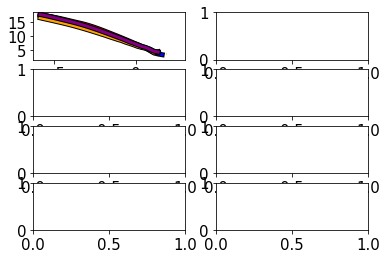

In [7]:
    import functools
    import numpy as np
    from pylab import scatter
    import pylab
    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 15})

    import common
    import utilities_statistics as us
    import pandas as pd
    import matplotlib as mpl
    from collections import OrderedDict
    from matplotlib.pyplot import cm
    import time

    import statistics as stat
    import matplotlib.patheffects as pe


    lab_dict = {'LoTSS_DR2':'Hardcastle et al. (2021) - LOFAR','Mandal_LOTSS_2021':'Mandal et al. (2021) - LOFAR', 'Williams_LOFAR_2016':'Williams et al. (2016) - LOFAR', 'Hurley_MWA_2017':'Hurley-Walker et al (2016) - MWA', 'Franzen_MWA_2016':'Franzen et al. (2016) - MWA','Oort_1988':'Oort, Steemers & Windhorst (1988) - WSRT', 'Riseley_GMRT_2016':'Risely et al. (2016) - GMRT', 'Sirothia_GMRT_2009':'Sirothia et al. (2009) - GMRT', 'Mazumder_GMRT_2020':'Mazumder et al. (2020) - GMRT','Moss_GMRT_2009':'Moss et al. (2007) - GMRT', 'Ocran_GMRT_2020':'Ocran et al. (2020) - GMRT', 'Hale_ASKAP_2021':'Hale et al. (2021) - ASKAP', 'Garn_GMRT_2008':'Garn et al. (2008) - GMRT', 'Ibar_GMRT_2009':'Ibar et al. (2009) - GMRT', 'Bondi_GMRT_2006':'Bondi et al. (2007) - GMRT','DEEP2_Matthews_2021':'Matthews et al. (2021) - MeerKat', 'Formalont_2006':'Formalont et al. (2006) - VLA', 'Biggs_2006':'Biggs & Ivison (2006) - VLA', 'Seymour_2008':'Seymour et al. (2008) - VLA', 'NVSS_Condon_1998':'Condon et al. (1998) - VLA', 'Hopkins-Primary':'Hopkins et al. (2003) - ATCA (Primary)', 'Hopkins-Deep':'Hopkins et al. (2003) - ATCA (Deep)', 'Prandoni_2000':'Prandoni et al. (2000) - ATCA', 'Windhorst_2003_14':'Windhorst (2003) - Multiple', 'Huynh_2005':'Huynh et al. (2005) - ATCA','Gordon_VLA_2021':'Gordon et al. (2021) - VLA', '2014_Vernstrom_3GHz':'Vernstrom et al. (2014) - VLA', 'Butler_ATCA_2017':'Butler et al. (2018) - ATCA', 'Van_Der_Vlugt_VLA_2021':'van der Vlugt et al. (2021) - VLA', 'Vernstrom_VLA_2016':'Vernstrom et al. (2016) - VLA','Huynh_ATCA_2015':'Huynh et al. (2015) - VLA', 'Windhorst_2003_8GHz':'Windhorst (2003) - Multiple','Windhorst_2003_5GHz':'Windhorst (2003) - Multiple'}
    lc_df = pd.read_csv('Complete_csv/lightcone_data_agn.csv')
   # print(lc_df)
    xmf = lc_df['xmf']
    freq_labels = ('flux_8p4GHz', 'flux_5GHz', 'flux_3GHz', 'flux_1p4GHz', 'flux_610MHz', 'flux_325MHz', 'flux_150MHz') #GHz
    freq_lst2 = [8400,5000,3000,1400,610,325,150]
    dfn = pd.read_csv('v2_master_file_+vernstrom.csv')
    dfn = dfn.replace(to_replace='Average_U/C', value='LoTSS_DR2', regex=True)

    label = dfn['dataset']
    for key in lab_dict:
        dfn = dfn.replace(to_replace=key, value=lab_dict[key], regex=True)
    
    
    k = 0
    fig, ax = plt.subplots(4,2)
    for i in range(len(freq_labels)):
        
        g = k//2
        h = k%2
        nu = freq_labels[i]
        result_lst = []
        s12_lst = []
        xlab = 's/mJy ' + str(nu)
        
        med_str = nu + "_med_bres"
        upp_str = nu + "_upp_bres"
        low_str = nu + "_low_bres"

        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[g,h].plot(xmf,number_c_med,color = 'blue',label = 'SHARK - Bressan',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'blue',alpha = 0.5)

        med_str = nu + "_med_dale"
        upp_str = nu + "_upp_dale"
        low_str = nu + "_low_dale"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[g,h].plot(xmf,number_c_med,color = 'red',label = 'SHARK - Dale',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'blue',alpha = 0.5)
 

        med_str = nu + "_med_agn"
        upp_str = nu + "_upp_agn"
        low_str = nu + "_low_agn"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[g,h].plot(xmf,number_c_med,color = 'orange',label = 'SHARK - AGN',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'orange',alpha = 0.5)
        
        
        med_str = nu + "_med_tot"
        upp_str = nu + "_upp_tot"
        low_str = nu + "_low_tot"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[g,h].plot(xmf,number_c_med,color = 'purple',label = 'SHARK - AGN',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'orange',alpha = 0.5)
        
        freq = freq_lst2[i]
        
        
        dfn2 = dfn[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)','dataset']] [((dfn['frequency(MHz)'] == str(freq))&(dfn['Good_Point']==0))] 
        lablst = np.sort(np.unique(dfn2['dataset']))
        q = 0
        for label in lablst:
            fmt = fmt_lst[q]
            col = col_lst[q]
            dfn3 = dfn2[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)']] [(dfn2['dataset'] == label)] 
            N = dfn3['log(N)']
            S = np.log10(dfn3['S(mJy)'])

            N_err_upp = dfn3['up_lim_log(N)'] - N
            N_err_low = N - dfn3['low_lim_log(N)']
            N_err = (N_err_low,N_err_upp)

            ax[g,h].errorbar(S, N, yerr=N_err, fmt=fmt,markerfacecolor=col, markeredgecolor='black',label = label,elinewidth=3,ecolor = 'black')
            q+= 1

        
        tit = str(freq) + 'MHz'
        
       # plt.yscale("log")
        #plt.xscale("log")
        ax[g,h].text(2,15,tit)
        ax[g,h].set_xlim(-6.3,5.3)
        ax[g,h].set_ylim(-4,19)
        ax[g,h].set_xlabel('$Log_{10}$ (S/mJy)',size = 15)
        ax[g,0].set_ylabel(r'$Log_{10}\left(\dfrac{N}{\Delta S \cdot area}\right) [Jy^{-1} sr^{-1}]$ ',size = 15)
        ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
        ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
        ax[0,h].tick_params(labelbottom=False, top = True,labelsize=15) 
        ax[0,h].tick_params(top = False)
        ax[g,1].tick_params(labelleft=False)
        ax[g,h].minorticks_on()
        leg = ax[g,h].legend(loc='lower left',frameon = False,fontsize = 12)
        leg.get_frame().set_linewidth(0.0)
        k +=1

        
    for axs in ax.flat:
        ## check if something was plotted 
        if not bool(axs.has_data()):
            fig.delaxes(axs) ## delete if nothing is plotted in the axes obj    
    
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.set_size_inches(20, 20)
    plt.savefig('Plots/lightcone_plots.pdf')
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encoun

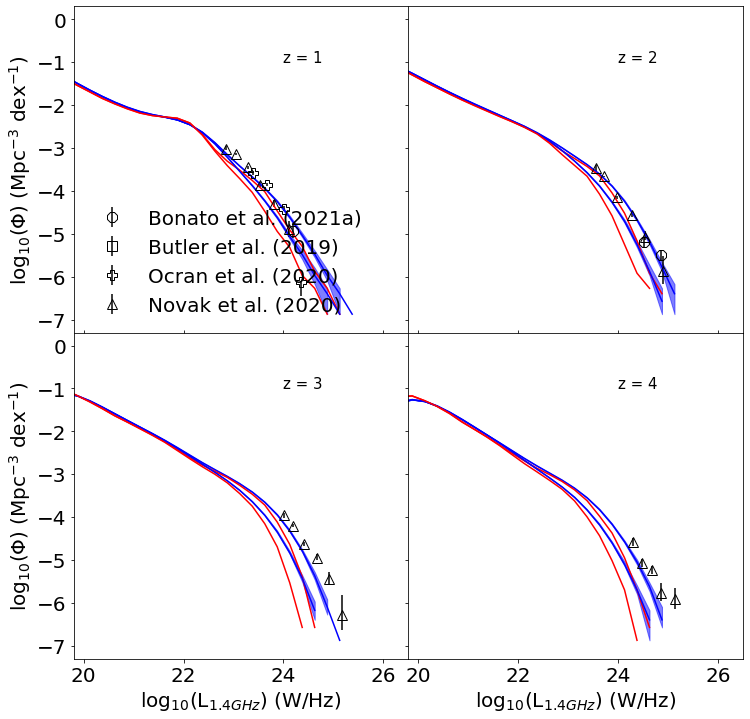

In [476]:
df_1d4 = pd.read_csv('1d4GHz_rad_lum_func_z_data_alpha_ccsn.csv')
#df_tau = pd.read_csv('Complete_csv/150MHz_rad_lum_func_z_data_tau.csv')
#print(df_1d4)
zlist = [0.909822023685613, 2.00391410007239, 3.0191633709527,3.95972701662501]
ccsn_lst = np.array([0.0181985, 0.019239, 0.0201591, 0.0208951, 0.021377, 0.021537, 0.0213202, 0.0206971, 0.0196746, 0.0182997, 0.0166548, 0.0148441, 0.0129763, 0.011148, 0.00943343, 0.0078807, 0.00651369, 0.00533713, 0.00434257, 0.00351372, 0.00283063, 0.00227255, 0.00181968, 0.00145411, 0.0011602, 0.000924641, 0.000736292])
idx_lst = np.array([0., 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1., 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.6])

ccsn_lst = np.array([0.021537, 0.011148])
idx_lst = np.array([0.5, 1.3])


q = 0
from matplotlib import cm   
import matplotlib
fig, ax = plt.subplots(2,2)
LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
import matplotlib.pylab as pl

n = 20
colors = pl.cm.jet(np.linspace(0,1,8))
#colormap possible values = viridis, jet, spectral


LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
for z in zlist:
  #  LOFAR_z = LOFAR_zlst[q]        
    g = q//2
    h = q%2

    #LOFAR_radlum_plt = LOFAR_radlum[['log_l','log_phi_sfg','log_phi_sfg_err']][(LOFAR_radlum['z'] == LOFAR_z)]
   # LOFAR_radlum_plt = LOFAR_radlum_plt.astype(np.float64)
    #log_l = LOFAR_radlum_plt['log_l']
    #log_phi_sfg = LOFAR_radlum_plt['log_phi_sfg']
    #log_phi_sfg_err = LOFAR_radlum_plt['log_phi_sfg_err']
    
    for alpha_ccsn in ccsn_lst:
    
        ind = np.where(ccsn_lst == alpha_ccsn)
        idx = idx_lst[ind]

        upp_lab = 'upp_err'+str(alpha_ccsn)+'z='+str(z)
        low_lab = 'low_err'+str(alpha_ccsn)+'z='+str(z)
        med_lab = 'med_err'+str(alpha_ccsn)+'z='+str(z)
        
        upp_lab_noerr = 'upp_noerr' +str(alpha_ccsn)+'z='+str(z)
        low_lab_noerr = 'low_noerr' +str(alpha_ccsn)+'z='+str(z)
        med_lab_noerr = 'med_noerr' +str(alpha_ccsn)+'z='+str(z)
    
        
        
        
        df_temp = df_1d4[['xmf',upp_lab,low_lab ,med_lab,upp_lab_noerr ,low_lab_noerr ,med_lab_noerr ]]
        colour = colors[ind]


        xmf_lst = df_temp['xmf']
        upp_lst = df_temp[upp_lab]
        low_lst = df_temp[low_lab]
        med_lst = df_temp[med_lab]

        lab = 'idx = -' + str(idx[0])
      #  ax[g,h].plot(xmf_lst,np.log10(med_lst),color = colour,label = lab)

        ax[g,h].plot(xmf_lst,np.log10(med_lst),color='blue')
        ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),alpha = 0.5,color = 'blue')
   #     df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]

        xmf_lst = df_temp['xmf']
        upp_lst = df_temp[upp_lab_noerr]
        # low_lst = df_temp[low_lab]
        med_lst = df_temp[med_lab_noerr]   
    
        ax[g,h].plot(xmf_lst,np.log10(med_lst),color='red')
        
    q += 1

    
df_1d4 = pd.read_csv('Complete_csv/1d4GHz_rad_lum_func_z_data.csv')

zlist = [0.909822023685613, 2.00391410007239, 3.0191633709527,3.95972701662501]

q = 0

for z in zlist:
        
    g = q//2
    h = q%2
    q += 1
    bon_data = 'bonata_data_z' + str(round(z)) + '.csv'
    df2 = pd.read_csv(bon_data)
    try:
        bonatoy = df2.loc[(df2['ref'] == 'Bonato2020'),'log_phi']
        bonatox = df2.loc[(df2['ref'] == 'Bonato2020'),'log_L_1.4']
        bonatoerr_up = df2.loc[(df2['ref'] == 'Bonato2020'),'err_sup_phi']
        bonatoerr_down = df2.loc[(df2['ref'] == 'Bonato2020'),'err_inf_phi']
    except:
        bonatoy = np.NaN
        bonatox = np.NaN
        bonatoerr_up = np.NaN
        bonatoerr_down = np.NaN
        
    try:
        butlery = df2.loc[(df2['ref'] == 'Butler2019'),'log_phi']
        butlerx = df2.loc[(df2['ref'] == 'Butler2019'),'log_L_1.4']
        butlererr_up = df2.loc[(df2['ref'] == 'Butler2019'),'err_sup_phi']
        butlererr_down = df2.loc[(df2['ref'] == 'Butler2019'),'err_inf_phi']
    except:
        butlery = np.NaN
        butlerx = np.NaN
        butlererr_up = np.NaN
        butlererr_down = np.NaN
        
    try:
        ocrany = df2.loc[(df2['ref'] == 'Ocran2020'),'log_phi']
        ocranx = df2.loc[(df2['ref'] == 'Ocran2020'),'log_L_1.4']
        ocranerr_up = df2.loc[(df2['ref'] == 'Ocran2020'),'err_sup_phi']
        ocranerr_down = df2.loc[(df2['ref'] == 'Ocran2020'),'err_inf_phi']
    except:
        ocrany = np.NaN
        ocranx = np.NaN
        ocranerr_up = np.NaN
        ocranerr_down = np.NaN
        
    try:
        novaky = df2.loc[(df2['ref'] == 'Novak2017'),'log_phi']
        novakx = df2.loc[(df2['ref'] == 'Novak2017'),'log_L_1.4']
        novakerr_up = df2.loc[(df2['ref'] == 'Novak2017'),'err_sup_phi']
        novakerr_down = df2.loc[(df2['ref'] == 'Novak2017'),'err_inf_phi']
    except:
        novaky = np.NaN
        novakx = np.NaN
        novakerr_up = np.NaN
        novakerr_down = np.NaN
    
    ax[g,h].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Bonato et al. (2021a)',markersize='10')
    ax[g,h].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Butler et al. (2019)',markersize='10')
    ax[g,h].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Ocran et al. (2020)',markersize='10')
    ax[g,h].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Novak et al. (2020)',markersize='10')
        
    z_label = 'z = '+ str(round(z))
        
    ax[1,h].set_xlabel("log$_{10}$(L$_{1.4GHz}$) (W/Hz)",size=20)
    ax[g,0].set_ylabel("log$_{10}$(Φ) (Mpc$^{-3}$ dex$^{-1}$)",size=20)
    ax[1,h].tick_params(bottom = True, top = True)
    ax[0,h].tick_params(labelbottom=False) 
    ax[g,1].tick_params(labelleft=False) 
    ax[g,h].text(24,-1,z_label,fontsize = 15) 

    ax[g,h].set_xlim(19.8,26.5)
    ax[g,h].set_ylim(-7.3,0.3)
    leg = ax[0,0].legend(frameon=False,loc='lower left')
    leg.get_frame().set_linewidth(0.0)
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(12,12)
plt.savefig("plots/final/rad_lum_func_1d4_z_alpha_ccsn.pdf")

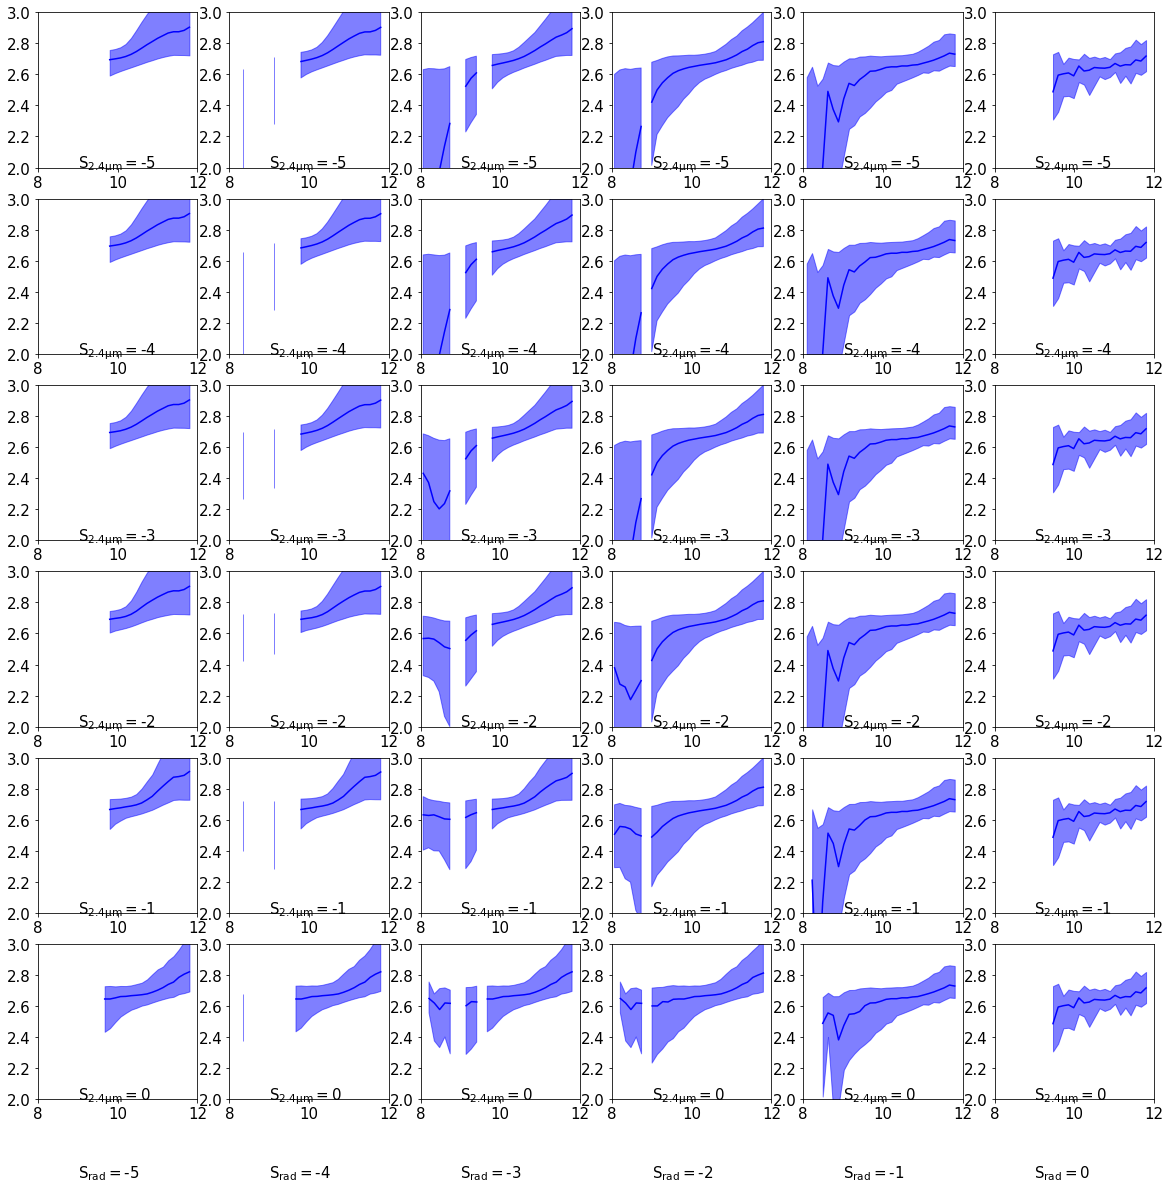

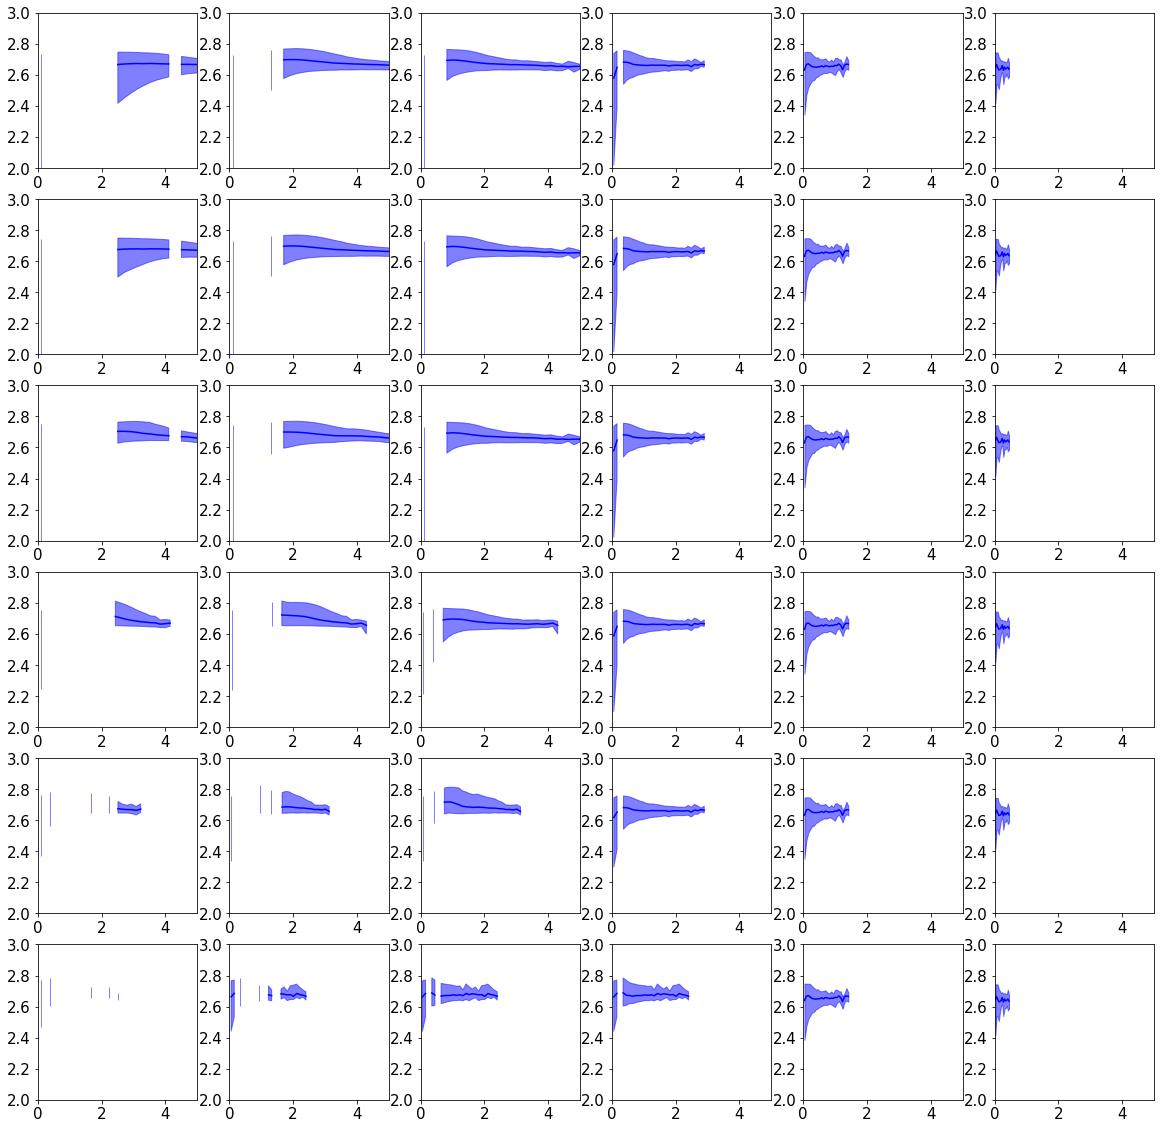

In [264]:
med_err0.0181985z=0.909822023685613
upp_noerr_0.021537z=0.909822023685613
lf_shark = pd.read_csv('Lightcone/lightcone_qir_m_z.csv')
#lf_shark.replace(0, np.nan, inplace=True)
#print(lf_shark)
###Creating qir mstar plots###

s_lst = [-5,-4,-3,-2,-1,0]
test_lst = np.zeros(shape = (30))
    
fig, ax = plt.subplots(6,6)   

g = 0
h = 0

for s in s_lst:
    g = 0
    for q in s_lst:
        
        
        
        
        mid_m_lab = 'mid_m_q_rad_s_' + str(s) +'_lir_s' + str(q)
        low_qir_m_lab = 'low_qir_m_rad_s' + str(s) +'_lir_s' + str(q)
        med_qir_m_lab = 'med_qir_m_rad_s' + str(s) +'_lir_s' + str(q)            
        upp_qir_m_lab = 'upp_qir_m_rad_s' + str(s) +'_lir_s' + str(q)
        
        
        
        mid_m = lf_shark[mid_m_lab]
        low_qir_m = lf_shark[low_qir_m_lab]
        med_qir_m = lf_shark[med_qir_m_lab]
        upp_qir_m = lf_shark[upp_qir_m_lab]
        #print("This is mid_m")
        #print(mid_m)
        #print("THis is med")
        #print(low_qir_m)
        
        sir_lab = '$\\rm S_{2.4 \mu m} =$' + str(q)
        srd_lab = '$\\rm S_{rad} =$' + str(s)
        
        
        ax[g,h].plot(mid_m,med_qir_m,'blue')
        
        ax[g,h].fill_between(mid_m,low_qir_m,upp_qir_m,alpha = 0.5,color = 'blue')
        ax[g,h].set_xlim(8,12)
        ax[g,h].set_ylim(2,3)
        
        ax[g,h].text(9,2,sir_lab)        
        ax[g,h].text(9,1.5,srd_lab)
        g += 1
    h += 1
fig.set_size_inches(20,20)
plt.show()
        
        
        
fig, ax = plt.subplots(6,6)        
g = 0
h = 0
for s in s_lst:
    g = 0
    for q in s_lst:
    
        mid_z_lab = 'mid_z_q_rad_s_' + str(s) +'_lir_s' + str(q)
        low_qir_z_lab = 'low_qir_z_rad_s' + str(s) +'_lir_s' + str(q)
        med_qir_z_lab = 'med_qir_z_rad_s' + str(s) +'_lir_s' + str(q)            
        upp_qir_z_lab = 'upp_qir_z_rad_s' + str(s) +'_lir_s' + str(q)        
        
        mid_z = lf_shark[mid_z_lab]
        low_qir_z = lf_shark[low_qir_z_lab]
        med_qir_z = lf_shark[med_qir_z_lab]
        upp_qir_z = lf_shark[upp_qir_z_lab]   
        
        
        ax[g,h].plot(mid_z,med_qir_z,'blue')
        ax[g,h].fill_between(mid_z,low_qir_z,upp_qir_z,alpha = 0.5,color = 'blue')
        ax[g,h].set_xlim(0,5)
        ax[g,h].set_ylim(2,3)

        
        g += 1
    h += 1
fig.set_size_inches(20,20)
plt.show()
        
            


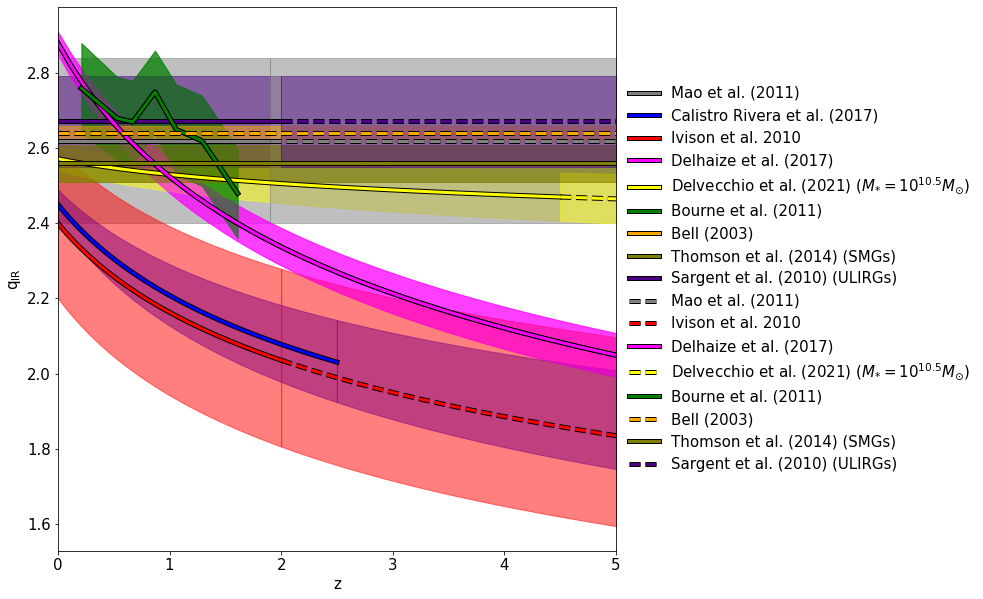

In [556]:
calistro_rivera_z = np.linspace(0,2.5)
calistro_rivera_med = 2.45*(1+calistro_rivera_z)**(-0.15)
calistro_rivera_low = (2.45-0.04)*(1+calistro_rivera_z)**(-0.15-0.03)
calistro_rivera_upp = (2.45+0.04)*(1+calistro_rivera_z)**(-0.15+0.03)

ivison_z = np.linspace(0,2)
ivison_med = 2.4*(1+ivison_z)**(-0.15)
ivison_low = (2.4-0.2)*(1+ivison_z)**(-0.15-0.03)
ivison_upp = (2.4+0.2)*(1+ivison_z)**(-0.15+0.03)

delhaize_z = np.linspace(0,6)
delhaize_med = 2.88*(1+delhaize_z)**(-0.19)
delhaize_low = (2.88-0.03)*(1+delhaize_z)**(-0.19-0.01)
delhaize_upp = (2.88+0.03)*(1+delhaize_z)**(-0.19+0.01)

def delvecchio(M,z):
    qir_med = 2.646*(1+z)**(-0.023) - (0.148)*(np.log10(M) - 10)
    qir_upp = (2.646+0.024) *(1+z)**(-0.023+0.008) - (0.148-0.013)*(np.log10(M) - 10)    
    qir_low = (2.646-0.024) *(1+z)**(-0.023-0.008) - (0.148+0.013)*(np.log10(M) - 10)
    
    return qir_med, qir_upp, qir_low
delv_z = np.linspace(0,4.5)

delv_med,delv_upp,delv_low = delvecchio(10**(10.5),delv_z)

bourne_z = [0.21,0.53,0.67,0.87,1.06,1.29,1.61]
bourne_med = np.array([2.76,2.68,2.67,2.75,2.65,2.62,2.48])
bourne_err = np.array([0.12,0.11,0.11,0.11,0.12,0.12,0.12])
bourne_upp = bourne_med + bourne_err
bourne_low = bourne_med - bourne_err
mao_z = np.linspace(0,1.9)
zlst2 = np.linspace(2,12)

mao_med = np.zeros(len(mao_z))
mao_upp = np.zeros(len(mao_z))
mao_low = np.zeros(len(mao_z))
mao_med.fill(2.62)
mao_upp.fill(2.84)
mao_low.fill(2.40)
bell_z = np.linspace(-1,0)

bell = np.zeros(len(bell_z))
bell_upp = np.zeros(len(bell_z))
bell_low = np.zeros(len(bell_z))
bell.fill(2.64)
bell_upp.fill(2.66)
bell_low.fill(2.62)

thomson_z = np.linspace(0,6.5)
thomson_med = np.zeros(len(bell_z))
thomson_upp = np.zeros(len(bell_z))
thomson_low = np.zeros(len(bell_z))
thomson_med.fill(2.56)
thomson_upp.fill(2.61)
thomson_low.fill(2.51)

plt.rcParams.update({'font.size': 15})
sargent_z = np.linspace(0,2)
sargent_mid = np.full(len(sargent_z),2.672)
sargent_low = np.full(len(sargent_z),2.793)
sargent_upp = np.full(len(sargent_z),2.551)
fig, ax = plt.subplots(1,1) 
ax.plot(mao_z,mao_med,'grey',label = 'Mao et al. (2011)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(mao_z,mao_low,mao_upp,color = 'grey',alpha = 0.5)
ax.plot(calistro_rivera_z,calistro_rivera_med,'blue',label = 'Calistro Rivera et al. (2017)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(calistro_rivera_z,calistro_rivera_low,calistro_rivera_upp,color = 'blue',alpha = 0.5)
ax.plot(ivison_z,ivison_med,'red',label = 'Ivison et al. 2010',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(ivison_z,ivison_low,ivison_upp,color = 'red',alpha = 0.5)
ax.plot(delhaize_z,delhaize_med,'magenta',label = 'Delhaize et al. (2017)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(delhaize_z,delhaize_low,delhaize_upp,color = 'magenta',alpha = 0.5)
ax.plot(delv_z,delv_med,'yellow',label = 'Delvecchio et al. (2021) $(M_{*} = 10^{10.5}M_{\odot})$',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(delv_z,delv_low,delv_upp,color = 'yellow',alpha = 0.5)
ax.plot(bourne_z,bourne_med,'green',label = 'Bourne et al. (2011)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(bourne_z,bourne_low,bourne_upp,color = 'green',alpha = 0.5)
ax.plot(bell_z,bell,color = 'orange',label = 'Bell (2003)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(bell_z,bell_low,bell_upp,color = 'orange',alpha = 0.5)
ax.plot(thomson_z,thomson_med,color = 'olive',label = 'Thomson et al. (2014) (SMGs)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(thomson_z,thomson_low,thomson_upp,color = 'olive',alpha = 0.5)
ax.plot(sargent_z,sargent_mid,'indigo',label = 'Sargent et al. (2010) (ULIRGs)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(sargent_z,sargent_low,sargent_upp,color = 'indigo',alpha = 0.5)

calistro_rivera_z = np.linspace(2.5,5)
calistro_rivera_med = 2.45*(1+calistro_rivera_z)**(-0.15)
calistro_rivera_low = (2.45-0.04)*(1+calistro_rivera_z)**(-0.15-0.03)
calistro_rivera_upp = (2.45+0.04)*(1+calistro_rivera_z)**(-0.15+0.03)

ivison_z = np.linspace(2,5)
ivison_med = 2.4*(1+ivison_z)**(-0.15)
ivison_low = (2.4-0.2)*(1+ivison_z)**(-0.15-0.03)
ivison_upp = (2.4+0.2)*(1+ivison_z)**(-0.15+0.03)

#delhaize_z = np.linspace(0,6)
#delhaize_med = 2.88*(1+delhaize_z)**(-0.19)
#delhaize_low = (2.88-0.03)*(1+delhaize_z)**(-0.19-0.01)
#delhaize_upp = (2.88+0.03)*(1+delhaize_z)**(-0.19+0.01)

def delvecchio(M,z):
    qir_med = 2.646*(1+z)**(-0.023) - (0.148)*(np.log10(M) - 10)
    qir_upp = (2.646+0.024) *(1+z)**(-0.023+0.008) - (0.148-0.013)*(np.log10(M) - 10)    
    qir_low = (2.646-0.024) *(1+z)**(-0.023-0.008) - (0.148+0.013)*(np.log10(M) - 10)
    
    return qir_med, qir_upp, qir_low
delv_z = np.linspace(4.5,5)

delv_med,delv_upp,delv_low = delvecchio(10**(10.5),delv_z)

#bourne_z = [0.21,0.53,0.67,0.87,1.06,1.29,1.61]
#bourne_med = np.array([2.76,2.68,2.67,2.75,2.65,2.62,2.48])
#bourne_err = np.array([0.12,0.11,0.11,0.11,0.12,0.12,0.12])
#bourne_upp = bourne_med + bourne_err
#bourne_low = bourne_med - bourne_err

mao_z = np.linspace(1.9,5)
zlst2 = np.linspace(2,12)

mao_med = np.zeros(len(mao_z))
mao_upp = np.zeros(len(mao_z))
mao_low = np.zeros(len(mao_z))
mao_med.fill(2.62)
mao_upp.fill(2.84)
mao_low.fill(2.40)
bell_z = np.linspace(0,5)

bell = np.zeros(len(bell_z))
bell_upp = np.zeros(len(bell_z))
bell_low = np.zeros(len(bell_z))
bell.fill(2.64)
bell_upp.fill(2.66)
bell_low.fill(2.62)

#thomson_z = np.linspace(0,6.5)
#thomson_med = np.zeros(len(bell_z))
#thomson_upp = np.zeros(len(bell_z))
#thomson_low = np.zeros(len(bell_z))
#thomson_med.fill(2.56)
#thomson_upp.fill(2.61)
#thomson_low.fill(2.51)

plt.rcParams.update({'font.size': 15})
sargent_z = np.linspace(2,5)
sargent_mid = np.full(len(sargent_z),2.672)
sargent_low = np.full(len(sargent_z),2.793)
sargent_upp = np.full(len(sargent_z),2.551)
#fig, ax = plt.subplots(1,1) 
ax.plot(mao_z,mao_med,'grey',linestyle ='dashed',label = 'Mao et al. (2011)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(mao_z,mao_low,mao_upp,color = 'grey',alpha = 0.5)
#ax.plot(calistro_rivera_z,calistro_rivera_med,linestyle ='dashed','blue',label = 'Calistro Rivera et al. (2017)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(calistro_rivera_z,calistro_rivera_low,calistro_rivera_upp,color = 'blue',alpha = 0.5)
ax.plot(ivison_z,ivison_med,'red',linestyle ='dashed',label = 'Ivison et al. 2010',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(ivison_z,ivison_low,ivison_upp,color = 'red',alpha = 0.5)
ax.plot(delhaize_z,delhaize_med,'magenta',label = 'Delhaize et al. (2017)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(delhaize_z,delhaize_low,delhaize_upp,color = 'magenta',alpha = 0.5)
ax.plot(delv_z,delv_med,'yellow',linestyle ='dashed',label = 'Delvecchio et al. (2021) $(M_{*} = 10^{10.5}M_{\odot})$',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(delv_z,delv_low,delv_upp,color = 'yellow',alpha = 0.5)
ax.plot(bourne_z,bourne_med,'green',label = 'Bourne et al. (2011)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(bourne_z,bourne_low,bourne_upp,color = 'green',alpha = 0.5)
ax.plot(bell_z,bell,color = 'orange',linestyle ='dashed',label = 'Bell (2003)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(bell_z,bell_low,bell_upp,color = 'orange',alpha = 0.5)
ax.plot(thomson_z,thomson_med,color = 'olive',label = 'Thomson et al. (2014) (SMGs)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(thomson_z,thomson_low,thomson_upp,color = 'olive',alpha = 0.5)
ax.plot(sargent_z,sargent_mid,'indigo',linestyle ='dashed',label = 'Sargent et al. (2010) (ULIRGs)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(sargent_z,sargent_low,sargent_upp,color = 'indigo',alpha = 0.5)


ax.set_xlim(0,5)
ax.set_ylabel('$\\rm q_{IR}$')
ax.set_xlabel('z')
fig.set_size_inches(10,10)
leg = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False,fontsize = 15)
leg.get_frame().set_linewidth(0.0)

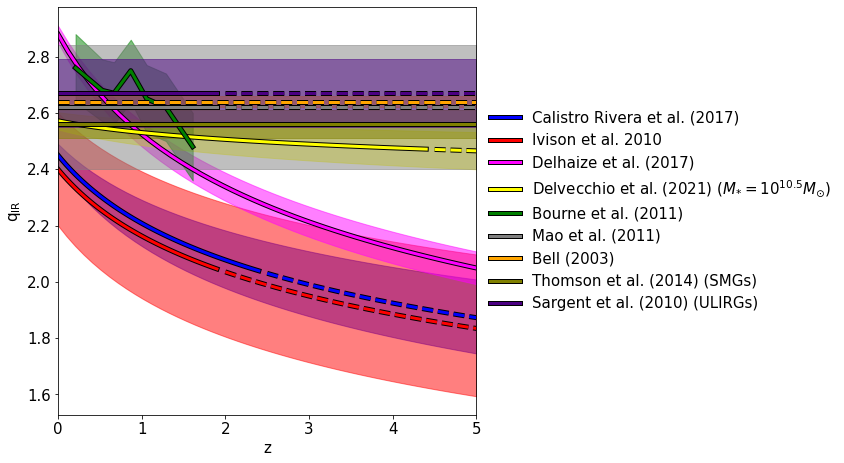

In [581]:
fig, ax = plt.subplots(1,1) 

calistro_rivera_z = np.linspace(0,2.4)
calistro_rivera_med = 2.45*(1+calistro_rivera_z)**(-0.15)
ax.plot(calistro_rivera_z,calistro_rivera_med,'blue',label = 'Calistro Rivera et al. (2017)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
calistro_rivera_z = np.linspace(0,5)
calistro_rivera_low = (2.45-0.04)*(1+calistro_rivera_z)**(-0.15-0.03)
calistro_rivera_upp = (2.45+0.04)*(1+calistro_rivera_z)**(-0.15+0.03)

ax.fill_between(calistro_rivera_z,calistro_rivera_low,calistro_rivera_upp,color = 'blue',alpha = 0.5)
calistro_rivera_z = np.linspace(2.5,5)
calistro_rivera_med = 2.45*(1+calistro_rivera_z)**(-0.15)
ax.plot(calistro_rivera_z,calistro_rivera_med,'blue',linestyle = 'dashed',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])



ivison_z = np.linspace(0,1.9)
ivison_med = 2.4*(1+ivison_z)**(-0.15)
ax.plot(ivison_z,ivison_med,'red',label = 'Ivison et al. 2010',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ivison_z = np.linspace(0,5)
ivison_low = (2.4-0.2)*(1+ivison_z)**(-0.15-0.03)
ivison_upp = (2.4+0.2)*(1+ivison_z)**(-0.15+0.03)
ax.fill_between(ivison_z,ivison_low,ivison_upp,color = 'red',alpha = 0.5)
ivison_z = np.linspace(2,5)
ivison_med = 2.4*(1+ivison_z)**(-0.15)
ax.plot(ivison_z,ivison_med,'red',linestyle = 'dashed',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])


delhaize_z = np.linspace(0,6)
delhaize_med = 2.88*(1+delhaize_z)**(-0.19)
delhaize_low = (2.88-0.03)*(1+delhaize_z)**(-0.19-0.01)
delhaize_upp = (2.88+0.03)*(1+delhaize_z)**(-0.19+0.01)

ax.plot(delhaize_z,delhaize_med,'magenta',label = 'Delhaize et al. (2017)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(delhaize_z,delhaize_low,delhaize_upp,color = 'magenta',alpha = 0.5)



def delvecchio(M,z):
    qir_med = 2.646*(1+z)**(-0.023) - (0.148)*(np.log10(M) - 10)
    qir_upp = (2.646+0.024) *(1+z)**(-0.023+0.008) - (0.148-0.013)*(np.log10(M) - 10)    
    qir_low = (2.646-0.024) *(1+z)**(-0.023-0.008) - (0.148+0.013)*(np.log10(M) - 10)
    
    return qir_med, qir_upp, qir_low
delv_z = np.linspace(0,4.4)

delv_med,delv_upp,delv_low = delvecchio(10**(10.5),delv_z)

ax.plot(delv_z,delv_med,'yellow',label = 'Delvecchio et al. (2021) $(M_{*} = 10^{10.5}M_{\odot})$',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
delv_z = np.linspace(0,5)

delv_med,delv_upp,delv_low = delvecchio(10**(10.5),delv_z)

ax.fill_between(delv_z,delv_low,delv_upp,color = 'yellow',alpha = 0.5)

delv_z = np.linspace(4.5,5)

delv_med,delv_upp,delv_low = delvecchio(10**(10.5),delv_z)

ax.plot(delv_z,delv_med,'yellow',linestyle = 'dashed',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])


bourne_z = [0.21,0.53,0.67,0.87,1.06,1.29,1.61]
bourne_med = np.array([2.76,2.68,2.67,2.75,2.65,2.62,2.48])
bourne_err = np.array([0.12,0.11,0.11,0.11,0.12,0.12,0.12])
bourne_upp = bourne_med + bourne_err
bourne_low = bourne_med - bourne_err

ax.plot(bourne_z,bourne_med,'green',label = 'Bourne et al. (2011)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(bourne_z,bourne_low,bourne_upp,color = 'green',alpha = 0.5)



mao_z = np.linspace(0,1.9)


mao_med = np.zeros(len(mao_z))
mao_upp = np.zeros(len(mao_z))
mao_low = np.zeros(len(mao_z))
mao_med.fill(2.62)
mao_upp.fill(2.84)
mao_low.fill(2.40)

ax.plot(mao_z,mao_med,'grey',label = 'Mao et al. (2011)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])

mao_z = np.linspace(2,5)

mao_med = np.zeros(len(mao_z))
mao_upp = np.zeros(len(mao_z))
mao_low = np.zeros(len(mao_z))
mao_med.fill(2.62)
mao_upp.fill(2.84)
mao_low.fill(2.40)


ax.plot(mao_z,mao_med,'grey',linestyle ='dashed',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
mao_z = np.linspace(0,5)
ax.fill_between(mao_z,mao_low,mao_upp,color = 'grey',alpha = 0.5)

bell_z = np.linspace(-2,-1)

bell = np.zeros(len(bell_z))
bell_upp = np.zeros(len(bell_z))
bell_low = np.zeros(len(bell_z))
bell.fill(2.64)
bell_upp.fill(2.66)
bell_low.fill(2.62)



ax.plot(bell_z,bell,color = 'orange',label = 'Bell (2003)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
bell_z = np.linspace(0,5)
ax.fill_between(bell_z,bell_low,bell_upp,color = 'orange',alpha = 0.5)
bell_z = np.linspace(0,5)
ax.plot(bell_z,bell,color = 'orange',linestyle ='dashed',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])


thomson_z = np.linspace(0,6.5)
thomson_med = np.zeros(len(bell_z))
thomson_upp = np.zeros(len(bell_z))
thomson_low = np.zeros(len(bell_z))
thomson_med.fill(2.56)
thomson_upp.fill(2.61)
thomson_low.fill(2.51)

ax.plot(thomson_z,thomson_med,color = 'olive',label = 'Thomson et al. (2014) (SMGs)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
ax.fill_between(thomson_z,thomson_low,thomson_upp,color = 'olive',alpha = 0.5)


plt.rcParams.update({'font.size': 15})
sargent_z = np.linspace(0,1.9)
sargent_mid = np.full(len(sargent_z),2.672)
sargent_low = np.full(len(sargent_z),2.793)
sargent_upp = np.full(len(sargent_z),2.551)

ax.plot(sargent_z,sargent_mid,'indigo',label = 'Sargent et al. (2010) (ULIRGs)',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
sargent_z = np.linspace(0,5)
ax.fill_between(sargent_z,sargent_low,sargent_upp,color = 'indigo',alpha = 0.5)
sargent_z = np.linspace(2,5)
ax.plot(sargent_z,sargent_mid,'indigo',linestyle = 'dashed',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])

ax.set_xlim(0,5)
ax.set_xlabel('z')
ax.set_ylabel("$\\rm q_{IR}$")
leg = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False,fontsize = 15)
leg.get_frame().set_linewidth(0.0)
#plt.tight_layout()
plt.subplots_adjust(wspace=0.2, hspace=0)
fig.set_size_inches(7.5,7.5)
plt.savefig("plots/final/qir_z_all.pdf", bbox_extra_artists=(leg,), bbox_inches='tight')

No handles with labels found to put in legend.


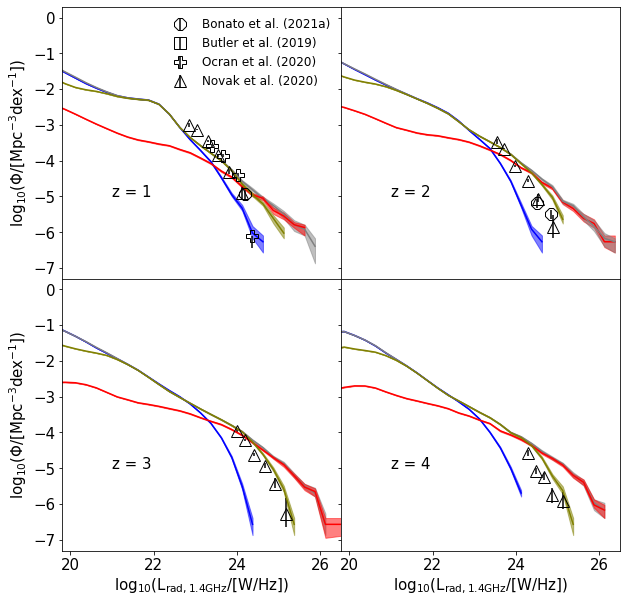

In [57]:
df_1d4 = pd.read_csv('1d4GHz_rad_lum_func_z_data_agn.csv')
#df_tau = pd.read_csv('Complete_csv/150MHz_rad_lum_func_z_data_tau.csv')
#df_ccsn = pd.read_csv('1d4GHz_rad_lum_func_z_data_alpha_ccsn_150.csv')
zlist = [0.909822023685613, 2.00391410007239, 3.0191633709527,3.95972701662501]

q = 0
   
fig, ax = plt.subplots(2,2)
for z in zlist:
        
    g = q//2
    h = q%2

    bon_data = 'bonata_data_z' + str(round(z)) + '.csv'
    df2 = pd.read_csv(bon_data)
    try:
        bonatoy = df2.loc[(df2['ref'] == 'Bonato2020'),'log_phi']
        bonatox = df2.loc[(df2['ref'] == 'Bonato2020'),'log_L_1.4']
        bonatoerr_up = df2.loc[(df2['ref'] == 'Bonato2020'),'err_sup_phi']
        bonatoerr_down = df2.loc[(df2['ref'] == 'Bonato2020'),'err_inf_phi']
    except:
        bonatoy = np.NaN
        bonatox = np.NaN
        bonatoerr_up = np.NaN
        bonatoerr_down = np.NaN
        
    try:
        butlery = df2.loc[(df2['ref'] == 'Butler2019'),'log_phi']
        butlerx = df2.loc[(df2['ref'] == 'Butler2019'),'log_L_1.4']
        butlererr_up = df2.loc[(df2['ref'] == 'Butler2019'),'err_sup_phi']
        butlererr_down = df2.loc[(df2['ref'] == 'Butler2019'),'err_inf_phi']
    except:
        butlery = np.NaN
        butlerx = np.NaN
        butlererr_up = np.NaN
        butlererr_down = np.NaN
        
    try:
        ocrany = df2.loc[(df2['ref'] == 'Ocran2020'),'log_phi']
        ocranx = df2.loc[(df2['ref'] == 'Ocran2020'),'log_L_1.4']
        ocranerr_up = df2.loc[(df2['ref'] == 'Ocran2020'),'err_sup_phi']
        ocranerr_down = df2.loc[(df2['ref'] == 'Ocran2020'),'err_inf_phi']
    except:
        ocrany = np.NaN
        ocranx = np.NaN
        ocranerr_up = np.NaN
        ocranerr_down = np.NaN
        
    try:
        novaky = df2.loc[(df2['ref'] == 'Novak2017'),'log_phi']
        novakx = df2.loc[(df2['ref'] == 'Novak2017'),'log_L_1.4']
        novakerr_up = df2.loc[(df2['ref'] == 'Novak2017'),'err_sup_phi']
        novakerr_down = df2.loc[(df2['ref'] == 'Novak2017'),'err_inf_phi']
    except:
        novaky = np.NaN
        novakx = np.NaN
        novakerr_up = np.NaN
        novakerr_down = np.NaN
    
    upp_lab = 'upp_noerr_' + str(round(z))
    low_lab = 'low_noerr_' + str(round(z))
    med_lab = 'med_noerr_' + str(round(z))
    
    df_temp = df_1d4[['xmf',upp_lab,low_lab,med_lab]] [(df_1d4[upp_lab] > 0)&(df_1d4[low_lab] > 0) ]
    
    
    xmf_lst = df_temp['xmf']
    upp_lst = df_temp[upp_lab]
    low_lst = df_temp[low_lab]
    med_lst = df_temp[med_lab]
        
    upp_err = 'upp_err_' + str(round(z))
    low_err = 'low_err_' + str(round(z))
    med_err = 'med_err_' + str(round(z))

    df_err = df_1d4[['xmf',upp_err,low_err,med_err]] [(df_1d4[upp_err] > 0)&(df_1d4[low_err] > 0) ]
    
    xmf_err = df_err['xmf']
    upp_err = df_err[upp_err]
    low_err = df_err[low_err]
    med_err = df_err[med_err]
    
    
    upp_tot = 'upp_tot_' + str(round(z))
    low_tot = 'low_tot_' + str(round(z))
    med_tot = 'med_tot_' + str(round(z))
    
    df_tot = df_1d4[['xmf',upp_tot,low_tot,med_tot]] [(df_1d4[upp_tot] > 0)&(df_1d4[low_tot] > 0) ]
    
    xmf_tot = df_tot['xmf']
    upp_tot = df_tot[upp_tot]
    low_tot = df_tot[low_tot]
    med_tot = df_tot[med_tot]
    
    upp_agn = 'upp_agn_' + str(round(z))
    low_agn = 'low_agn_' + str(round(z))
    med_agn = 'med_agn_' + str(round(z))
        
    df_agn = df_1d4[['xmf',upp_agn,low_agn,med_agn]] [(df_1d4[upp_agn] > 0)&(df_1d4[low_agn] > 0) ]
    
    xmf_agn = df_agn['xmf']
    upp_agn = df_agn[upp_agn]
    low_agn = df_agn[low_agn]
    med_agn = df_agn[med_agn]
    
    upp_nov = 'upp_nov_' + str(round(z))
    low_nov = 'low_nov_' + str(round(z))
    med_nov = 'med_nov_' + str(round(z))
    
    df_nov = df_1d4[['xmf',upp_nov,low_nov,med_nov]] [(df_1d4[upp_nov] > 0)&(df_1d4[low_nov] > 0) ]
    
    xmf_nov = df_nov['xmf']
    upp_nov = df_nov[upp_nov]
    low_nov = df_nov[low_nov]
    med_nov = df_nov[med_nov]
    
    
    if q == 1:
        ax[g,h].plot(xmf_lst,np.log10(med_lst),'blue',label = 'SHARK SFGs')
        ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
        #ax[q].plot(xmf_err,np.log10(med_err),'darkred',label = 'SHARK + 0.3 dex')
        #ax[q].fill_between(xmf_err,np.log10(low_err),np.log10(upp_err),color = 'darkred',alpha = 0.5)
        ax[g,h].plot(xmf_agn,np.log10(med_agn),'red',label = 'SHARK AGNs')
        ax[g,h].fill_between(xmf_agn,np.log10(low_agn),np.log10(upp_agn),color = 'red',alpha = 0.5)
        ax[g,h].plot(xmf_tot,np.log10(med_tot),'grey',label = 'SHARK AGNs + SFGs')
        ax[g,h].fill_between(xmf_tot,np.log10(low_tot),np.log10(upp_tot),color = 'grey',alpha = 0.5)
        ax[g,h].plot(xmf_nov,np.log10(med_nov),'olive',label = 'SHARK SFGs + AGNs - RLAGNs')
        ax[g,h].fill_between(xmf_nov,np.log10(low_nov),np.log10(upp_nov),color = 'olive',alpha = 0.5)
        
    else:
        ax[g,h].plot(xmf_lst,np.log10(med_lst),'blue')
        ax[g,h].fill_between(xmf_lst,np.log10(low_lst),np.log10(upp_lst),color = 'blue',alpha = 0.5)
        ax[g,h].plot(xmf_tot,np.log10(med_tot),'grey')
        ax[g,h].fill_between(xmf_tot,np.log10(low_tot),np.log10(upp_tot),color = 'grey',alpha = 0.5)
        ax[g,h].plot(xmf_agn,np.log10(med_agn),'red')
        ax[g,h].fill_between(xmf_agn,np.log10(low_agn),np.log10(upp_agn),alpha = 0.5,color = 'red')
        ax[g,h].plot(xmf_nov,np.log10(med_nov),'olive')
        ax[g,h].fill_between(xmf_nov,np.log10(low_nov),np.log10(upp_nov),color = 'olive',alpha = 0.5)
    if q ==0:
        ax[g,h].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Bonato et al. (2021a)',markersize=12)
        ax[g,h].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Butler et al. (2019)',markersize=12)
        ax[g,h].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Ocran et al. (2020)',markersize=12)
        ax[g,h].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',label = 'Novak et al. (2020)',markersize=12)
    else:
        ax[g,h].errorbar(bonatox,bonatoy,yerr = [bonatoerr_down,bonatoerr_up],fmt="8",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[g,h].errorbar(butlerx,butlery,yerr = [butlererr_down, butlererr_up],fmt="s",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[g,h].errorbar(ocranx,ocrany,yerr = [ocranerr_down, ocranerr_up],fmt="P",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
        ax[g,h].errorbar(novakx,novaky,yerr = [novakerr_down,novakerr_up],fmt="^",markerfacecolor='None', markeredgecolor='black',ecolor='black',markersize=12)
      
    z_label = 'z = '+ str(round(z))
        
    ax[g,h].set_xlabel("$\\rm log_{10}(L_{rad,1.4GHz}/[W/Hz])$",size=15)
    ax[g,0].set_ylabel("$\\rm log_{10}(Φ/[Mpc^{-3} dex^{-1}])$",size=15)
 #   ax[1,h].tick_params(bottom = True, top = True)
 #   ax[0,h].tick_params(labelbottom=False) 
    #if q>0:
    ax[g,1].tick_params(labelleft=False)
    ax[g,h].text(21,-5,z_label,fontsize = 15) 

    ax[g,h].set_xlim(19.8,26.5)
    ax[g,h].set_ylim(-7.3,0.3)
   # leg = ax[0].legend(frameon=False,loc='upper right')
   # leg.get_frame().set_linewidth(0.0)
    q += 1

leg = ax[0,0].legend(frameon=False,loc='upper right',fontsize =12)    
    
ccsn_lst = np.array([0.021537, 0.011148])
idx_lst = np.array([0.5, 1.3])


q = 0
from matplotlib import cm   
import matplotlib
LOFAR_radlum = pd.read_csv("LOFAR_150MHz_radlum.csv")
norm = matplotlib.colors.Normalize(vmin=0, vmax=8)
import matplotlib.pylab as pl


q = 0
LOFAR_zlst = ['0.8 - 1.0','1.8 - 2.0','2.8 - 3.2','3.6 - 4.0']
alpha_ccsn = ccsn_lst[0]

leg = ax[1,0].legend(frameon=False,loc='upper right',fontsize = 12)
    
plt.subplots_adjust(wspace=0, hspace=0)
fig.set_size_inches(10,10)
plt.savefig("plots/final/rad_lum_func_agns.pdf", bbox_extra_artists=(leg,), bbox_inches='tight')

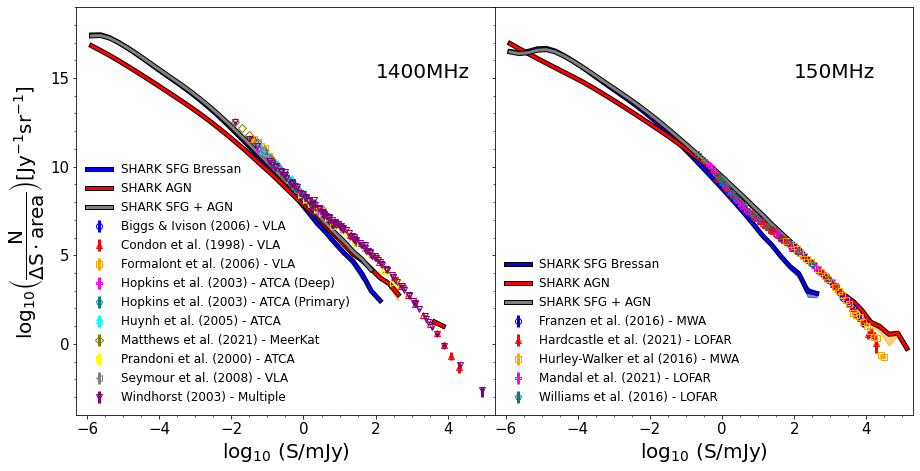

In [70]:
    import functools
    import numpy as np
    from pylab import scatter
    import pylab
    import matplotlib.pyplot as plt
    plt.rcParams.update({'font.size': 15})
    plt.rcParams.update({'font.size': 10})
    import common
    import utilities_statistics as us
    import pandas as pd
    import matplotlib as mpl
    from collections import OrderedDict
    from matplotlib.pyplot import cm
    import time

    import statistics as stat
    import matplotlib.patheffects as pe


    lab_dict = {'LoTSS_DR2':'Hardcastle et al. (2021) - LOFAR','Mandal_LOTSS_2021':'Mandal et al. (2021) - LOFAR', 'Williams_LOFAR_2016':'Williams et al. (2016) - LOFAR', 'Hurley_MWA_2017':'Hurley-Walker et al (2016) - MWA', 'Franzen_MWA_2016':'Franzen et al. (2016) - MWA','Oort_1988':'Oort, Steemers & Windhorst (1988) - WSRT', 'Riseley_GMRT_2016':'Risely et al. (2016) - GMRT', 'Sirothia_GMRT_2009':'Sirothia et al. (2009) - GMRT', 'Mazumder_GMRT_2020':'Mazumder et al. (2020) - GMRT','Moss_GMRT_2009':'Moss et al. (2007) - GMRT', 'Ocran_GMRT_2020':'Ocran et al. (2020) - GMRT', 'Hale_ASKAP_2021':'Hale et al. (2021) - ASKAP', 'Garn_GMRT_2008':'Garn et al. (2008) - GMRT', 'Ibar_GMRT_2009':'Ibar et al. (2009) - GMRT', 'Bondi_GMRT_2006':'Bondi et al. (2007) - GMRT','DEEP2_Matthews_2021':'Matthews et al. (2021) - MeerKat', 'Formalont_2006':'Formalont et al. (2006) - VLA', 'Biggs_2006':'Biggs & Ivison (2006) - VLA', 'Seymour_2008':'Seymour et al. (2008) - VLA', 'NVSS_Condon_1998':'Condon et al. (1998) - VLA', 'Hopkins-Primary':'Hopkins et al. (2003) - ATCA (Primary)', 'Hopkins-Deep':'Hopkins et al. (2003) - ATCA (Deep)', 'Prandoni_2000':'Prandoni et al. (2000) - ATCA', 'Windhorst_2003_14':'Windhorst (2003) - Multiple', 'Huynh_2005':'Huynh et al. (2005) - ATCA','Gordon_VLA_2021':'Gordon et al. (2021) - VLA', '2014_Vernstrom_3GHz':'Vernstrom et al. (2014) - VLA', 'Butler_ATCA_2017':'Butler et al. (2018) - ATCA', 'Van_Der_Vlugt_VLA_2021':'van der Vlugt et al. (2021) - VLA', 'Vernstrom_VLA_2016':'Vernstrom et al. (2016) - VLA','Huynh_ATCA_2015':'Huynh et al. (2015) - VLA', 'Windhorst_2003_8GHz':'Windhorst (2003) - Multiple','Windhorst_2003_5GHz':'Windhorst (2003) - Multiple'}
    lc_df = pd.read_csv('Complete_csv/lightcone_data_agn.csv')
   # print(lc_df)
    xmf = lc_df['xmf']
    freq_labels = ('flux_1p4GHz','flux_150MHz') #GHz
    freq_lst2 = [1400,150]
    dfn = pd.read_csv('v2_master_file_+vernstrom.csv')
    dfn = dfn.replace(to_replace='Average_U/C', value='LoTSS_DR2', regex=True)

    label = dfn['dataset']
    for key in lab_dict:
        dfn = dfn.replace(to_replace=key, value=lab_dict[key], regex=True)
    
    plt.rcParams.update({'font.size': 15})   
    k = 0
    fig, ax = plt.subplots(1,2)
    for i in range(len(freq_labels)):
        
        g = k//2
        h = k%2
        nu = freq_labels[i]
        result_lst = []
        s12_lst = []
        xlab = 's/mJy ' + str(nu)
        
        med_str = nu + "_med_bres"
        upp_str = nu + "_upp_bres"
        low_str = nu + "_low_bres"

        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[k].plot(xmf,number_c_med,color = 'blue',label = 'SHARK SFG Bressan',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[k].fill_between(xmf,number_c_low,number_c_upp,color = 'blue',alpha = 0.5)

        med_str = nu + "_med_dale"
        upp_str = nu + "_upp_dale"
        low_str = nu + "_low_dale"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
       # ax[g,h].plot(xmf,number_c_med,color = 'red',label = 'SHARK - Dale',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
       # ax[g,h].fill_between(xmf,number_c_low,number_c_upp,color = 'blue',alpha = 0.5)
 

        med_str = nu + "_med_agn"
        upp_str = nu + "_upp_agn"
        low_str = nu + "_low_agn"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[k].plot(xmf,number_c_med,color = 'red',label = 'SHARK AGN',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[k].fill_between(xmf,number_c_low,number_c_upp,color = 'orange',alpha = 0.5)
        
        
        med_str = nu + "_med_tot"
        upp_str = nu + "_upp_tot"
        low_str = nu + "_low_tot"
        
        number_c_med = lc_df[med_str]
        number_c_upp = lc_df[upp_str]
        number_c_low = lc_df[low_str]
        
        ax[k].plot(xmf,number_c_med,color = 'grey',label = 'SHARK SFG + AGN',linewidth=3,path_effects=[pe.Stroke(linewidth=5, foreground='black'), pe.Normal()])
        ax[k].fill_between(xmf,number_c_low,number_c_upp,color = 'grey',alpha = 0.5)
        
        freq = freq_lst2[i]
        
        
        dfn2 = dfn[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)','dataset']] [((dfn['frequency(MHz)'] == str(freq))&(dfn['Good_Point']==0))] 
        lablst = np.sort(np.unique(dfn2['dataset']))
        q = 0
        for label in lablst:
            fmt = fmt_lst[q]
            col = col_lst[q]
            dfn3 = dfn2[['log(N)','S(mJy)','up_lim_log(N)' ,'low_lim_log(N)']] [(dfn2['dataset'] == label)] 
            N = dfn3['log(N)']
            S = np.log10(dfn3['S(mJy)'])

            N_err_upp = dfn3['up_lim_log(N)'] - N
            N_err_low = N - dfn3['low_lim_log(N)']
            N_err = (N_err_low,N_err_upp)

            ax[k].errorbar(S, N, yerr=N_err, fmt=fmt,markerfacecolor='none', markeredgecolor=col,label = label,elinewidth=3,ecolor = col)
            q+= 1

        
        tit = str(freq) + 'MHz'
        
       # plt.yscale("log")
        #plt.xscale("log")
        ax[k].text(2,15,tit,fontsize = 20)
        ax[k].set_xlim(-6.3,5.3)
        ax[k].set_ylim(-4,19)
        ax[k].set_xlabel('$\\rm log_{10}$ (S/mJy)',size = 20)
        ax[0].set_ylabel(r'$\rm log_{10}\left(\dfrac{N}{\Delta S \cdot area}\right) [Jy^{-1} sr^{-1}]$ ',size = 20)
       # ax[g,h].tick_params(bottom = True, top = True,direction = 'inout',labelsize=15)
       # ax[g,h].tick_params(which = 'minor',bottom = True, top = True,direction = 'inout')
       # ax[0,h].tick_params(labelbottom=False, top = True,labelsize=15) 
       # ax[0,h].tick_params(top = False)
       # ax[g,1].tick_params(labelleft=False)
        ax[k].minorticks_on()
        leg = ax[k].legend(loc='lower left',frameon = False,fontsize = 12)
        leg.get_frame().set_linewidth(0.0)
        k +=1
    ax[1].tick_params(labelleft=False)
        
    for axs in ax.flat:
        ## check if something was plotted 
        if not bool(axs.has_data()):
            fig.delaxes(axs) ## delete if nothing is plotted in the axes obj    
    
    plt.subplots_adjust(wspace=0, hspace=0)
    fig.set_size_inches(15,7.5)
    plt.savefig('plots/final/lightcone_plots_2_agns.pdf')
    plt.show()